# Á¨¨6ÈÄ±ÔºöÂàÜÊûêPTTÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Áõ∏ÈóúÊñáÁ´†‰πãË©ûÂΩôÈóú‰øÇ



## 1. Â•ó‰ª∂Ë™™Êòé

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import jieba
import jieba.analyse
import math
from nltk import ngrams, FreqDist
from collections import Counter, namedtuple

import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Ë®≠ÂÆöÂúñÁöÑ‰∏≠ÊñáÂ≠óÈ´î (ÁÑ°Ê≥ïÈ°ØÁ§∫ÁöÑË©±ÂèØ‰ª•Ë©¶Ë©¶‚ÄòMicrosoft JhengHei‚ÄôÂ≠óÈ´î)
# ‰πüÂèØÂèÉËÄÉÔºöhttps://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #‰ΩøÂúñ‰∏≠‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus'] = False #‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫

In [3]:
# cloab Â≠óÈ´îË®≠ÂÆö

# !wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# Êñ∞Â¢ûÂ≠óÈ´î
# matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# Â∞á font-family Ë®≠ÁÇ∫ Taipei Sans TC Beta
# Ë®≠ÂÆöÂÆåÂæåÔºå‰πãÂæåÁöÑÂúñË°®ÈÉΩÂèØ‰ª•È°ØÁ§∫‰∏≠Êñá‰∫Ü
# matplotlib.rc('font', family='Taipei Sans TC Beta')

## 2. Ë≥áÊñôÂâçËôïÁêÜ

In [4]:
#ÂåØÂÖ•Ë≥áÊñô
df = pd.read_csv('./raw_data/AOT.csv', encoding = 'UTF-8')
df.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1617925959....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1617926905....   

                artTitle              artDate   artPoster artCatagory  \
0   [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23  WARgame723   Gossiping   
1     [ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 07:52:37     ReiFu21   Gossiping   
2  Re:[ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 08:08:23       RLAPH   Gossiping   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫Ü\n\nÁ∏ΩÂÖ±139Ë©±ÁöÑÂäáÊÉÖ\n\nÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä\n\n\n‰ΩÜÊòØÂ¶ÇÊûúÊãø...   
2  ÂóØÂê∂\n\nÈÄôÊàëÊúâÊÉ≥ÈÅé\n\nÊääÂ∑®‰∫∫ÊãøÊéâ\n\nÁÑ∂ÂæåËÆäÊàê ‰∏ÄÊ®£ÊòØ9ÂÄã‰∫∫ Ë¢´9Á®ÆÁ•ûÁç∏ÈôÑË∫´\n\...   

                                          artComment           e_ip  \
0  [{"cmtStatus": "‚Üí", "cmtPoster": "shadowdio", ...  111.83.27.218   
1  [{"cmtStatus": "Êé®", "cmtPoster": "ilanese", "c...  180.177.69.24   
2  [{"cmtStatus": "‚Üí", "cmtPoster": "ericcyc0194"...     39.9.73.62   

          insertedDate dataSource  
0  2021-04-09 00:46:12        ptt  
1  2021-04-10 00:53:56        ptt  
2  2021-04-10 00:53:56        ptt

### 2.2 Ë≥áÊñôÊ∏ÖÁêÜ  
- ÂéªÈô§ÁâπÊÆäÂ≠óÂÖÉËàáÊ®ôÈªûÁ¨¶ËôüÔºåÂè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
- \u4e00-\u9fff ÁÇ∫Unicode‰∏≠ÊñáÊº¢Â≠óÂ≠óÁ¨¶ÁöÑÁØÑÂúç

In [5]:
MetaData = df.copy()

# ÂéªÈô§‰∏Ä‰∫õ‰∏çÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
MetaData = MetaData.drop(['artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource'], axis=1)
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
MetaData['sentence'] = MetaData['artContent'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))

MetaData.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1617925959....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1617926905....   

                artTitle              artDate  \
0   [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
1     [ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 07:52:37   
2  Re:[ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 08:08:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫Ü\n\nÁ∏ΩÂÖ±139Ë©±ÁöÑÂäáÊÉÖ\n\nÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä\n\n\n‰ΩÜÊòØÂ¶ÇÊûúÊãø...   
2  ÂóØÂê∂\n\nÈÄôÊàëÊúâÊÉ≥ÈÅé\n\nÊääÂ∑®‰∫∫ÊãøÊéâ\n\nÁÑ∂ÂæåËÆäÊàê ‰∏ÄÊ®£ÊòØ9ÂÄã‰∫∫ Ë¢´9Á®ÆÁ•ûÁç∏ÈôÑË∫´\n\...   

                                            sentence  
0      ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶  
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫ÜÁ∏ΩÂÖ±Ë©±ÁöÑÂäáÊÉÖÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä‰ΩÜÊòØÂ¶ÇÊûúÊãøÊéâÂ∑®‰∫∫È´òÁâÜ‰πüÊ≤íÊúâÂ≠òÂú®ÂøÖË¶ÅÁ´ãÈ´îË°åÂãïË£ù...  
2  ÂóØÂê∂ÈÄôÊàëÊúâÊÉ≥ÈÅéÊääÂ∑®‰∫∫ÊãøÊéâÁÑ∂ÂæåËÆäÊàê‰∏ÄÊ®£ÊòØÂÄã‰∫∫Ë¢´Á®ÆÁ•ûÁç∏ÈôÑË∫´Áï∂ÁÑ∂‰∏ªËßíÁÖß‰∏ÄÊ®£Ë®≠ÂÆöÁà∏Â™ΩÊ≠ª‰∫ÜËÆäÂ≠§ÂÖíÊé•Ëëó‰∏ª...

### 2.3 ÊñáÁ´†Êñ∑Ë©ûËàáÊï¥ÁêÜ

In [6]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./dict/dict.txt.big')

# Êñ∞Â¢ûstopwords
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

In [7]:
# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1] # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â∞èÊñº1ÁöÑË©ûÂΩô

    return seg_list

In [8]:
data = MetaData.copy()

# Êñ∑Ë©û„ÄÅÂéªÈô§ÂÅúÁî®Â≠ó‰∏¶Â∞áwordÊ¨Ñ‰ΩçÂ±ïÈñã
data['word'] = data.sentence.apply(getToken).explode('word')

data.head(3)

Building prefix dict from C:\Users\acer\OneDrive\Ê°åÈù¢\Á¢©Â£´Ë≥áÊñô\Á§æÁæ§Â™íÈ´îÂàÜÊûê\week6\dict\dict.txt.big ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.ufaa601e02f9f9d21b4fc09cd2e9fc20d.cache
Loading model cost 1.421 seconds.
Prefix dict has been built successfully.


system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1617925959....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1617926905....   

                artTitle              artDate  \
0   [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
1     [ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 07:52:37   
2  Re:[ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 08:08:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫Ü\n\nÁ∏ΩÂÖ±139Ë©±ÁöÑÂäáÊÉÖ\n\nÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä\n\n\n‰ΩÜÊòØÂ¶ÇÊûúÊãø...   
2  ÂóØÂê∂\n\nÈÄôÊàëÊúâÊÉ≥ÈÅé\n\nÊääÂ∑®‰∫∫ÊãøÊéâ\n\nÁÑ∂ÂæåËÆäÊàê ‰∏ÄÊ®£ÊòØ9ÂÄã‰∫∫ Ë¢´9Á®ÆÁ•ûÁç∏ÈôÑË∫´\n\...   

                                            sentence word  
0      ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶   ÈÄ≤Êìä  
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫ÜÁ∏ΩÂÖ±Ë©±ÁöÑÂäáÊÉÖÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä‰ΩÜÊòØÂ¶ÇÊûúÊãøÊéâÂ∑®‰∫∫È´òÁâÜ‰πüÊ≤íÊúâÂ≠òÂú®ÂøÖË¶ÅÁ´ãÈ´îË°åÂãïË£ù...   Â∑®‰∫∫  
2  ÂóØÂê∂ÈÄôÊàëÊúâÊÉ≥ÈÅéÊääÂ∑®‰∫∫ÊãøÊéâÁÑ∂ÂæåËÆäÊàê‰∏ÄÊ®£ÊòØÂÄã‰∫∫Ë¢´Á®ÆÁ•ûÁç∏ÈôÑË∫´Áï∂ÁÑ∂‰∏ªËßíÁÖß‰∏ÄÊ®£Ë®≠ÂÆöÁà∏Â™ΩÊ≠ª‰∫ÜËÆäÂ≠§ÂÖíÊé•Ëëó‰∏ª...   ÂÆåÁµê

## 3. ÊâæÂá∫ÈáçË¶ÅË©ûÂΩô - ‰ª•TFIDFÁÇ∫‰æã

### 3.2 ÊáâÁî®ÊñºË≥áÊñôÈõÜÔºàÂ•ó‰ª∂Ôºâ

Èô§‰∫ÜÁõ¥Êé•Áî®ÂÖ¨ÂºèË®àÁÆóÔºå‰πüÂèØ‰ª•‰ΩøÁî®sklearn‰∏≠Ë®àÁÆóË©ûÈ†ªËàátf-idfÁöÑÂ•ó‰ª∂„ÄÇ

DTM ‰ªãÁ¥π
- Document term matrix (DTM)ÔºåÊòØ‰∏ÄÁ®ÆÁî®ÊñºËá™ÁÑ∂Ë™ûË®ÄËôïÁêÜÁöÑÊï∏Â≠∏Áü©Èô£ÔºåÊèèËø∞‰∫ÜÂú®‰∏ÄÁµÑÊñá‰ª∂‰∏≠ÂêÑÂÄãË©ûÂΩôÂá∫ÁèæÁöÑÈ†ªÁéá„ÄÇ   
- DTM ‰∏≠ÁöÑÊØè‰∏ÄË°å‰ª£Ë°®‰∏ÄÂÄãÊñá‰ª∂(Document)ÔºåÊØè‰∏ÄÂàó‰ª£Ë°®‰∏ÄÂÄãË©ûÂΩô(Term)ÔºåÊØè‰∏ÄÊ†ºÁöÑÂÄºË°®Á§∫Ë©≤Ë©ûÂΩôÂú®Ë©≤Êñá‰ª∂‰∏≠ÁöÑÂá∫ÁèæÊ¨°Êï∏„ÄÇ

Ëàâ‰æã‰æÜË™™ÔºåËã•Êúâ‰∏âÂÄãÊñá‰ª∂ÂÖ∂ÂÖßÂÆπÂ¶Ç‰∏ãÔºö
- Êñá‰ª∂1Ôºö„Äå‰ªäÂ§©Â§©Ê∞£ÂæàÂ•Ω„Äç
- Êñá‰ª∂2Ôºö„Äå‰ªäÂ§©ÊòØÊòüÊúü‰∫î„Äç
- Êñá‰ª∂3Ôºö„ÄåÊò®Â§©ÊòØÊòüÊúüÂõõËÄå‰∏îÂ§©Ê∞£ÂæàÂ•Ω„Äç

ËÄåÈÄô‰∫õÊñá‰ª∂Êñ∑ÂÆåË©ûÂæåÁöÑÁµêÊûúÂèØËÉΩÁÇ∫Ôºö
- Êñá‰ª∂1Ôºö„Äå‰ªäÂ§©ÔºèÂ§©Ê∞£ÔºèÂæàÔºèÂ•Ω„Äç
- Êñá‰ª∂2Ôºö„Äå‰ªäÂ§©ÔºèÊòØÔºèÊòüÊúü‰∫î„Äç
- Êñá‰ª∂3Ôºö„ÄåÊò®Â§©ÔºèÊòØÔºèÊòüÊúüÂõõÔºèËÄå‰∏îÔºèÂ§©Ê∞£ÔºèÂæàÔºèÂ•Ω„Äç

Â∞áÈÄô‰∏âÂÄãÊñá‰ª∂‰ª•DTMÊ†ºÂºèË°®Á§∫ÂâáÂ¶Ç‰∏ãÂúñÔºö   

<img src="./img/DTM_exsample.png" style="float:left;" width="70%">   

In [9]:
food_df = MetaData.copy()
food_df.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1617925959....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1617926905....   

                artTitle              artDate  \
0   [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
1     [ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 07:52:37   
2  Re:[ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 08:08:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫Ü\n\nÁ∏ΩÂÖ±139Ë©±ÁöÑÂäáÊÉÖ\n\nÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä\n\n\n‰ΩÜÊòØÂ¶ÇÊûúÊãø...   
2  ÂóØÂê∂\n\nÈÄôÊàëÊúâÊÉ≥ÈÅé\n\nÊääÂ∑®‰∫∫ÊãøÊéâ\n\nÁÑ∂ÂæåËÆäÊàê ‰∏ÄÊ®£ÊòØ9ÂÄã‰∫∫ Ë¢´9Á®ÆÁ•ûÁç∏ÈôÑË∫´\n\...   

                                            sentence  
0      ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶  
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫ÜÁ∏ΩÂÖ±Ë©±ÁöÑÂäáÊÉÖÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä‰ΩÜÊòØÂ¶ÇÊûúÊãøÊéâÂ∑®‰∫∫È´òÁâÜ‰πüÊ≤íÊúâÂ≠òÂú®ÂøÖË¶ÅÁ´ãÈ´îË°åÂãïË£ù...  
2  ÂóØÂê∂ÈÄôÊàëÊúâÊÉ≥ÈÅéÊääÂ∑®‰∫∫ÊãøÊéâÁÑ∂ÂæåËÆäÊàê‰∏ÄÊ®£ÊòØÂÄã‰∫∫Ë¢´Á®ÆÁ•ûÁç∏ÈôÑË∫´Áï∂ÁÑ∂‰∏ªËßíÁÖß‰∏ÄÊ®£Ë®≠ÂÆöÁà∏Â™ΩÊ≠ª‰∫ÜËÆäÂ≠§ÂÖíÊé•Ëëó‰∏ª...

In [10]:
# ‰øùÁïôÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
food_df = food_df.loc[:,["system_id", "sentence"]]

# ÊîπÊàê‰ΩøÁî®Á©∫Ê†ºÈÄ£Êé•Êñ∑ÂÆåÁöÑË©û
food_df['word'] = food_df.sentence.apply(getToken).map(' '.join)

food_df.head()

system_id                                           sentence  \
0          1      ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶   
1          2  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫ÜÁ∏ΩÂÖ±Ë©±ÁöÑÂäáÊÉÖÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä‰ΩÜÊòØÂ¶ÇÊûúÊãøÊéâÂ∑®‰∫∫È´òÁâÜ‰πüÊ≤íÊúâÂ≠òÂú®ÂøÖË¶ÅÁ´ãÈ´îË°åÂãïË£ù...   
2          3  ÂóØÂê∂ÈÄôÊàëÊúâÊÉ≥ÈÅéÊääÂ∑®‰∫∫ÊãøÊéâÁÑ∂ÂæåËÆäÊàê‰∏ÄÊ®£ÊòØÂÄã‰∫∫Ë¢´Á®ÆÁ•ûÁç∏ÈôÑË∫´Áï∂ÁÑ∂‰∏ªËßíÁÖß‰∏ÄÊ®£Ë®≠ÂÆöÁà∏Â™ΩÊ≠ª‰∫ÜËÆäÂ≠§ÂÖíÊé•Ëëó‰∏ª...   
3          4  ÊàëËÇ•ÂÆÖÂï¶ÊúÄÊñ∞‰∏ÄÈõÜÂ∑®‰∫∫Â∑≤Á∂ìÂèØ‰ª•Âú®Êù±Á´ãÁ∑ö‰∏äÁúã‰∫ÜÊú¨‰æÜÈÇÑË¶∫ÂæóÊ≤í‰ªÄÈ∫ºÁµêÊûúÂæûÁúã‰∏ÄÈÅçÁë™Èõ∑ÁØáÂìáÈù†ÂÆåÂÖ®ÂèàÊòØ‰∏çÂêå...   
4          5  ÂÖ©‰∫∫ÈÉΩÁïôËëó‰∏ÄÈ†≠‰øèÈ∫óÁü≠È´ÆÂÄãÊÄßÁç®Á´ãÂ†ÖÂº∑ËÉΩÂäõË∂ÖÂº∑‰∏ÄÂÄãÊòØÊúüÊâõÂ£©Â≠ê‰∏ÄÂÄãÊòØÂè∞ÁÅ£ÊúÄÊ≠£ÈõñÁÑ∂ËééËééË∫´ÊùêÂ±åÊâìÁ±≥Âç°Ëéé...   

                                                word  
0        ÈÄ≤Êìä Â∑®‰∫∫ ÂÆåÁµê Â£ìÂÄíÊÄß Â•ΩË©ï ÁÜ±Â∫¶ ÊåÅÁ∫å Á•û‰Ωú Â∑®‰∫∫ Âæå‰æÜËÄÖ ‰πãÂßø ÊåëÊà∞ Âú∞‰Ωç Â∑®‰∫∫  
1  ÈÄ≤Êìä Â∑®‰∫∫ ÁµÇÊñº ÂÆåÁµê Á∏ΩÂÖ± ÂäáÊÉÖ ÂúçÁπû Â∑®‰∫∫ Ë∫´‰∏ä ÊãøÊéâ Â∑®‰∫∫ È´òÁâÜ Á´ãÈ´î Ë£ùÁΩÆ ÈõûËÇã Ë™ø...  
2  ÈÄôÊàëÊúâ ÊÉ≥ÈÅé Â∑®‰∫∫ ÊãøÊéâ Ë¢´Á®Æ Á•ûÁç∏ ÈôÑË∫´ ‰∏ªËßí Ë®≠ÂÆö Áà∏Â™Ω Â≠§ÂÖí ‰∏ªËßí Á•ûÁç∏ ÊúÄÂº∑ Â±†Âüé ...  
3  ÊàëËÇ•ÂÆÖ Êñ∞‰∏ÄÈõÜ Â∑®‰∫∫ Êù±Á´ãÁ∑ö Ê≤í‰ªÄÈ∫º Áúã‰∏ÄÈÅç Áë™Èõ∑ÁØá È†òÊúÉ ÂÆåÁæé Ëß£Èáã ÂãïÁï´ ÊóÅÁôΩ Áï∂Âàù ÊóÅ...  
4  ÂÖ©‰∫∫ ÁïôËëó ‰∏ÄÈ†≠ ‰øèÈ∫óÁü≠È´Æ ÂÄãÊÄß Áç®Á´ã Â†ÖÂº∑ ËÉΩÂäõ Ë∂ÖÂº∑ Â£©Â≠ê Âè∞ÁÅ£ ÊúÄÊ≠£ ËééËéé Ë∫´Êùê Á±≥Âç°...

In [11]:
# Bag of Word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(food_df["word"])
vocabulary = vectorizer.get_feature_names_out()

# ËΩâÊàê dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

‰∏Ä‰∏Ä  ‰∏Ä‰∏ÅÈªû  ‰∏Ä‰∏ã‰∏ã  ‰∏Ä‰∏ãÂºµ  ‰∏Ä‰∏çÂ∞èÂøÉ  ‰∏Ä‰∏ñ  ‰∏Ä‰∏≠  ‰∏Ä‰πãÁ®±  ‰∏Ä‰∫å  ‰∏Ä‰∫∫  ...  ÈæçÊã≥  ÈæçÊ≤≥  ÈæçÁè†  ÈæçË≤ì  ÈæçË≤ìÂß´  \
0     0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
1     0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
2     0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
3     0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
4     0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
..   ..  ...  ...  ...   ...  ..  ..  ...  ..  ..  ...  ..  ..  ..  ..  ...   
676   0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
677   0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
678   0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
679   0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   
680   0    0    0    0     0   0   0    0   0   0  ...   0   0   0   0    0   

     ÈæêÂÖã  ÈæêÂ§ß  ÈæúÂ±±Â≥∂  ÈæúÊÆº  ÈæúÈ†≠  
0     0   0    0   0   0  
1     0   0    0   0   0  
2     0   0    0   0   0  
3     0   0    0   0   0  
4     0   0    0   0   0  
..   ..  ..  ...  ..  ..  
676   0   0    0   0   0  
677   0   0    0   0   0  
678   0   0    0   0   0  
679   0   0    0   0   0  
680   0   0    0   0   0  

[681 rows x 15953 columns]

In [12]:
transformer = TfidfTransformer()  
# Â∞áË©ûÈ†ªÁü©Èô£XÁµ±Ë®àÊàêTF-IDFÂÄº
tfidf = transformer.fit_transform(X)  

# ËΩâÊàêdataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())

TFIDF_df

‰∏Ä‰∏Ä  ‰∏Ä‰∏ÅÈªû  ‰∏Ä‰∏ã‰∏ã  ‰∏Ä‰∏ãÂºµ  ‰∏Ä‰∏çÂ∞èÂøÉ   ‰∏Ä‰∏ñ   ‰∏Ä‰∏≠  ‰∏Ä‰πãÁ®±   ‰∏Ä‰∫å   ‰∏Ä‰∫∫  ...   ÈæçÊã≥   ÈæçÊ≤≥   ÈæçÁè†  \
0    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
676  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
677  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
678  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
679  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
680  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      ÈæçË≤ì  ÈæçË≤ìÂß´   ÈæêÂÖã   ÈæêÂ§ß  ÈæúÂ±±Â≥∂   ÈæúÊÆº   ÈæúÈ†≠  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
676  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
678  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
679  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
680  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[681 rows x 15953 columns]

### 3.3 Ê™¢Ë¶ñÁµêÊûú   
Ê†πÊìötfidfÂÄº‰æÜÊåëÂá∫ÈáçË¶ÅË©ûÂΩôÁöÑÊñπÊ≥ïÊúâË®±Â§öÁ®ÆÔºå‰ª•‰∏ãËàâÂÖ©ÂÄãÊñπÊ≥ïÁï∂ÁØÑ‰æãÔºö
- ÂèñÊØè‰∏ÄÂÄãÂ≠óË©ûÂú®ÊâÄÊúâÊñá‰ª∂Ë£°ÁöÑTF-IDFÂπ≥ÂùáÂÄº
- ÂèñÊØè‰ªΩÊñá‰ª∂Ë£°TF-IDFÂÄºÊúÄÂ§ßÁöÑÂâç10ÂÄãÂ≠óË©ûÁï∂ÁÇ∫Â∏∏Áî®Â≠óË©ûÔºåÂÜçÂèñÊØè‰∏ÄÂÄãÂ≠óË©ûÂú®Â∏∏Áî®Â≠óË©û‰∏≠Âá∫ÁèæÈ†ªÁéá

#### ÊñπÊ≥ï1Ôºö ÂèñÊØè‰∏ÄÂÄãÂ≠óË©ûÂú®ÊâÄÊúâÊñá‰ª∂Ë£°ÁöÑTF-IDFÂπ≥ÂùáÂÄº

In [13]:
food_tfidf = TFIDF_df.mean().to_frame().reset_index() ## !!
food_tfidf.columns = ["word", "avg"]

food_tfidf.sort_values('avg', ascending = False).head(10)

word       avg
5302    Â∑®‰∫∫  0.050271
14188   ÈÄ≤Êìä  0.036519
2984    Âè∞ÁÅ£  0.018498
2499    ÂãïÁï´  0.018163
8068   ÊúâÊ≤íÊúâ  0.017602
1930    ÂÖ´Âç¶  0.017363
9374    Êº´Áï´  0.016691
2494    ÂãïÊº´  0.014581
4710   ÂÆåÁµêÁØá  0.014147
10663   ÁúüÁöÑ  0.013446

#### ÊñπÊ≥ï2Ôºö ÂèñÊØè‰ªΩÊñá‰ª∂Ë£°TF-IDFÂÄºÊúÄÂ§ßÁöÑÂâç10ÂÄãÂ≠óË©ûÁï∂ÁÇ∫Â∏∏Áî®Â≠óË©ûÔºåÂÜçÂèñÊØè‰∏ÄÂÄãÂ≠óË©ûÂú®Â∏∏Áî®Â≠óË©û‰∏≠Âá∫ÁèæÈ†ªÁéá

In [14]:
toptens = TFIDF_df.copy()
toptens.insert(0, 'doc_id', toptens.index+1)

toptens

doc_id   ‰∏Ä‰∏Ä  ‰∏Ä‰∏ÅÈªû  ‰∏Ä‰∏ã‰∏ã  ‰∏Ä‰∏ãÂºµ  ‰∏Ä‰∏çÂ∞èÂøÉ   ‰∏Ä‰∏ñ   ‰∏Ä‰∏≠  ‰∏Ä‰πãÁ®±   ‰∏Ä‰∫å  ...   ÈæçÊã≥   ÈæçÊ≤≥   ÈæçÁè†  \
0         1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1         2  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2         3  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3         4  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4         5  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..      ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
676     677  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
677     678  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
678     679  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
679     680  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
680     681  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      ÈæçË≤ì  ÈæçË≤ìÂß´   ÈæêÂÖã   ÈæêÂ§ß  ÈæúÂ±±Â≥∂   ÈæúÊÆº   ÈæúÈ†≠  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
676  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
678  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
679  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
680  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[681 rows x 15954 columns]

In [15]:
toptens = toptens.melt(id_vars = "doc_id", var_name = "word", value_name = 'tfidf')
toptens

doc_id word  tfidf
0              1   ‰∏Ä‰∏Ä    0.0
1              2   ‰∏Ä‰∏Ä    0.0
2              3   ‰∏Ä‰∏Ä    0.0
3              4   ‰∏Ä‰∏Ä    0.0
4              5   ‰∏Ä‰∏Ä    0.0
...          ...  ...    ...
10863988     677   ÈæúÈ†≠    0.0
10863989     678   ÈæúÈ†≠    0.0
10863990     679   ÈæúÈ†≠    0.0
10863991     680   ÈæúÈ†≠    0.0
10863992     681   ÈæúÈ†≠    0.0

[10863993 rows x 3 columns]

nlargest() ÊúÉÂõûÂÇ≥ÊåáÂÆöÂàó‰∏≠ÊúÄÂ§ßÁöÑÂâçxÂÄãÂÄºÊâÄÂ∞çÊáâÁöÑË≥áÊñô

In [16]:
(
    # ÂæûÊØèÁØáÊñáÁ´†ÊåëÈÅ∏Âá∫tf-idfÊúÄÂ§ßÁöÑÂâçÂçÅÂÄãË©û
    toptens.groupby("doc_id").apply(lambda x : x.nlargest(10, "tfidf")).reset_index(drop=True)
   
    # Ë®àÁÆóÊØèÂÄãË©ûË¢´ÈÅ∏‰∏≠ÁöÑÊ¨°Êï∏
    .groupby(['word'],as_index=False).size()

).sort_values('size', ascending=False).head(10) # ÊéíÂ∫èÁúãÂâçÂçÅÂêç

word  size
1778   Â∑®‰∫∫    40
4348   ÈÄ≤Êìä    35
0      ‰∏Ä‰∏Ä    29
1609  ÂÆåÁµêÁØá    25
683    ÂÖ´Âç¶    24
840    ÂãïÁï´    23
3016   Êº´Áï´    21
1011   Âè∞ÁÅ£    20
821   ÂäáÂ†¥Áâà    18
4596   ÈõªÂΩ±    18

## 4. ÈÄèÈÅéÁµêÂ∑¥Êñ∑Ë©ûËàáN-gramÂπ´Âä©Âª∫Á´ãÊñ∑Ë©ûÂ≠óÂÖ∏
N-gram ÊåáÊñáÊú¨‰∏≠ÈÄ£Á∫åÂá∫ÁèæÁöÑnÂÄãË™ûË©û„ÄÇ   
ÈÄèÈÅéN-gramÊàëÂÄëÂèØ‰ª•ÊâæÂá∫ÊúâÂì™‰∫õË©ûÂΩôËºÉÂ∏∏‰∏ÄËµ∑Âá∫ÁèæÔºåÊ™¢Êü•ÊòØÂê¶ÈúÄË¶ÅÂä†ÂÖ•Ëá™ÂÆöÁæ©Â≠óÂÖ∏‰∏≠„ÄÇ   

N-gramÁØÑ‰æãÔºö

### 4.1 Bigram

In [17]:
# Ë®≠ÂÆö ngram Êñ∑Ë©û function
def ngram_getToken(row, n):
    # ÈÄ≤Ë°åÊñ∑Ë©û
    seg_list = jieba.lcut(row)

    # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â∞èÊñº1ÁöÑË©ûÂΩô
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]

    # ngramÊñ∑Ë©û
    seg_list = ngrams(seg_list, n)
    seg_list = [" ".join(w) for w in list(seg_list)]
    
    return seg_list

In [18]:
food_bigram = MetaData.copy()

food_bigram["word"] = food_bigram['sentence'].apply(lambda row: ngram_getToken(row, 2))
food_bigram = food_bigram.explode('word')

food_bigram.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   

               artTitle              artDate  \
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   

                                        sentence    word  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶   ÈÄ≤Êìä Â∑®‰∫∫  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶   Â∑®‰∫∫ ÂÆåÁµê  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶  ÂÆåÁµê Â£ìÂÄíÊÄß

#### Áµ±Ë®àÊúÄÂ∏∏Âá∫ÁèæÁöÑbigramÁµÑÂêà

In [19]:
# Ë®àÁÆóÊØèÂÄãÁµÑÂêàÂá∫ÁèæÁöÑÊ¨°Êï∏
food_bigram_count = food_bigram['word'].value_counts().reset_index()
food_bigram_count.columns = ['word', 'count']

food_bigram_count.sort_values('count', ascending=False).head(10)

word  count
0     ÈÄ≤Êìä Â∑®‰∫∫    806
1     ÂÆåÊï¥ Êñ∞ËÅû     87
2    Â∑®‰∫∫ ÂÆåÁµêÁØá     79
3     È¢®Âêπ ÁÑ°Ê∞¥     54
4     Ë™øÊü• ÂÖµÂúò     51
5    ÂäáÂ†¥Áâà ÈÄ≤Êìä     51
6     È¨ºÊªÖ ‰πãÂàÉ     49
9   ÂÆåÊï¥ Êñ∞ËÅûÊ®ôÈ°å     44
10    Â™íÈ´î ‰æÜÊ∫ê     44
8     Êñ∞ËÅû ÂÖßÊñá     44

### 4.2 Trigram

In [20]:
food_trigram = MetaData.copy()

food_trigram["word"] = food_trigram.sentence.apply(lambda row: ngram_getToken(row, 3))
food_trigram = food_trigram.explode('word')

food_trigram.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   

               artTitle              artDate  \
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   

                                        sentence       word  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶   ÈÄ≤Êìä Â∑®‰∫∫ ÂÆåÁµê  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶  Â∑®‰∫∫ ÂÆåÁµê Â£ìÂÄíÊÄß  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶  ÂÆåÁµê Â£ìÂÄíÊÄß Â•ΩË©ï

#### Áµ±Ë®àÊúÄÂ∏∏Âá∫ÁèæÁöÑtrigramÁµÑÂêà

In [21]:
# Ë®àÁÆóÊØèÂÄãÁµÑÂêàÂá∫ÁèæÁöÑÊ¨°Êï∏
food_trigram_count = food_trigram['word'].value_counts().reset_index()
food_trigram_count.columns = ['word', 'count']

food_trigram_count.sort_values('count', ascending=False).head(10)

word  count
0  ÈÄ≤Êìä Â∑®‰∫∫ ÂÆåÁµêÁØá     75
1  ÂäáÂ†¥Áâà ÈÄ≤Êìä Â∑®‰∫∫     51
2   ÂÆåÊï¥ Êñ∞ËÅû ÈÄ£Áµê     44
3   Êñ∞ËÅû ÈÄ£Áµê Á∂≤ÂùÄ     43
4   ÂÆåÊï¥ Êñ∞ËÅû ÂÖßÊñá     43
5   Âè∞Âåó ÂúãÈöõ ÂãïÊº´     26
6   Á∂≤ÂùÄ ËΩâËºâ Â™íÈ´î     24
7   ÈÄ£Áµê Á∂≤ÂùÄ ËΩâËºâ     24
8   ÈÄ≤Êìä Â∑®‰∫∫ ÊúÄÁµÇ     22
9   ËΩâËºâ Â™íÈ´î ÂÇôË®ª     22

### 4.3 ‰ΩøÁî®Ëá™Âª∫Â≠óÂÖ∏

In [22]:
# Êñ∞Â¢ûÂêÉÂà∞È£ΩÁõ∏ÈóúËá™ÂÆöÁæ©Â≠óÂÖ∏
jieba.load_userdict('./dict/AOT.txt')

**‰ΩøÁî®Ëá™Âª∫Ëæ≠ÂÖ∏ÈÄ≤Ë°åÊñ∑Ë©ûËàáË®àÁÆó**

In [23]:
# ÂâõÊâçÁöÑÊñ∑Ë©ûÁµêÊûúÊ≤íÊúâ‰ΩøÁî®Êñ∞Â¢ûÁöÑËæ≠ÂÖ∏ÔºåÂõ†Ê≠§ÊàëÂÄëÈáçÊñ∞ÈÄ≤Ë°åÊñ∑Ë©û
data2 = MetaData.copy()
data2['word'] = data2.sentence.apply(getToken)
data2 = data2.explode('word')

data2.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   

               artTitle              artDate  \
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   

                                        sentence   word  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶     ÂÆåÁµê  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶    Â£ìÂÄíÊÄß

### 4.4 BigramË¶ñË¶∫Âåñ

Êõ¥Êñ∞Êñ∑Ë©ûÂ≠óÂÖ∏ÂæåÈáçÊñ∞ÈÄ≤Ë°åbigramÊñ∑Ë©û

In [24]:
bigramfdist = MetaData.copy()

bigramfdist["word"] = bigramfdist['sentence'].apply(lambda row: ngram_getToken(row, 2))
bigramfdist = bigramfdist.explode('word')

bigramfdist.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   

               artTitle              artDate  \
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
0  [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   

                                        sentence      word  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶    ÂÆåÁµê Â£ìÂÄíÊÄß  
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶    Â£ìÂÄíÊÄß Â•ΩË©ï

In [25]:
bigramfdist['word'] = bigramfdist['word'].astype(str)

# ‰ΩøÁî®FreqDist ÂèñÂæó bigram Êñ∑Ë©û Ëàá bigramÂá∫ÁèæÈ†ªÁéá
bigramfdist = FreqDist(bigramfdist['word'].apply(lambda x: tuple(x.split(' '))))
bigramfdist.most_common(5)

[(('ÂÆåÊï¥', 'Êñ∞ËÅû'), 87),
 (('ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫', 'ÂÆåÁµêÁØá'), 75),
 (('È¢®Âêπ', 'ÁÑ°Ê∞¥'), 54),
 (('ÂäáÂ†¥Áâà', 'ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫'), 51),
 (('È¨ºÊªÖ', '‰πãÂàÉ'), 49)]

Èô§‰∫ÜÂà©Áî®N-gram‰æÜÂπ´Âä©Âª∫Á´ãÊñ∑Ë©ûÂ≠óÂÖ∏ÔºåN-gram‰πüËÉΩÂπ´Âä©ÊàëÂÄëÁôºÁèæË©ûËàáË©û‰πãÈñìÁöÑÈÄ£Ë≤´Èóú‰øÇ„ÄÇ

Êé•‰∏ã‰æÜÈáùÂ∞çÈáçÊñ∞Êñ∑Ë©ûÂæåÁöÑbigramÂá∫ÁèæÈ†ªÁéáÊúÄÈ´òÁöÑÂâç50Â∞çÈÄ≤Ë°åË¶ñË¶∫ÂåñÔºåËßÄÂØüÊñáÁ´†ÁöÑÈóúÈçµË©ûÂ∞ç

In [26]:
# Âª∫Á´ãbigramÂíåcountÁöÑdictionary
# ÈÄôË£°ÂèñÊúÄÂ§öÁöÑÂâç50È†Ö
d = {k:v for k,v in bigramfdist.most_common(50)}

In [27]:
# Create network plot 
G = nx.Graph()

# Âª∫Á´ã nodes ÈñìÁöÑÈÄ£Áµê
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v) # nodesÔºöË©ûÂΩôÔºåweightÔºöÁµÑÂêàÂá∫ÁèæÈ†ªÁéá
    
# ÂèñÂæóË™øÊï¥edgeÊ¨äÈáç
weights = [w[2]['weight']*0.01 for w in  G.edges(data=True)]

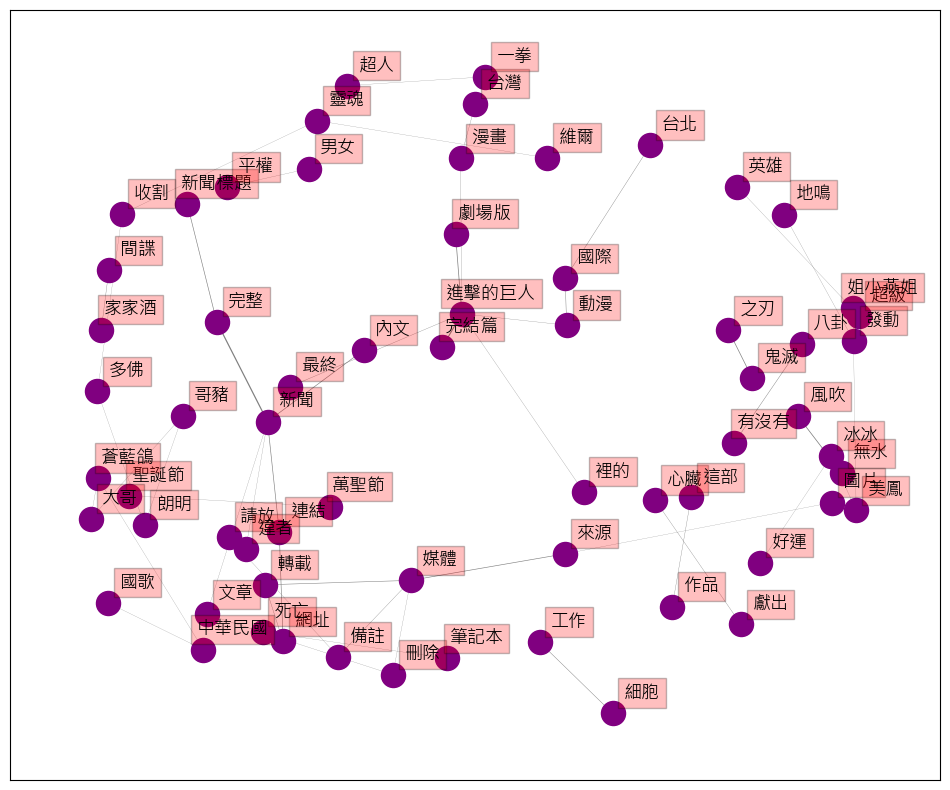

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=1.5)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Â¢ûÂä† labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## 5. Pairwise correlation
Ë®àÁÆóÂÖ©ÂÄãË©ûÂΩôÈñìÁöÑÁõ∏ÈóúÊÄß Pearson correlation

‰ΩøÁî®[numpy.corrcoef](https://numpy.org/doc/2.2/reference/generated/numpy.corrcoef.html)ÁöÑÊñπÊ≥ïË®àÁÆó

In [29]:
data_cor = MetaData.copy()

# ÈúÄË¶ÅÊîπÊàê‰ΩøÁî®Á©∫Ê†ºÈÄ£Êé•Êñ∑Â•ΩÁöÑË©û
data_cor['word'] = data_cor.sentence.apply(getToken).map(' '.join)
data_cor.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1617925959....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1617926905....   

                artTitle              artDate  \
0   [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
1     [ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 07:52:37   
2  Re:[ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 08:08:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫Ü\n\nÁ∏ΩÂÖ±139Ë©±ÁöÑÂäáÊÉÖ\n\nÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä\n\n\n‰ΩÜÊòØÂ¶ÇÊûúÊãø...   
2  ÂóØÂê∂\n\nÈÄôÊàëÊúâÊÉ≥ÈÅé\n\nÊääÂ∑®‰∫∫ÊãøÊéâ\n\nÁÑ∂ÂæåËÆäÊàê ‰∏ÄÊ®£ÊòØ9ÂÄã‰∫∫ Ë¢´9Á®ÆÁ•ûÁç∏ÈôÑË∫´\n\...   

                                            sentence  \
0      ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫ÜÁ∏ΩÂÖ±Ë©±ÁöÑÂäáÊÉÖÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä‰ΩÜÊòØÂ¶ÇÊûúÊãøÊéâÂ∑®‰∫∫È´òÁâÜ‰πüÊ≤íÊúâÂ≠òÂú®ÂøÖË¶ÅÁ´ãÈ´îË°åÂãïË£ù...   
2  ÂóØÂê∂ÈÄôÊàëÊúâÊÉ≥ÈÅéÊääÂ∑®‰∫∫ÊãøÊéâÁÑ∂ÂæåËÆäÊàê‰∏ÄÊ®£ÊòØÂÄã‰∫∫Ë¢´Á®ÆÁ•ûÁç∏ÈôÑË∫´Áï∂ÁÑ∂‰∏ªËßíÁÖß‰∏ÄÊ®£Ë®≠ÂÆöÁà∏Â™ΩÊ≠ª‰∫ÜËÆäÂ≠§ÂÖíÊé•Ëëó‰∏ª...   

                                                word  
0        ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê Â£ìÂÄíÊÄß Â•ΩË©ï ÁÜ±Â∫¶ ÊåÅÁ∫å Á•û‰Ωú Â∑®‰∫∫ Âæå‰æÜËÄÖ ‰πãÂßø ÊåëÊà∞ Âú∞‰Ωç Â∑®‰∫∫  
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÁµÇÊñº ÂÆåÁµê Á∏ΩÂÖ± ÂäáÊÉÖ ÂúçÁπû Â∑®‰∫∫ Ë∫´‰∏ä ÊãøÊéâ Â∑®‰∫∫ È´òÁâÜ Á´ãÈ´î Ë£ùÁΩÆ ÈõûËÇã Ë™ø...  
2  ÈÄôÊàëÊúâ ÊÉ≥ÈÅé Â∑®‰∫∫ ÊãøÊéâ Ë¢´Á®Æ Á•ûÁç∏ ÈôÑË∫´ ‰∏ªËßí Ë®≠ÂÆö Áà∏Â™Ω Â≠§ÂÖí ‰∏ªËßí Á•ûÁç∏ ÊúÄÂº∑ Â±†Âüé ...

In [30]:
# Bag of Word
# ÁØ©ÈÅ∏Ëá≥Â∞ëÂá∫ÁèæÂú®5ÁØáÊñáÁ´†‰ª•‰∏ä‰∏îË©ûÈ†ªÂâç300ÁöÑË©ûÂΩô
vectorizer = CountVectorizer(min_df = 5, max_features = 300)
X = vectorizer.fit_transform(data_cor["word"])
vocabulary = vectorizer.get_feature_names_out()

# ËΩâÊàêdataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

‰∏ÄÂ†Ü  ‰∏ÄÈÉ®  ‰∏ÄÈõÜ  ‰∏ÉÈæçÁè†  ‰∏äÊò†  ‰∏çÈåØ  ‰∏ñÁïå  ‰∏ñÁïåËßÄ  ‰∏≠Âúã  ‰∏ªÂ∏≠  ...  ÈúáÊíº  ÈùàÈ≠Ç  Èù¢Â∞ç  Èü≥Ê®Ç  È†êÂëä  È°û‰ºº  \
0     0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   
1     0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   
2     0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   
3     0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   
4     0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   
..   ..  ..  ..  ...  ..  ..  ..  ...  ..  ..  ...  ..  ..  ..  ..  ..  ..   
676   0   0   0    0   1   0   0    0   0   0  ...   0   0   0   0   0   0   
677   0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   
678   0   0   0    0   0   1   0    0   0   1  ...   0   0   0   0   0   0   
679   0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   
680   0   0   0    0   0   0   0    0   0   0  ...   0   0   0   0   0   0   

     È£æÊºî  È´îÈ©ó  È¨ºÊªÖ  È≠îÊ≥ï  
0     0   0   0   0  
1     0   0   0   0  
2     0   0   0   0  
3     0   0   0   0  
4     0   0   0   0  
..   ..  ..  ..  ..  
676   0   0   0   0  
677   0   0   0   0  
678   1   0   0   0  
679   0   1   0   0  
680   0   0   0   0  

[681 rows x 300 columns]

In [31]:
# Ë®àÁÆóË©û‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏
corr_matrix = np.corrcoef(DTM_df.T)

# ËΩâÊàêdataframe
Cor_df = pd.DataFrame(corr_matrix, index = DTM_df.columns, columns = DTM_df.columns)

Cor_df.insert(0, 'word1', Cor_df.columns)
Cor_df.reset_index(inplace = True, drop = True)

Cor_df

word1        ‰∏ÄÂ†Ü        ‰∏ÄÈÉ®        ‰∏ÄÈõÜ       ‰∏ÉÈæçÁè†        ‰∏äÊò†        ‰∏çÈåØ  \
0      ‰∏ÄÂ†Ü  1.000000  0.072701  0.055840  0.078647 -0.058390 -0.034676   
1      ‰∏ÄÈÉ®  0.072701  1.000000  0.253228  0.372757  0.047945  0.156301   
2      ‰∏ÄÈõÜ  0.055840  0.253228  1.000000 -0.017800  0.040664  0.116518   
3     ‰∏ÉÈæçÁè†  0.078647  0.372757 -0.017800  1.000000  0.053462  0.103392   
4      ‰∏äÊò† -0.058390  0.047945  0.040664  0.053462  1.000000 -0.010643   
..    ...       ...       ...       ...       ...       ...       ...   
295    È°û‰ºº  0.136873  0.177987 -0.000811 -0.019971  0.050183 -0.009079   
296    È£æÊºî  0.069118  0.429818 -0.012171  0.452235 -0.020522  0.092822   
297    È´îÈ©ó  0.051348  0.155191 -0.000233  0.079010  0.142911  0.143972   
298    È¨ºÊªÖ -0.022592  0.071000  0.219423  0.091665  0.055740 -0.004224   
299    È≠îÊ≥ï -0.022905 -0.013678 -0.010655  0.094578  0.020488 -0.015124   

           ‰∏ñÁïå       ‰∏ñÁïåËßÄ        ‰∏≠Âúã  ...        ÈúáÊíº        ÈùàÈ≠Ç        Èù¢Â∞ç  \
0    0.125796  0.086225  0.033846  ...  0.083510 -0.011687  0.041359   
1    0.346991  0.242682  0.032073  ...  0.242635  0.132392  0.076619   
2    0.141923  0.002611 -0.013262  ...  0.018875 -0.019097  0.018700   
3    0.238802  0.011404  0.032008  ...  0.077458  0.257264 -0.004045   
4    0.044890 -0.005958  0.099957  ...  0.083507 -0.032201  0.029670   
..        ...       ...       ...  ...       ...       ...       ...   
295  0.294101  0.228416  0.037722  ...  0.296713 -0.021427  0.239167   
296  0.207961  0.187530  0.047024  ...  0.106228  0.176989  0.087754   
297  0.314570  0.233761  0.000643  ...  0.173702  0.064686  0.058005   
298  0.052727 -0.017739 -0.008938  ...  0.061678  0.132353 -0.018654   
299  0.158212 -0.007390  0.012126  ... -0.012819  0.454879 -0.011871   

           Èü≥Ê®Ç        È†êÂëä        È°û‰ºº        È£æÊºî        È´îÈ©ó        È¨ºÊªÖ        È≠îÊ≥ï  
0    0.036325 -0.018115  0.136873  0.069118  0.051348 -0.022592 -0.022905  
1    0.536508  0.133913  0.177987  0.429818  0.155191  0.071000 -0.013678  
2    0.402183  0.306664 -0.000811 -0.012171 -0.000233  0.219423 -0.010655  
3    0.445530 -0.000609 -0.019971  0.452235  0.079010  0.091665  0.094578  
4    0.139412  0.033967  0.050183 -0.020522  0.142911  0.055740  0.020488  
..        ...       ...       ...       ...       ...       ...       ...  
295  0.080760  0.013477  1.000000  0.054522  0.376322 -0.000885 -0.011955  
296  0.365545 -0.010926  0.054522  1.000000  0.125799 -0.001731 -0.008050  
297  0.286758 -0.000869  0.376322  0.125799  1.000000  0.009512 -0.011819  
298  0.048260  0.024944 -0.000885 -0.001731  0.009512  1.000000  0.145135  
299 -0.011144 -0.009565 -0.011955 -0.008050 -0.011819  0.145135  1.000000  

[300 rows x 301 columns]

In [32]:
word_cor_df = Cor_df.melt(id_vars = 'word1', var_name = 'word2', value_name = 'cor')

# ÂéªÈô§ÂÖ©ÂÄãË©ûÁõ∏ÂêåÁöÑÊÉÖÊ≥Å
word_cor_df = word_cor_df[word_cor_df["word1"] != word_cor_df["word2"]]

word_cor_df.sort_values('cor', ascending=False).head(10)

word1 word2       cor
10645  Êñ∞ËÅûÊ®ôÈ°å    ÂÖßÊñá  0.976205
43535    ÂÖßÊñá  Êñ∞ËÅûÊ®ôÈ°å  0.976205
27584    ÈñìË´ú   ÂÆ∂ÂÆ∂ÈÖí  0.972825
85291   ÂÆ∂ÂÆ∂ÈÖí    ÈñìË´ú  0.972825
16336    ÊîπÁ∑®    Âéü‰Ωú  0.967083
40854    Âéü‰Ωú    ÊîπÁ∑®  0.967083
67235    ÂÖßÊñá    ÁΩ≤Âêç  0.963821
67345  Êñ∞ËÅûÊ®ôÈ°å    ÁΩ≤Âêç  0.963821
43724    ÁΩ≤Âêç  Êñ∞ËÅûÊ®ôÈ°å  0.963821
10724    ÁΩ≤Âêç    ÂÖßÊñá  0.963821

### 5.1 Âíå „ÄåË™øÊü•ÂÖµÂúò„Äç, „ÄåË®ìÁ∑¥ÂÖµÂúò„Äç Áõ∏ÈóúÊÄßÊúÄÈ´òÁöÑ 10 ÂÄãË©ûÂΩô

In [39]:
ice_sum = word_cor_df[(word_cor_df["word1"] == "Ë™øÊü•ÂÖµÂúò")].sort_values(by = ['cor'], ascending = False).head(10)
taste_sum = word_cor_df[(word_cor_df["word1"] == "ÈòøÁàæÊïè")].sort_values(by = ['cor'], ascending = False).head(10)

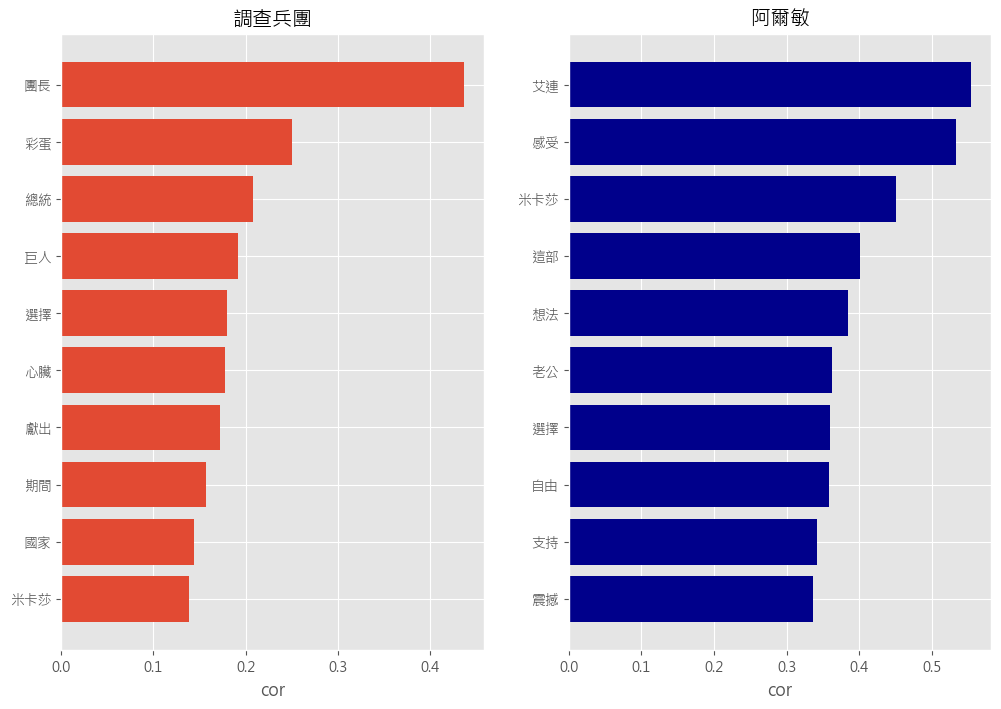

In [40]:
plt.figure(figsize=(12,8))   # È°ØÁ§∫ÂúñÊ°ÜÊû∂Â§ßÂ∞è (ÂØ¨,È´ò)
plt.style.use("ggplot")     # ‰ΩøÁî®ggplot‰∏ªÈ°åÊ®£Âºè

plt.subplot(121)
plt.title('Ë™øÊü•ÂÖµÂúò')
plt.xlabel('cor')
plt.barh(ice_sum['word2'],ice_sum['cor'])
plt.gca().invert_yaxis()

plt.subplot(122)
plt.title('ÈòøÁàæÊïè')
plt.xlabel('cor')
plt.barh(taste_sum['word2'],taste_sum['cor'],color="darkblue")
plt.gca().invert_yaxis()

plt.show()

### 5.2 ‰ΩøÁî®Ë©ûÂΩôÈóú‰øÇÂúñÁï´Âá∫‰ª•Ë©ûÈ†ªÂâç60ÁÇ∫ÁØÄÈªû‰∏îÁõ∏ÈóúÊÄßÈ´òÊñº0.3ÁöÑÁµÑÂêà

In [41]:
# ÈÄèÈÅéDTMÊâæÂá∫Ë©ûÈ†ªÂâç60È´òÁöÑË©ûÂΩô
most_freq_df = DTM_df.sum().sort_values(ascending=False).head(60).reset_index().rename(columns={'index':'word', 0:'count'})

most_freq_word = most_freq_df['word'].tolist()

In [43]:
# ‰øùÁïôÂ≠òÂú®Ë©ûÈ†ªÂâç60È´ò‰πãË©ûÂΩôÁöÑÁµÑÂêà
filtered_df = word_cor_df[(word_cor_df['word1'].isin(most_freq_word)) & (word_cor_df['word2'].isin(most_freq_word))]

# ÁØ©ÈÅ∏Âá∫Áõ∏Èóú‰øÇÊï∏Â§ßÊñº0.3ÁöÑÁµÑÂêà
filtered_df = filtered_df[filtered_df['cor'] > 0.3]
filtered_df.reset_index(inplace=True, drop=True)
filtered_df

word1 word2       cor
0      ‰∏ªËßí   ‰∏ÉÈæçÁè†  0.404740
1      ‰ΩúÂìÅ   ‰∏ÉÈæçÁè†  0.650900
2      ÂäáÊÉÖ   ‰∏ÉÈæçÁè†  0.474440
3     Áúü‰∫∫Áâà   ‰∏ÉÈæçÁè†  0.652659
4      ËßíËâ≤   ‰∏ÉÈæçÁè†  0.351747
..    ...   ...       ...
339    Ëá™Áî±    ÈõªÂΩ±  0.350306
340    ËßÄÁúæ    ÈõªÂΩ±  0.437516
341    ËßíËâ≤    ÈõªÂΩ±  0.485261
342    ÈÄôÈÉ®    ÈõªÂΩ±  0.528219
343    ‰πãÂàÉ    È¨ºÊªÖ  0.928346

[344 rows x 3 columns]

In [44]:
# Create network plot 
g = nx.Graph()

# Âª∫Á´ã nodes ÈñìÁöÑÈÄ£Áµê
for i in range(len(filtered_df)):
    g.add_edge(filtered_df["word1"][i], filtered_df["word2"][i], weight=filtered_df["cor"][i])
    
# ÂèñÂæóedgeÊ¨äÈáç
weights = [w[2]['weight']*5 for w in  g.edges(data=True)]

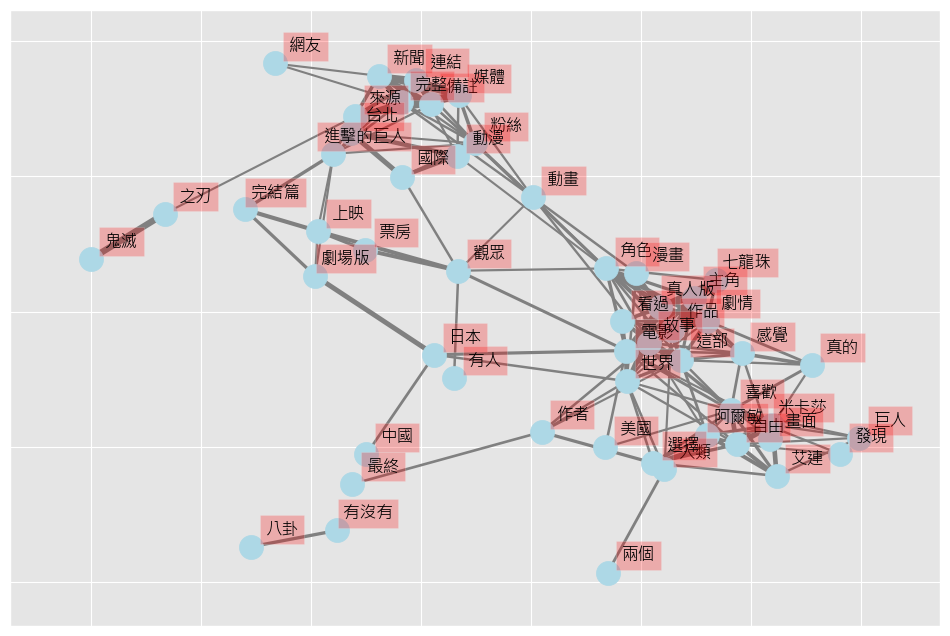

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(g, k=0.3)

# networks
nx.draw_networkx(g, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='lightblue',
                 with_labels = False,
                 ax=ax)

# Â¢ûÂä† labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=12)
    
plt.show()

## 6. Ë®àÁÆóÊñáÁ´†Áõ∏‰ººÂ∫¶
‰ª•TF-IDFÁöÑÁµêÊûúÁï∂‰ΩúÊñáÁ´†ÁöÑÂêëÈáèÔºåË®àÁÆó Cosine Similarity ÊâæÂá∫Áõ∏‰ººÁöÑÊñáÁ´†   

<img src="./img/pic3.PNG" style="float:left;" width="50%">  

In [46]:
data_cos = data_cor.copy()
data_cos.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1617898345....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1617925959....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1617926905....   

                artTitle              artDate  \
0   [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü  2021-04-09 00:12:23   
1     [ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 07:52:37   
2  Re:[ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü  2021-04-09 08:08:23   

                                          artContent  \
0  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê‰∫ÜÔºåÂ£ìÂÄíÊÄßÂ•ΩË©ï\n\nEVA ÁÜ±Â∫¶ÊåÅÁ∫å20Âπ¥ÁöÑÁ•û‰Ωú\n\nÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåë...   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫Ü\n\nÁ∏ΩÂÖ±139Ë©±ÁöÑÂäáÊÉÖ\n\nÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä\n\n\n‰ΩÜÊòØÂ¶ÇÊûúÊãø...   
2  ÂóØÂê∂\n\nÈÄôÊàëÊúâÊÉ≥ÈÅé\n\nÊääÂ∑®‰∫∫ÊãøÊéâ\n\nÁÑ∂ÂæåËÆäÊàê ‰∏ÄÊ®£ÊòØ9ÂÄã‰∫∫ Ë¢´9Á®ÆÁ•ûÁç∏ÈôÑË∫´\n\...   

                                            sentence  \
0      ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂÆåÁµê‰∫ÜÂ£ìÂÄíÊÄßÂ•ΩË©ïÁÜ±Â∫¶ÊåÅÁ∫åÂπ¥ÁöÑÁ•û‰ΩúÂ∑®‰∫∫‰ª•Âæå‰æÜËÄÖ‰πãÂßøÊåëÊà∞‰ª•Âú∞‰ΩçËÄåË®ÄÂ∑®‰∫∫‰∏¶ËÇ©‰∫ÜÂóéÂèàÂç¶Âê¶   
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµÇÊñºÂÆåÁµê‰∫ÜÁ∏ΩÂÖ±Ë©±ÁöÑÂäáÊÉÖÈÉΩÂúçÁπûÂú®Â∑®‰∫∫Ë∫´‰∏ä‰ΩÜÊòØÂ¶ÇÊûúÊãøÊéâÂ∑®‰∫∫È´òÁâÜ‰πüÊ≤íÊúâÂ≠òÂú®ÂøÖË¶ÅÁ´ãÈ´îË°åÂãïË£ù...   
2  ÂóØÂê∂ÈÄôÊàëÊúâÊÉ≥ÈÅéÊääÂ∑®‰∫∫ÊãøÊéâÁÑ∂ÂæåËÆäÊàê‰∏ÄÊ®£ÊòØÂÄã‰∫∫Ë¢´Á®ÆÁ•ûÁç∏ÈôÑË∫´Áï∂ÁÑ∂‰∏ªËßíÁÖß‰∏ÄÊ®£Ë®≠ÂÆöÁà∏Â™ΩÊ≠ª‰∫ÜËÆäÂ≠§ÂÖíÊé•Ëëó‰∏ª...   

                                                word  
0        ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÂÆåÁµê Â£ìÂÄíÊÄß Â•ΩË©ï ÁÜ±Â∫¶ ÊåÅÁ∫å Á•û‰Ωú Â∑®‰∫∫ Âæå‰æÜËÄÖ ‰πãÂßø ÊåëÊà∞ Âú∞‰Ωç Â∑®‰∫∫  
1  ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ ÁµÇÊñº ÂÆåÁµê Á∏ΩÂÖ± ÂäáÊÉÖ ÂúçÁπû Â∑®‰∫∫ Ë∫´‰∏ä ÊãøÊéâ Â∑®‰∫∫ È´òÁâÜ Á´ãÈ´î Ë£ùÁΩÆ ÈõûËÇã Ë™ø...  
2  ÈÄôÊàëÊúâ ÊÉ≥ÈÅé Â∑®‰∫∫ ÊãøÊéâ Ë¢´Á®Æ Á•ûÁç∏ ÈôÑË∫´ ‰∏ªËßí Ë®≠ÂÆö Áà∏Â™Ω Â≠§ÂÖí ‰∏ªËßí Á•ûÁç∏ ÊúÄÂº∑ Â±†Âüé ...

In [47]:
transformer = TfidfTransformer()  
print(transformer) 
# Â∞áË©ûÈ†ªÁü©Èô£XÁµ±Ë®àÊàêTF-IDFÂÄº
tfidf = transformer.fit_transform(X)  

# ËΩâÊàêdataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())
TFIDF_df

TfidfTransformer()


‰∏ÄÂ†Ü   ‰∏ÄÈÉ®   ‰∏ÄÈõÜ  ‰∏ÉÈæçÁè†       ‰∏äÊò†        ‰∏çÈåØ   ‰∏ñÁïå  ‰∏ñÁïåËßÄ   ‰∏≠Âúã        ‰∏ªÂ∏≠  ...   ÈúáÊíº  \
0    0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
1    0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
2    0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
3    0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
4    0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
..   ...  ...  ...  ...      ...       ...  ...  ...  ...       ...  ...  ...   
676  0.0  0.0  0.0  0.0  0.15748  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
677  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
678  0.0  0.0  0.0  0.0  0.00000  0.125037  0.0  0.0  0.0  0.142922  ...  0.0   
679  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   
680  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000  ...  0.0   

      ÈùàÈ≠Ç   Èù¢Â∞ç   Èü≥Ê®Ç   È†êÂëä   È°û‰ºº       È£æÊºî        È´îÈ©ó   È¨ºÊªÖ   È≠îÊ≥ï  
0    0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  
..   ...  ...  ...  ...  ...      ...       ...  ...  ...  
676  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  
677  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  
678  0.0  0.0  0.0  0.0  0.0  0.15419  0.000000  0.0  0.0  
679  0.0  0.0  0.0  0.0  0.0  0.00000  0.451098  0.0  0.0  
680  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  

[681 rows x 300 columns]

Ë®àÁÆóÊñáÁ´†ÈñìÁöÑcosine similarity

In [48]:
cosine_matrix = cosine_similarity(tfidf.toarray(), tfidf.toarray())

Ê™¢Ë¶ñËàáÁ¨¨‰∏ÄÁØáÊñáÁ´†Áõ∏‰ººÁöÑÊñáÁ´†

In [49]:
cos_df = pd.DataFrame(cosine_matrix[0], columns = ['cos_similarity'])
cos_df

cos_similarity
0          1.000000
1          0.597056
2          0.150707
3          0.195205
4          0.218618
..              ...
676        0.008080
677        0.002809
678        0.005737
679        0.000000
680        0.023926

[681 rows x 1 columns]

In [50]:
cos_df = cos_df.merge(data_cos, how = 'left', left_index=True, right_index=True)
cos_df.loc[:,["cos_similarity", "artTitle", "artUrl"]].sort_values(by=['cos_similarity'], ascending=False).head(10)

cos_similarity                    artTitle  \
0          1.000000        [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ë∑üEVAÂπ≥Ëµ∑Âπ≥Âùê‰∫ÜÂóéÔºü   
609        0.649925  Re:[Êñ∞ËÅû]ÂÆâËø™È¶¨Â∏åÊèêÁ¢∫Ë™çÁÇ∫Â≤°ÊÅ©ÂÆáÂÆôËùôËù†‰ø†ÈõªÂΩ±Â∞éÊºî   
16         0.635654             [ÂïèÂç¶]Ë¨õÈÄ≤Â∑®ÁöÑÊòØ‰∏çÊòØÂæà‰ΩéÁ´ØÔºü   
35         0.631097            [ÁàÜÂç¶]Âè∞ÂçóÂÆâÂπ≥Âá∫ÁèæÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÔºÅ   
1          0.597056          [ÂïèÂç¶]ÊãøÊéâÂ∑®‰∫∫ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÈÇÑÂâ©‰ªÄÈ∫ºÔºü   
150        0.591123   Re:[ÂïèÂç¶]ÂÖ©Ê¥•ÂãòÂêâÈÄ≤ÂÖ•ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫‰∏ñÁïåÊúÉÊÄéÈ∫ºÊ®£?   
478        0.566306          [ÂïèÂç¶]Âè∞Á©çÈõªÂçäÂ∞éÈ´îÊòØ‰∏çÊòØÂè∞ÁÅ£ÁöÑÂ∑®‰∫∫   
439        0.511962          [ÂïèÂç¶]ÁôºÊéòÈÄ≤Â∑®ÁöÑÁè≠Èï∑Ë¢´Âà§ÂàëÂçÅ‰∫åÂπ¥?   
13         0.510500            [ÂïèÂç¶]ÊúâË∂ÖË∂äÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁöÑ‰ΩúÂìÅÂóé   
221        0.492594       [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫È¶¨ÊãâÊùæÊØèÂ§©ÈÉΩÂπæÂçÉ‰∫∫Âú®Áúã?   

                                                artUrl  
0    https://www.ptt.cc/bbs/Gossiping/M.1617898345....  
609  https://www.ptt.cc/bbs/movie/M.1686890261.A.C6...  
16   https://www.ptt.cc/bbs/Gossiping/M.1617968222....  
35   https://www.ptt.cc/bbs/Gossiping/M.1618287478....  
1    https://www.ptt.cc/bbs/Gossiping/M.1617925959....  
150  https://www.ptt.cc/bbs/Gossiping/M.1643883660....  
478  https://www.ptt.cc/bbs/Gossiping/M.1701918993....  
439  https://www.ptt.cc/bbs/Gossiping/M.1699510456....  
13   https://www.ptt.cc/bbs/Gossiping/M.1617959981....  
221  https://www.ptt.cc/bbs/Gossiping/M.1654692884....

Ê™¢Ë¶ñËàáÁ¨¨14ÁØáÊñáÁ´†Áõ∏‰ººÁöÑÊñáÁ´†

In [51]:
cos_df_14 = pd.DataFrame(cosine_matrix[14], columns=['cos_similarity'])

cos_df_14 = cos_df_14.merge(data_cos, how = 'left', left_index=True, right_index=True)
cos_df_14.loc[:,["cos_similarity", "artTitle", "artUrl"]].sort_values(by=['cos_similarity'], ascending=False).head(10)

cos_similarity              artTitle  \
14         1.000000  [ÂïèÂç¶]Âì™ÈÉ®Êº´Áï´Âú®Â§ßÂÆ∂Áúº‰∏≠ÊâçÁÆóÊòØÁ•ûÁµêÂ±ÄÔºü   
218        0.543380  [ÂïèÂç¶]‰∏çgoogleË™™ÂæóÂá∫‰πùÂ§ßÂ∑®‰∫∫ÂóéÔºü   
581        0.501106      [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ËÉΩÁ®±‰∏äÁ•û‰ΩúÂóé?   
15         0.468827      [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁµêÂ±Ä‰Ω†ÊªøÊÑèÂóéÔºü   
13         0.405284      [ÂïèÂç¶]ÊúâË∂ÖË∂äÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÁöÑ‰ΩúÂìÅÂóé   
441        0.384805      [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂãïÁï´ÂÄºÂæóÁúãÂóé?   
36         0.370895   Re:[ÁàÜÂç¶]Âè∞ÂçóÂÆâÂπ≥Âá∫ÁèæÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÔºÅ   
3          0.359164   [ÂïèÂç¶]ÈÄ≤ÊìäÁöÑÂ∑®‰∫∫Ê†πÊú¨Â∞±ÊòØÁ•û‰ΩúÔºàÁÑ°Èõ∑Ôºâ   
325        0.344209      [ÂïèÂç¶]Âè™ÊúâÊàë‰∏çÁòãÈÄ≤ÊìäÁöÑÂ∑®‰∫∫ÂóéÔºü   
451        0.334088      Re:[ÂïèÂç¶]Â•≥Ê¥õÂü∫484ÂæàÊ∏£Ôºü   

                                                artUrl  
14   https://www.ptt.cc/bbs/Gossiping/M.1617961202....  
218  https://www.ptt.cc/bbs/Gossiping/M.1652788176....  
581  https://www.ptt.cc/bbs/Gossiping/M.1740805837....  
15   https://www.ptt.cc/bbs/Gossiping/M.1617965325....  
13   https://www.ptt.cc/bbs/Gossiping/M.1617959981....  
441  https://www.ptt.cc/bbs/Gossiping/M.1699542344....  
36   https://www.ptt.cc/bbs/Gossiping/M.1618324361....  
3    https://www.ptt.cc/bbs/Gossiping/M.1617933418....  
325  https://www.ptt.cc/bbs/Gossiping/M.1680195422....  
451  https://www.ptt.cc/bbs/Gossiping/M.1699788418....

## 7. Ë£úÂÖÖÔºöÂª∫Á´ãNgramÈ†êÊ∏¨Ê®°Âûã
ÂºïÂÖ•MarkovÂÅáË®≠Ôºå‰πüÂ∞±ÊòØÁï∂ÂâçÁöÑÈÄôÂÄãÂ≠óÂÉÖÂÉÖËàáÂâçÂπæÂÄãÊúâÈôêÁöÑÂ≠óÁõ∏Èóú   
$$P(w_i|w_1,...,w_{i-1})=P(w_i|w_{i-m+1},...,w_{i-1})$$  
bi-gram (m=2):
$$ P(w_i|w_{i-1})=\frac {count(w_{i-1},w_i)} {count(w_{i-1})} $$   
tri-gram (m=3):  
$$ P(w_i|w_{i-2},w_{i-1})=\frac {count(w_{i-2},w_{i-1},w_i)} {count(w_{i-2},w_{i-1})} $$   



ÂèÉËÄÉÁ∂≤Á´ôÔºö
- [N-gram Language Models](https://towardsdatascience.com/n-gram-language-models-af6085435eeb)
- [Ëá™ÁÑ∂Ë™ûË®ÄËôïÁêÜ ‚Äî ‰ΩøÁî® N-gram ÂØ¶ÁèæËº∏ÂÖ•ÊñáÂ≠óÈ†êÊ∏¨](https://medium.com/%E6%89%8B%E5%AF%AB%E7%AD%86%E8%A8%98/%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E8%99%95%E7%90%86-%E4%BD%BF%E7%94%A8-n-gram-%E5%AF%A6%E7%8F%BE%E8%BC%B8%E5%85%A5%E6%96%87%E5%AD%97%E9%A0%90%E6%B8%AC-10ac622aab7a)
- [Ëá™ÁÑ∂Ë™ûË®ÄËôïÁêÜ‰∏≠N-GramÊ®°Âûã‰ªãÁ¥π](https://zhuanlan.zhihu.com/p/32829048)

In [52]:
data3 = MetaData.copy()
sen_tokens = data3.sentence.apply(getToken).tolist()

In [53]:
def ngram(documents, N=2):
    ngram_prediction = dict()
    total_grams = list()
    words = list()
    Word = namedtuple('Word', ['word', 'prob'])

    for doc in documents:
        # Âä†‰∏äÈñãÈ†≠ÂíåÁµêÂ∞æ tag
        split_words = ['<s>'] + list(doc) + ['</s>']
        # Ë®àÁÆóÂàÜÂ≠ê
        [total_grams.append(tuple(split_words[i:i+N])) for i in range(len(split_words)-N+1)]
        # Ë®àÁÆóÂàÜÊØç
        [words.append(tuple(split_words[i:i+N-1])) for i in range(len(split_words)-N+2)]
        
    total_word_counter = Counter(total_grams)
    word_counter = Counter(words)
    
    for key in total_word_counter:
        word = ''.join(key[:N-1])
        if word not in ngram_prediction:
            ngram_prediction.update({word: set()})
            
        next_word_prob = total_word_counter[key]/word_counter[key[:N-1]] #P(B|A)
        w = Word(key[-1], '{:.3g}'.format(next_word_prob))
        ngram_prediction[word].add(w)
        
    return ngram_prediction

In [54]:
# BigramÈ†êÊ∏¨Ê®°ÂûãÁÇ∫‰æã
bi_prediction = ngram(sen_tokens, N=2)

**È†êÊ∏¨‰∏ã‰∏ÄÂÄãÂá∫ÁèæÁöÑË©û**

In [56]:
text = 'ËâæÂÄ´'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: Á±≥Âç°Ëéé, probability: 0.0421
next word: ËëâÂç°, probability: 0.0421
next word: Â¥©ÊΩ∞, probability: 0.0421
next word: </s>, probability: 0.0316
next word: ÁπºÊâø, probability: 0.0316


In [57]:
text = 'Â∑®‰∫∫'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: ‰πãÂäõ, probability: 0.0337
next word: </s>, probability: 0.0241
next word: ÂãïÁï´, probability: 0.0193
next word: ‰∏ñÁïå, probability: 0.0193
next word: Â∑®‰∫∫, probability: 0.0145


# Á¨¨‰∏ÉÈÄ±ÔºöÊñá‰ª∂ÂàÜÈ°û

Êú¨Âë®Ë™≤Á®ãÁÇ∫„ÄåÊñá‰ª∂ÂàÜÈ°û„ÄçÔºå‰∏ªË¶Å‰ΩøÁî®ÊñáÁ´†ËΩâDTM(document term matrix)ÁöÑÊñπÂºèÔºåÂ∞áÊñáÁ´†Áî®‰∏çÂêåÁöÑÂ≠óË©ûÂàÜÂ∏ÉË°®Á§∫ÔºåÂÜçÂà©Áî®pythonÁöÑsklearnÂ•ó‰ª∂ÔºåÂ•óÁî®Ê±∫Á≠ñÊ®π„ÄÅlogistic regressionÁ≠âÊñπÂºèË®ìÁ∑¥Ê®°ÂûãÔºå‰ª•ÂàÜËæ®‰∏çÂêåÁöÑÊñá‰ª∂„ÄÇÊú¨ÁØá Jupyter Notebook Â∞áÂ±ïÁ§∫„Äå‰∏≠Êñá„ÄçÁöÑÊñá‰ª∂ÂàÜÈ°ûÔºå‰ΩøÁî®ËÅØÂêàÊñ∞ËÅûÁ∂≤ÁöÑÂõõÂÄãÁâàÂà•ÊñáÁ´†ÂÅöÁ§∫ÁØÑÈÄ≤Ë°åÂàÜÈ°ûÂô®Ë®ìÁ∑¥ÂíåË©ï‰º∞ÔºåÊúÄÂæåÂú®‰ΩøÁî®Êù±Ê£ÆÊñ∞ËÅûÁöÑÊñáÁ´†ÈÄ≤Ë°åÈ†êÊ∏¨„ÄÇ

## 1. Â•ó‰ª∂Ë™™Êòé
‰∏ãÈù¢ÂàóÂá∫Âú®Êú¨Ê¨°ÂØ¶‰ΩúÈÅéÁ®ã‰∏≠ÊàëÂÄëÊâÄ‰ΩøÁî®Âà∞ÁöÑÁõ∏ÈóúÂ•ó‰ª∂ÔºåÂú®ÈÄôÂÄãJupyter NotebookÁï∂‰∏≠ÊàëÂÄëÂ∞áÊúÉÁ∞°ÂñÆÁöÑÂ±ïÁ§∫ÈÄô‰∫õÂ•ó‰ª∂ÁöÑ‰ΩøÁî®ÊñπÂºèÔºåÈóúÊñºÂêÑÂÄãÂ•ó‰ª∂ÁöÑÈÄ≤Èöé‰ΩøÁî®Ë´ãÂêåÂ≠∏ÂèÉÁÖßÂÖ∂ÂÆòÁ∂≤ÁöÑË™™Êòé„ÄÇ
- **sklearn**: ÂÖ®ÂêçÁÇ∫Scikit-learnÔºåÊ©üÂô®Â≠∏ÁøíÁöÑÂ∏∏Áî®Âª∫Ê®°Â•ó‰ª∂ÔºåÂåÖÂê´ÂêÑÁ®ÆÂàÜÁæ§„ÄÅÂàÜÈ°û„ÄÅËø¥Ê≠∏Ê®°ÂûãÔºåÂ¶ÇÈö®Ê©üÊ£ÆÊûó„ÄÅSVMÊàñ K-means Á≠â„ÄÇ
- pandas: ‰∏ÄÂÄãË≥áÊñôÂàÜÊûêÁöÑÂáΩÂºèÂ∫´ÔºåÊèê‰æõ‰∫ÜDataFrameÁ≠âË≥áÊñôÊ†ºÂºèÔºåËàáË≥áÊñôËôïÁêÜÁöÑÂáΩÊï∏„ÄÇ
- jieba: ÁµêÂ∑¥Â•ó‰ª∂Ôºå‰∏≠ÊñáÊñ∑Ë©ûÂ•ó‰ª∂
- seaborn: Âü∫Êñº matplotlib Â∞ÅË£ùÁöÑÁπ™ÂúñÂ∑•ÂÖ∑

In [ ]:
import re
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, KFold
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    RocCurveDisplay
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÈ´î

In [ ]:
# Ë®≠ÂÆöÂúñÁöÑ‰∏≠ÊñáÂ≠óÈ´î (ÁÑ°Ê≥ïÈ°ØÁ§∫ÁöÑË©±ÂèØ‰ª•Ë©¶Ë©¶‚ÄòMicrosoft JhengHei‚ÄôÂ≠óÈ´î)
# ‰πüÂèØÂèÉËÄÉÔºöhttps://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #‰ΩøÂúñ‰∏≠‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus'] = False #‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫

## 2. ÊñáÂ≠óÂâçËôïÁêÜ

- Ë≥áÊñô‰æÜÊ∫êÔºöDcard
- ÁâàÂà•ÔºöËøΩÊòü„ÄÅÂØµÁâ©„ÄÅÊôÇ‰∫ã„ÄÅYoutuber
- ÊôÇÈñìÁØÑÂúçÔºö2024/11/01 ~ 2024/11/30
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°

È¶ñÂÖàÊàëÂÄëÂÖàÁúãÊñáÈõÜÁöÑÂü∫Êú¨Ë≥áÊñôÔºå‰∏¶ÂÅöÊñáÈõÜÂâçËôïÁêÜ„ÄÇ

In [ ]:
udn = pd.read_csv("raw_data/ËøΩÊòü_ÂØµÁâ©_ÊôÇ‰∫ã_Youtuber.csv")  # ÂåØË≥áÊñô
udn.head(3)

system_id dataSource                                          artUrl  \
0          1      Dcard  https://www.dcard.tw/f/entertainer/p/257328269   
1          2      Dcard  https://www.dcard.tw/f/entertainer/p/257344585   
2          3      Dcard  https://www.dcard.tw/f/entertainer/p/257329787   

            artDate               artTitle  \
0  2024/11/25 04:51  #ÂàÜ‰∫´ Â§öÊ¨æÊµÆË™áÂ•ΩÊãçÁÖßÊãøÈ£ØÊííÊáâÊè¥ÊâáÂàÜ‰∫´‚ô°‚ô°   
1  2024/11/27 00:25   #ÂàÜ‰∫´ 2024MAMAÔºçYEONJUN   
2  2024/11/25 08:02          #ÈñíËÅä B.A.PÁ≤âÁµ≤Á§æÁæ§   

                                          artContent  artCatagory  \
0  ÁöÜ„Åï„Çì„ÄÅ„Åì„Çì„Å´„Å°„ÅØüíõ‰∫åÂÆÆÂ§™Â§™„Åß„Åô·ôèÃ§Ã´Õö ‚ô°„Çõ\n\nÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏!!\nÊúÄËøë...  entertainer   
1   https://youtu.be/hXPpqsFIGJw?si=dYUOE4gMoet8LG9d  entertainer   
2  BJYM BANG&JUNG&YOO&MOON‚ù§Ô∏è‚ù§Ô∏è\n\n\n\nÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•„ÄåÏö∞Î¶¨ ...  entertainer   

   commentCount   department gender school  
0             0        jmimi      F  ‰∫åÂÆÆÂ§™Â§™üíõ  
1             0    lin_10_72      F  ü©µÏïàÏã¨Ïö∞ü©∑  
2             0  cathy051289      F  Ê∑®Ê∑®ÂæàÂÆâÈùú

In [ ]:
# ÁúãÁúãÊúâÂπæÁØáÊñáÁ´†
print(f"number of posts: {udn.shape[0]}")
print(f"date range: {(udn['artDate'].min(), udn['artDate'].max())}")
print(f"category: \n{udn['artCatagory'].value_counts()}")

number of posts: 4488
date range: ('2024/11/1 00:17', '2024/11/9 23:48')
category: 
trending       1441
pet            1196
entertainer     937
youtuber        914
Name: artCatagory, dtype: int64


+ 2.1 Êñ∑Âè•
+ 2.2 Êñ∑Ë©ûÔºàÂà™ÊéâÊ¨°Êï∏Â§™Â∞ëÁöÑ„ÄÅÊ®ôÈªûÁ¨¶Ëôü„ÄÅÂÅúÁî®Â≠óÔºâ

### 2.1 Ê∏ÖÁêÜ

Âà©Áî®ÂïèËôü„ÄÅÂè•ËôüÊàñÈ©öÂòÜËôüÁ≠âÁ¨¶ËôüÊñ∑Âè•ÔºåÊàñÊòØÂ¶ÇÊûúÂá∫Áèæ‰∏≠ÊñáÊàñÊòØËã±ÊñáÁöÑÁúÅÁï•ËôüÔºåÂÉèÊòØ`...`‰πüÊúÉÊñ∑Âè•ÔºåÊúÄÂæåË®≠ÂÆöÊúÉÂéªÈô§ÁµêÂ∞æÁöÑÁ©∫ÁôΩÁ¨¶Ëôü„ÄÇ

In [ ]:
# ÈÅéÊøæ nan ÁöÑË≥áÊñô
udn = udn.dropna(subset=['artTitle'])
udn = udn.dropna(subset=['artContent'])
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)
udn.head(3)

system_id dataSource                                          artUrl  \
0          1      Dcard  https://www.dcard.tw/f/entertainer/p/257328269   
1          2      Dcard  https://www.dcard.tw/f/entertainer/p/257344585   
2          3      Dcard  https://www.dcard.tw/f/entertainer/p/257329787   

            artDate           artTitle  \
0  2024/11/25 04:51  ÂàÜ‰∫´Â§öÊ¨æÊµÆË™áÂ•ΩÊãçÁÖßÊãøÈ£ØÊííÊáâÊè¥ÊâáÂàÜ‰∫´   
1  2024/11/27 00:25                 ÂàÜ‰∫´   
2  2024/11/25 08:02             ÈñíËÅäÁ≤âÁµ≤Á§æÁæ§   

                                          artContent  artCatagory  \
0  ÁöÜ‰∫åÂÆÆÂ§™Â§™ÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏ÊúÄËøëÂõ†ÁÇ∫Êé•ÂñÆÂÅö‰∫ÜÂ•ΩÂπæÊääÊâáÂ≠êÂÅöÂÆåÁöÑÂøÉÂæóÊòØ‰πãÂâçÂÅöÁöÑ‰πüÂ§™ÈÜú‰∫ÜÂêß...  entertainer   
1                                                     entertainer   
2                                 ÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•Ë´ãÈªûÈÅ∏‰ª•‰∏ãÈÄ£ÁµêÂä†ÂÖ•Á§æÁæ§  entertainer   

   commentCount   department gender school  
0             0        jmimi      F  ‰∫åÂÆÆÂ§™Â§™üíõ  
1             0    lin_10_72      F  ü©µÏïàÏã¨Ïö∞ü©∑  
2             0  cathy051289      F  Ê∑®Ê∑®ÂæàÂÆâÈùú

ÊñáÁ´†ÁöÑÊ®ôÈ°å`artTitle`ÂíåÂÖßÊñá`sentence`ÈÉΩÊúÉÁ¥çÂÖ•ÂàÜÊûêÁöÑÂÖßÂÆπÔºåÊàêÁÇ∫Êñ∞ÁöÑ`content`Ê¨Ñ‰Ωç„ÄÇ

In [ ]:
# Áïô‰∏ã content
udn["content"] = udn["artTitle"] + udn["artContent"]
udn = udn[["content", "artUrl", "artCatagory"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê
udn.head()

content  \
0  ÂàÜ‰∫´Â§öÊ¨æÊµÆË™áÂ•ΩÊãçÁÖßÊãøÈ£ØÊííÊáâÊè¥ÊâáÂàÜ‰∫´ÁöÜ‰∫åÂÆÆÂ§™Â§™ÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏ÊúÄËøëÂõ†ÁÇ∫Êé•ÂñÆÂÅö‰∫ÜÂ•ΩÂπæÊää...   
1                                                 ÂàÜ‰∫´   
2                           ÈñíËÅäÁ≤âÁµ≤Á§æÁæ§ÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•Ë´ãÈªûÈÅ∏‰ª•‰∏ãÈÄ£ÁµêÂä†ÂÖ•Á§æÁæ§   
3                                      ÈõÜ‰∏≠Ë®éË´ñÁ¨¨‰∏ÄÂºµËø∑‰Ω†Â∞àËºØËàûÂè∞   
4  ÈñíËÅäÂ§ßÂÆ∂ÊúâË≤∑ÈÅéÈªÉÁâõÁ•®Âè™Ë¶ÅÂä†ÂÉπÂ∞±ÁÆóÂóéÊÉ≥Áü•ÈÅìÈÄôË£°ÁöÑ‰∫∫ÊúâÁúãÈÅéÊºîÂî±ÊúÉÁöÑ‰∫∫Ë≤∑ÈªÉÁâõÁ•®ÁöÑÊØî‰æãÊàëËá™Â∑±ÊòØÊ≤íÊúâÈÉΩ...   

                                           artUrl  artCatagory  
0  https://www.dcard.tw/f/entertainer/p/257328269  entertainer  
1  https://www.dcard.tw/f/entertainer/p/257344585  entertainer  
2  https://www.dcard.tw/f/entertainer/p/257329787  entertainer  
3  https://www.dcard.tw/f/entertainer/p/257330597  entertainer  
4  https://www.dcard.tw/f/entertainer/p/257334902  entertainer

In [ ]:
# ÁúãÁúãÊúâÂπæÁØáÊñáÁ´†
print(f"total docs: {udn.shape[0]}")


total docs: 4179


### 2.2 Êñ∑Ë©û

In [ ]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# Êñ∞Â¢ûstopwords
# jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

In [ ]:
# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

In [ ]:
udn["words"] = udn["content"].apply(getToken).map(" ".join)
udn.head()

Building prefix dict from C:\Users\acer\OneDrive\Ê°åÈù¢\Á¢©Â£´Ë≥áÊñô\Á§æÁæ§Â™íÈ´îÂàÜÊûê\week07\dict\dict.txt.big ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.u46d1627e410ec4d2996d2d83c1fdb844.cache
Loading model cost 1.412 seconds.
Prefix dict has been built successfully.


content  \
0  ÂàÜ‰∫´Â§öÊ¨æÊµÆË™áÂ•ΩÊãçÁÖßÊãøÈ£ØÊííÊáâÊè¥ÊâáÂàÜ‰∫´ÁöÜ‰∫åÂÆÆÂ§™Â§™ÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏ÊúÄËøëÂõ†ÁÇ∫Êé•ÂñÆÂÅö‰∫ÜÂ•ΩÂπæÊää...   
1                                                 ÂàÜ‰∫´   
2                           ÈñíËÅäÁ≤âÁµ≤Á§æÁæ§ÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•Ë´ãÈªûÈÅ∏‰ª•‰∏ãÈÄ£ÁµêÂä†ÂÖ•Á§æÁæ§   
3                                      ÈõÜ‰∏≠Ë®éË´ñÁ¨¨‰∏ÄÂºµËø∑‰Ω†Â∞àËºØËàûÂè∞   
4  ÈñíËÅäÂ§ßÂÆ∂ÊúâË≤∑ÈÅéÈªÉÁâõÁ•®Âè™Ë¶ÅÂä†ÂÉπÂ∞±ÁÆóÂóéÊÉ≥Áü•ÈÅìÈÄôË£°ÁöÑ‰∫∫ÊúâÁúãÈÅéÊºîÂî±ÊúÉÁöÑ‰∫∫Ë≤∑ÈªÉÁâõÁ•®ÁöÑÊØî‰æãÊàëËá™Â∑±ÊòØÊ≤íÊúâÈÉΩ...   

                                           artUrl  artCatagory  \
0  https://www.dcard.tw/f/entertainer/p/257328269  entertainer   
1  https://www.dcard.tw/f/entertainer/p/257344585  entertainer   
2  https://www.dcard.tw/f/entertainer/p/257329787  entertainer   
3  https://www.dcard.tw/f/entertainer/p/257330597  entertainer   
4  https://www.dcard.tw/f/entertainer/p/257334902  entertainer   

                                               words  
0  ÂàÜ‰∫´ Â§öÊ¨æ ÊµÆË™á ÊãçÁÖß ÊãøÈ£Ø ÊáâÊè¥ ÂàÜ‰∫´ ‰∫åÂÆÆ Â§™Â§™ Èô£Â≠ê ÂàÜ‰∫´ ÊáâÊè¥ ÊïôÂ≠∏ ÊúÄËøë Êé•ÂñÆ Â•Ω...  
1                                                 ÂàÜ‰∫´  
2                      ÈñíËÅä Á≤âÁµ≤ Á§æÁæ§ ÈÇÄË´ã Âä†ÂÖ• ÈªûÈÅ∏ ‰ª•‰∏ã ÈÄ£Áµê Âä†ÂÖ• Á§æÁæ§  
3                                 ÈõÜ‰∏≠ Ë®éË´ñ Á¨¨‰∏ÄÂºµ Ëø∑‰Ω† Â∞àËºØ ËàûÂè∞  
4  ÈñíËÅä ÊúâË≤∑ÈÅé ÈªÉÁâõÁ•® Âä†ÂÉπ Áü•ÈÅì ÈÄôË£° ÁúãÈÅé ÊºîÂî±ÊúÉ ÈªÉÁâõÁ•® ÊØî‰æã ÊúãÂèã Âà∑Á•® ÁúüÁöÑ Ë™çÂëΩ ...

### 2.3 Ë≥áÊñôÈõÜÂü∫Êú¨Ê™¢Ë¶ñ

Ê™¢Ë¶ñË≥áÊñôÂÖßÂÆπ

In [ ]:
print(f"total posts: {len(udn['artUrl'].unique())}")
print(f"category: \n{udn['artCatagory'].value_counts()}")


total posts: 4179
category: 
trending       1319
pet            1117
youtuber        879
entertainer     864
Name: artCatagory, dtype: int64


## 3. ÂàÜÈ°ûÊ®°ÂûãÁöÑË®ìÁ∑¥ÊµÅÁ®ã
### 3.1 Ê†πÊìö7:3ÁöÑÊØî‰æãÂàáÂàÜË≥áÊñôÈõÜ
Âà©Áî® sklearn ‰∏≠ÁöÑ train_test_split ÂáΩÊï∏Â∞á `raw_data` Èö®Ê©üÂàáÊàê 7:3ÔºåË®≠ÁΩÆ random_state ËÆìÊØèÊ¨°ÂàáÂàÜÁöÑÁµêÊûú‰∏ÄËá¥„ÄÇ`y_train`Âíå`y_test`ÂàÜÂà•ÁÇ∫Ë®ìÁ∑¥Ë≥áÊñôÂíåÊ∏¨Ë©¶Ë≥áÊñôÁöÑÈ†êÊ∏¨ÁõÆÊ®ô„ÄÇ

In [ ]:
data = udn
X = data["words"]
y = data["artCatagory"]

# ÊääÊï¥ÂÄãË≥áÊñôÈõÜ‰∏É‰∏âÂàá
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)

print(X_train.head())
print(y_train.head())

1518    ‰∏âÊ¨æ ÁãóÁãó ÊÉÖÁ∑í Á∑©ÂìÅ ÂàÜ‰∫´ ÊØõÂØ∂ÂÑ™ÂìÅ ÊØõÂ≠© ÊôÇ‰ª£ Âø´Ê®Ç ÊØõÂ≠ê ÂØ∂Ë≤ù ÊàëÂÆ∂ ÈÄôÂπ¥ Âú®ÂÆ∂ Â∑•‰Ωú...
1794    ÂØµÁâ© Êé®Ëªä ÊúÄËøë Âπ¥Êú´ Â•ΩÂ§ö ÂØµÁâ© Â±ïÊÉ≥ Ë≤ìË≤ì Ë≤∑Âè∞ Êé®Ëªä ÊúâÁ©∫ ÈÄõÈÄõ Êé®Ëªä ‰æøÂÆú ÂÖ≠ÂçÉÂ§ö ...
549     ÈñíËÅä Âá∫Êºî ÁæéÂäá ÁôΩËìÆËä± Â§ßÈ£ØÂ∫ó Á¨¨‰∏âÂ≠£ Ê®£Â≠ê ÂΩ±Áâá ÁôΩËìÆËä± Â§ßÈ£ØÂ∫ó ÈõªË¶ñ ÁõÆÂâç ÂèóÊ≠°Ëøé Âäá...
2367    È´òËôπÂÆâÊûóÊô∫Â†Ö ËêΩ‰∫ï‰∏ãÁü≥ Âá°‰∫ã ÊØîËºÉ Êñ∞Á´πÂ∏Ç ÁèæÂú® ÊÑüÊÉ≥ Êè£Ê∏¨ ‰ΩÜÊûóÊô∫Â†Ö Áü•ÈÅì ÂüéÂ∏Ç ÂÖâÊ¶ÆÊÑü ...
2692                                         ÂïüÊò± ÊâìÁêÉ ÂïüÊò± Á¨¨‰∏ÄÂ§©
Name: words, dtype: object
1518            pet
1794            pet
549     entertainer
2367       trending
2692       trending
Name: artCatagory, dtype: object


In [ ]:
# Áúã‰∏Ä‰∏ãÂêÑÂÄãË≥áÊñôÈõÜÂàáÂàÜÁöÑÊØî‰æãÔºåÊáâË©≤Ë¶Å‰∏ÄËá¥
print(
    f"raw data percentage :\n{data['artCatagory'].value_counts(normalize=True) * 100}"
)
print(f"\ntrain percentage :\n{y_train.value_counts(normalize=True) * 100}")
print(f"\ntest percentage :\n{y_test.value_counts(normalize=True) * 100}")

raw data percentage :
trending       31.562575
pet            26.728883
youtuber       21.033740
entertainer    20.674803
Name: artCatagory, dtype: float64

train percentage :
trending       32.649573
pet            26.324786
youtuber       21.299145
entertainer    19.726496
Name: artCatagory, dtype: float64

test percentage :
trending       29.027113
pet            27.671451
entertainer    22.886762
youtuber       20.414673
Name: artCatagory, dtype: float64


### 3.2 Â∞áÊñáÁ´†ËΩâÁÇ∫ DTM

DTM(document term matrix) :
+ Â∞á‰∏çÂêåÁöÑÊñáÁ´† (document) ‰ª•ÊñáÁ´†‰∏≠Âá∫ÁèæÈÅéÁöÑÂ≠óË©û(term)Ë°®Á§∫
    + row ÊòØdocument (Êñá‰ª∂)
    + column ÊòØÂ≠óË©û (term)
    + row ÂÖßÁöÑÊï∏Â≠óÊòØÂá∫ÁèæÁöÑÂ≠óÊï∏

DTMË£°Èù¢ÁöÑÂÄºÂèØ‰ª•Êúâ‰∏çÂêåÁöÑË°®Á§∫ÊñπÊ≥ï
+ (1) ‰æùÊìöË©ûÈ†ª (classic BoW)
    + Áî® `CountVectorizer()`
    + unigrams and bigrams
    + [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
+ (2) ‰æùÊìötfidf (advanced variant of BoW)
    + ÁØ©ÈÅ∏Âá∫ÁèæÊ¨°Êï∏Â§ßÊñº10ÁöÑÂ≠ó
    + Áî® `TfidfVectorizer()`
    + [sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
+ Â∏∏Áî®ÂèÉÊï∏‰ªãÁ¥π
    + max_features: Âèñ Ë©ûÈ†ª / tfidf ÂâçÂ§öÂ∞ëÁöÑÂ≠ó

### 3.3 Â•óÂÖ•Ê≠£ÂºèÁöÑË≥áÊñôÈõÜ
+  Ê®°ÂûãË®ìÁ∑¥ÁØÑ‰æã: logistic regression + cv tokenizer

In [ ]:
vectorizer = CountVectorizer(max_features=1000)
print(vectorizer)

CountVectorizer(max_features=1000)


In [ ]:
X_train.head()

1518    ‰∏âÊ¨æ ÁãóÁãó ÊÉÖÁ∑í Á∑©ÂìÅ ÂàÜ‰∫´ ÊØõÂØ∂ÂÑ™ÂìÅ ÊØõÂ≠© ÊôÇ‰ª£ Âø´Ê®Ç ÊØõÂ≠ê ÂØ∂Ë≤ù ÊàëÂÆ∂ ÈÄôÂπ¥ Âú®ÂÆ∂ Â∑•‰Ωú...
1794    ÂØµÁâ© Êé®Ëªä ÊúÄËøë Âπ¥Êú´ Â•ΩÂ§ö ÂØµÁâ© Â±ïÊÉ≥ Ë≤ìË≤ì Ë≤∑Âè∞ Êé®Ëªä ÊúâÁ©∫ ÈÄõÈÄõ Êé®Ëªä ‰æøÂÆú ÂÖ≠ÂçÉÂ§ö ...
549     ÈñíËÅä Âá∫Êºî ÁæéÂäá ÁôΩËìÆËä± Â§ßÈ£ØÂ∫ó Á¨¨‰∏âÂ≠£ Ê®£Â≠ê ÂΩ±Áâá ÁôΩËìÆËä± Â§ßÈ£ØÂ∫ó ÈõªË¶ñ ÁõÆÂâç ÂèóÊ≠°Ëøé Âäá...
2367    È´òËôπÂÆâÊûóÊô∫Â†Ö ËêΩ‰∫ï‰∏ãÁü≥ Âá°‰∫ã ÊØîËºÉ Êñ∞Á´πÂ∏Ç ÁèæÂú® ÊÑüÊÉ≥ Êè£Ê∏¨ ‰ΩÜÊûóÊô∫Â†Ö Áü•ÈÅì ÂüéÂ∏Ç ÂÖâÊ¶ÆÊÑü ...
2692                                         ÂïüÊò± ÊâìÁêÉ ÂïüÊò± Á¨¨‰∏ÄÂ§©
Name: words, dtype: object

In [ ]:
vec_train = vectorizer.fit_transform(X_train)
vocabulary = vectorizer.get_feature_names_out()

Count_df = pd.DataFrame(columns = vocabulary, data = vec_train.toarray())
Count_df

‰∏Ä‰∏ã  ‰∏Ä‰∫õ  ‰∏Ä‰ª∂  ‰∏Ä‰Ωç  ‰∏ÄÂÄãÊúà  ‰∏ÄÂêç  ‰∏ÄÂ†Ü  ‰∏ÄÂ†¥  ‰∏ÄÂ§©  ‰∏ÄÂÆö  ...  È¶ñÊ¨°  È¶ñÊ≠å  È¶ôÊ∏Ø  ÈßïÈßõ  È©ÖËü≤  È´îÈ©ó  \
0      0   1   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
1      0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
2      0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
3      0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
4      0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
...   ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
2920   0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
2921   0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
2922   0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
2923   0   0   0   0    0   0   0   0   0   0  ...   0   0   0   0   0   0   
2924   0   1   0   0    0   0   0   0   0   0  ...   0   0   0   3   0   0   

      È´òÈõÑ  È∫ªÁÖ©  È∫ªÈ∫ª  ÈªÉÂúã  
0      0   1   0   0  
1      0   0   0   0  
2      0   0   0   0  
3      0   0   0   0  
4      0   0   0   0  
...   ..  ..  ..  ..  
2920   0   0   0   0  
2921   0   0   0   0  
2922   0   0   0   0  
2923   0   0   0   0  
2924   0   0   0   0  

[2925 rows x 1000 columns]

In [ ]:
# ‰∏çÈúÄÈáçÊñ∞ `fit()` dataÔºåÂõ†ÂâçÈù¢Â∑≤Á∂ì `fit()` ÈÅé‰∫Ü
# Âè™ÈúÄÂ∞áÊ∏¨Ë©¶Êï∏Êìö‰ΩøÁî®‰πãÂâçË®ìÁ∑¥Â•ΩÁöÑ vectorizer ËΩâÊèõÁÇ∫Áõ∏ÂêåÁöÑÁâπÂæµË°®Á§∫ÂΩ¢ÂºèÔºåËÄå‰∏çÈúÄË¶ÅÈáçÊñ∞fit„ÄÇ
# Â¶ÇÊûúÂ∞çÊ∏¨Ë©¶Êï∏ÊìöÂÜçÊ¨° fit vectorizerÔºåÂèØËÉΩÊúÉÂ∞éËá¥‰ΩøÁî®‰∫ÜÊ∏¨Ë©¶Êï∏ÊìöÁöÑ‰ø°ÊÅØÔºåÈÄ≤ËÄåÂ∞éËá¥Ê®°ÂûãÁöÑ‰∏çÁ©©ÂÆöÊÄßÂíåÈÅéÂ∫¶Êì¨ÂêàÁöÑÂïèÈ°å„ÄÇ
vec_test = vectorizer.transform(X_test)
print(vec_train.shape)
print(vec_test.shape)

(2925, 1000)
(1254, 1000)


In [ ]:
# Âª∫Á´ãÂàÜÈ°ûÂô®Ê®°Âûã
clf = LogisticRegression()
clf.fit(vec_train, y_train)
clf

LogisticRegression()

In [ ]:
clf.classes_

array(['entertainer', 'pet', 'trending', 'youtuber'], dtype=object)

‰ΩøÁî®train setË®ìÁ∑¥ÂÆåÂæåÔºåÁî®Ê∏¨Ë©¶ÈõÜË©¶Ë©¶ÁúãÊ®°ÂûãÁöÑÂàÜÈ°ûÁµêÊûú

In [ ]:
y_pred = clf.predict(vec_test)
y_pred_proba = clf.predict_proba(vec_test)
print(y_pred[:10])

['trending' 'youtuber' 'pet' 'pet' 'pet' 'pet' 'youtuber' 'pet'
 'entertainer' 'youtuber']


ËßÄÂØüÁúãÁúãÊ®°ÂûãËº∏Âá∫ÁöÑÈ°ûÂà•Ê©üÁéá

In [ ]:
print(y_pred_proba.shape)
y_pred_proba[0,:]

(1254, 4)


array([0.02357784, 0.30442894, 0.36847348, 0.30351974])

### 3.4 Ê®°ÂûãË©ï‰º∞
+ Âú® scikit-learn ‰∏≠Ôºåclassification_report ÂáΩÊï∏ÂèØÁîüÊàêÂàÜÈ°ûÊ®°ÂûãÁöÑÊÄßËÉΩÂ†±ÂëäÔºåÂåÖÂê´ÊØèÂÄãÈ°ûÂà•ÁöÑ‰∏ªË¶ÅÊåáÊ®ôÔºåÂ¶ÇÁ≤æÁ¢∫Â∫¶ÔºàprecisionÔºâ„ÄÅÂè¨ÂõûÁéáÔºàrecallÔºâ„ÄÅF1 ÂàÜÊï∏ÔºàF1-scoreÔºâÂíåÊîØÊåÅÊï∏ÔºàsupportÔºâ„ÄÇÈÄô‰∫õÊåáÊ®ôÊúâÂä©ÊñºË©ï‰º∞Ê®°ÂûãÂú®‰∏çÂêåÈ°ûÂà•‰∏äÁöÑË°®ÁèæÔºå‰∏¶Êèê‰æõÊï¥È´îÁöÑmacro avgÂíåweighted avgÂàÜÊï∏„ÄÇ

In [ ]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 entertainer       0.94      0.94      0.94       287
         pet       0.92      0.87      0.90       347
    trending       0.84      0.92      0.88       364
    youtuber       0.81      0.75      0.78       256

    accuracy                           0.88      1254
   macro avg       0.88      0.87      0.87      1254
weighted avg       0.88      0.88      0.88      1254



+ Ê∑∑Ê∑ÜÁü©Èô£ÔºàConfusion MatrixÔºâÊòØ‰∏ÄÁ®ÆË©ï‰º∞ÂàÜÈ°ûÊ®°ÂûãÊÄßËÉΩÁöÑÂ∑•ÂÖ∑ÔºåÁâπÂà•ÈÅ©Áî®ÊñºÂàÜÈ°ûÂïèÈ°å„ÄÇ‚ÄãÂÆÉ‰ª•Áü©Èô£ÂΩ¢ÂºèÂëàÁèæÊ®°ÂûãÁöÑÈ†êÊ∏¨ÁµêÊûúËàáÂØ¶ÈöõÊ®ôÁ±§‰πãÈñìÁöÑÂ∞çÊØîÔºåÂπ´Âä©Ë≠òÂà•Ê®°ÂûãÂú®ÂêÑÈ°ûÂà•‰∏äÁöÑË°®Áèæ„ÄÇ

In [ ]:
classes = clf.classes_
cm = confusion_matrix(y_test, y_pred)
cm

array([[269,   4,   7,   7],
       [  6, 303,  22,  16],
       [  0,   6, 335,  23],
       [ 12,  15,  36, 193]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'entertainer'),
  Text(0, 1.5, 'pet'),
  Text(0, 2.5, 'trending'),
  Text(0, 3.5, 'youtuber')])

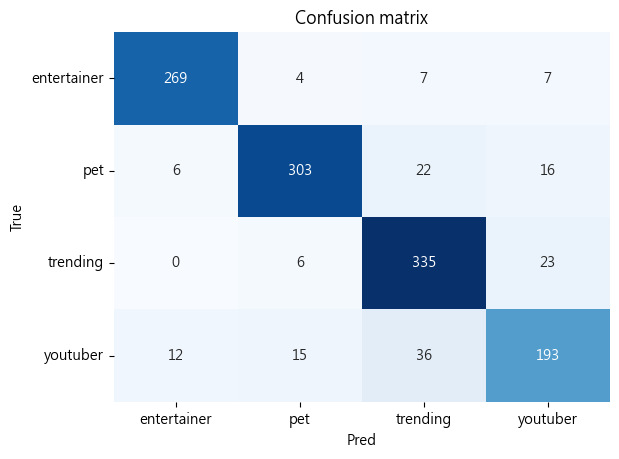

In [ ]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

Èô§‰∫ÜyoutuberÁâà‰ª•Â§ñÂÖ∂‰ªñÂàÜÈ°ûÊïàÊûúÈÉΩ‰∏çÈåØ

### 3.5 TF-IDF

ÊîπË©¶Ë©¶Áúã‰ΩøÁî® TF-IDF ÁöÑ DTM ‰æÜ‰ª£Ë°®ÊñáÁ´†ÔºåË®ìÁ∑¥ÂàÜÈ°ûÊ®°ÂûãÁöÑÊïàÊûú

ÈÄôÈÇä‰ΩøÁî®Âà∞ÁöÑTfidfVectorizer Âíå ‰∏äÈÄ±‰ΩøÁî®Âà∞ÁöÑTfidfTransformerÈÉΩÊòØÁî®‰æÜË®àÁÆóÊñáÊú¨ÁöÑTF-IDFÔºå‰∏çÂêåÁöÑÊòØTfidfTransformerÈÅ©Áî®ÊñºÂ∑≤Á∂ìË®àÁÆóÂ•ΩË©ûÈ†ªÁöÑÊÉÖÊ≥Å„ÄÇ

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
vec_train = vectorizer.fit_transform(X_train)
vec_test = vectorizer.transform(X_test)
vocabulary = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(columns = vocabulary, data = vec_train.toarray())
tfidf_df

‰∏Ä‰∏ã        ‰∏Ä‰∫õ   ‰∏Ä‰ª∂   ‰∏Ä‰Ωç  ‰∏ÄÂÄãÊúà   ‰∏ÄÂêç   ‰∏ÄÂ†Ü   ‰∏ÄÂ†¥   ‰∏ÄÂ§©   ‰∏ÄÂÆö  ...   È¶ñÊ¨°   È¶ñÊ≠å  \
0     0.0  0.056333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2920  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2921  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2922  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2923  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2924  0.0  0.060975  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

       È¶ôÊ∏Ø       ÈßïÈßõ   È©ÖËü≤   È´îÈ©ó   È´òÈõÑ       È∫ªÁÖ©   È∫ªÈ∫ª   ÈªÉÂúã  
0     0.0  0.00000  0.0  0.0  0.0  0.07568  0.0  0.0  
1     0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
2     0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
3     0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
4     0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
...   ...      ...  ...  ...  ...      ...  ...  ...  
2920  0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
2921  0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
2922  0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
2923  0.0  0.00000  0.0  0.0  0.0  0.00000  0.0  0.0  
2924  0.0  0.27635  0.0  0.0  0.0  0.00000  0.0  0.0  

[2925 rows x 1000 columns]

In [ ]:
clf.fit(vec_train, y_train)
y_pred = clf.predict(vec_test)
y_pred_proba = clf.predict_proba(vec_test)

# results
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 entertainer       0.93      0.93      0.93       287
         pet       0.93      0.90      0.91       347
    trending       0.84      0.93      0.88       364
    youtuber       0.85      0.75      0.80       256

    accuracy                           0.88      1254
   macro avg       0.89      0.88      0.88      1254
weighted avg       0.89      0.88      0.88      1254



ÊïàÊûú‰∏ÄÊ®£‰πüÊòØ‰∏çÈåØÔºåyoutuberÁâàÂàÜÊï∏ÊúâÁ®çÂæÆËÆäÈ´ò

### 3.6 CV

Êé•Ëëó‰ªãÁ¥π cross-validation„ÄÇCV Âú®Ê©üÂô®Â≠∏Áøí‰∏≠ÔºåÊòØ‰∏ÄÂÄãÂæàÂ∏∏Áî®‰æÜËÆìÊ®°ÂûãË©ï‰º∞ËÉΩÂ§†ÂæóÂà∞Êõ¥Á©©ÂÆöÁöÑÊï∏ÂÄºÁöÑÊâãÊ≥ï„ÄÇ

* figure1: 

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png"  width="1000">

* figure 2:  

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

source: <https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection>

cross-validation ÊúÉËá™ÂãïÂàáÊàê k ÁµÑ train-test dataset„ÄÇ  
`cross_validate()` ÊúÉÂõûÂÇ≥Á∂ìÈÅé cross-validation ÁöÑÊ®°ÂûãË©ï‰º∞ÁµêÊûú„ÄÇ

In [ ]:
clf = LogisticRegression()
vec_train = TfidfVectorizer(max_features=1000).fit_transform(X_train)

scores = cross_validate(clf, vec_train, y_train, cv=5, scoring=("f1_macro", "recall_macro", "precision_macro"), return_estimator=True)
pprint(scores)

{'estimator': [LogisticRegression(),
               LogisticRegression(),
               LogisticRegression(),
               LogisticRegression(),
               LogisticRegression()],
 'fit_time': array([0.11824012, 0.12343502, 0.10279799, 0.1176672 , 0.10585546]),
 'score_time': array([0.0121243 , 0.01144481, 0.01042128, 0.01044202, 0.00941038]),
 'test_f1_macro': array([0.89584881, 0.89048774, 0.88630976, 0.86536946, 0.87872128]),
 'test_precision_macro': array([0.89980635, 0.89538698, 0.89462791, 0.87140649, 0.88704202]),
 'test_recall_macro': array([0.89260402, 0.88667029, 0.88211896, 0.86085661, 0.87445518])}


`cross_val_predict()` ÂâáÊúÉÂõûÂÇ≥ cv È†êÊ∏¨ÁöÑÈ°ûÂà•„ÄÇ

In [ ]:
y_pred = cross_val_predict(clf, vec_train, y_train, cv=5)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

 entertainer       0.94      0.91      0.93       577
         pet       0.93      0.91      0.92       770
    trending       0.86      0.94      0.90       955
    youtuber       0.82      0.76      0.79       623

    accuracy                           0.89      2925
   macro avg       0.89      0.88      0.88      2925
weighted avg       0.89      0.89      0.89      2925



## 4. ÊØîËºÉ‰∏çÂêåÊ®°ÂûãÊïàÊûú

In [ ]:
# ÂÆöÁæ©Ê®°ÂûãË®ìÁ∑¥ÁµÑÂêà
## pipeline: Ë≥áÊñôËôïÁêÜ vectorizer + ÂàÜÈ°ûÂô® clf
## Áî±Êñº cross-validation ÊúÉËá™ÂãïÂ∞áË≥áÊñôÂàÜÊàê train/testÔºåÂõ†Ê≠§ input Âè™Ë¶ÅÁµ¶ X, y Âç≥ÂèØ

def train_cv(vectorizer, clf, X, y):

    ## train classifier
    vec_X = vectorizer.fit_transform(X).toarray()
    
    ## get cv results
    cv_results = cross_validate(clf, vec_X, y, cv=5, return_estimator=True)
    y_pred = cross_val_predict(clf, vec_X, y, cv=5)
    y_pred_proba = cross_val_predict(clf, vec_X, y, cv=5, method="predict_proba")
    
    ## Accuracy, Precision, Recall, F1-score
    cls_report = classification_report(y, y_pred, output_dict=True)
    print(classification_report(y, y_pred))

    classes = cv_results['estimator'][0].classes_
    
    ## Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(
        xlabel="Pred",
        ylabel="True",
        xticklabels=classes,
        yticklabels=classes,
        title= str(clf) + "Confusion matrix",
    )
    plt.yticks(rotation=0)

    clf.fit(vec_X, y)
    # return the model object
    return cls_report

              precision    recall  f1-score   support

 entertainer       0.94      0.91      0.93       577
         pet       0.93      0.91      0.92       770
    trending       0.86      0.94      0.90       955
    youtuber       0.82      0.76      0.79       623

    accuracy                           0.89      2925
   macro avg       0.89      0.88      0.88      2925
weighted avg       0.89      0.89      0.89      2925



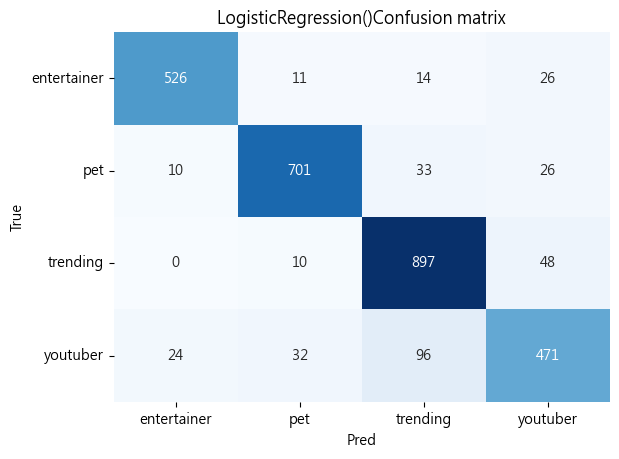

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
clf = LogisticRegression()
result = train_cv(vectorizer, clf, X_train, y_train)

now training: clf_logistic
              precision    recall  f1-score   support

 entertainer       0.94      0.91      0.93       577
         pet       0.93      0.91      0.92       770
    trending       0.86      0.94      0.90       955
    youtuber       0.82      0.76      0.79       623

    accuracy                           0.89      2925
   macro avg       0.89      0.88      0.88      2925
weighted avg       0.89      0.89      0.89      2925

now training: clf_dtree
              precision    recall  f1-score   support

 entertainer       0.84      0.86      0.85       577
         pet       0.74      0.82      0.78       770
    trending       0.81      0.77      0.79       955
    youtuber       0.66      0.61      0.63       623

    accuracy                           0.76      2925
   macro avg       0.76      0.76      0.76      2925
weighted avg       0.76      0.76      0.76      2925

now training: clf_svm
              precision    recall  f1-score   support

 e

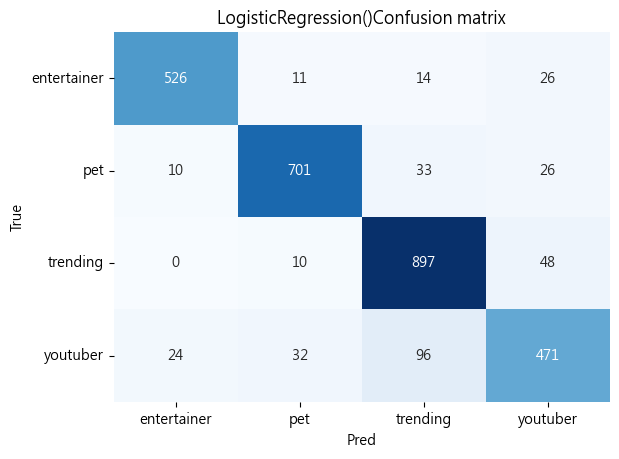

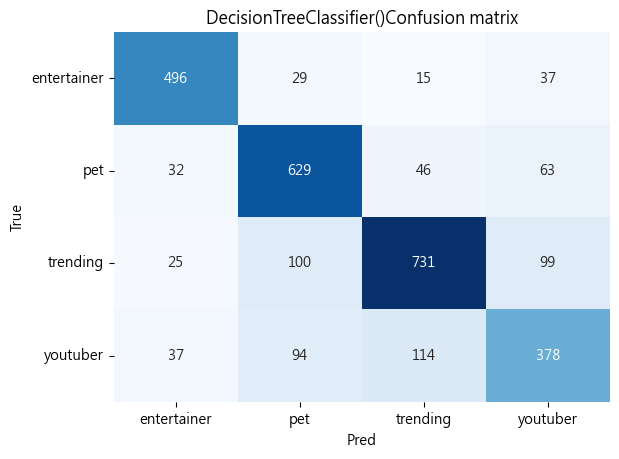

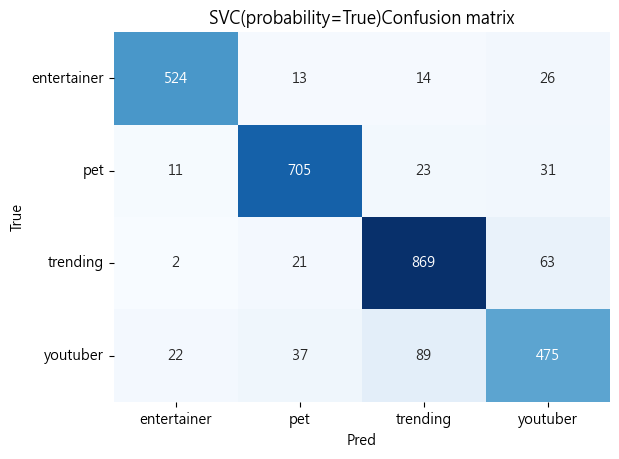

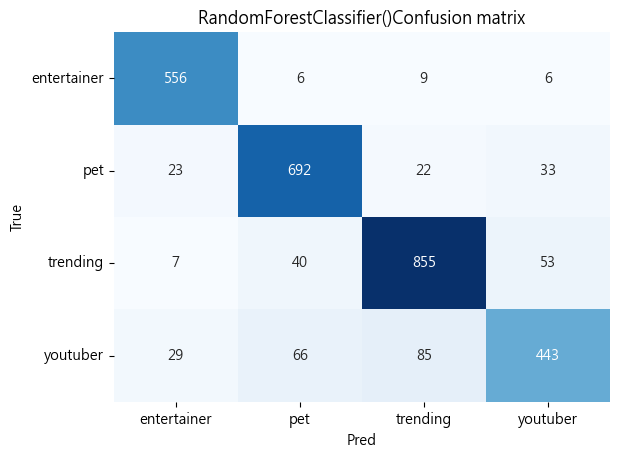

In [ ]:
# Ê∫ñÂÇôË®ìÁ∑¥Ë≥áÊñô
X = data["words"]
y = data["artCatagory"]

# ÊääÊï¥ÂÄãË≥áÊñôÈõÜ‰∏É‰∏âÂàá
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)
# ÂÆöÁæ©Ê®°ÂûãË®ìÁ∑¥ÁµÑÂêà
model_set = dict()
model_set['clf_logistic'] = LogisticRegression()
model_set['clf_dtree'] = DecisionTreeClassifier()
model_set['clf_svm'] = svm.SVC(probability=True) # Ë¶Å‰ΩøÁî®SVMÁöÑpredict_probaÁöÑË©±ÔºåÂøÖÈ†àÂú®Âè´Âá∫SVCÁöÑÊôÇÂÄôÂ∞±Â∞áprobabilityË®≠ÁÇ∫True
model_set['clf_rf'] = RandomForestClassifier()
# ÂÆöÁæ© vectorizer
# vectorizer = CountVectorizer(max_features=1000)
vectorizer = TfidfVectorizer(max_features=1000)
# Â≠òÁµêÊûú
result_set = dict()

for k, model in model_set.items():
    print("="*100)
    print(f"now training: {k}")
    result_set[k] = train_cv(vectorizer, model, X_train, y_train)
    print("="*100)


ÂàÜÂà•ËßÄÂØüÂêÑÂÄãÂàÜÈ°ûÊ®°ÂûãÂú®‰∏çÂêåÈ°ûÂà•ÁöÑË©ï‰º∞ÊåáÊ®ôË°®ÁèæÂ¶Ç‰Ωï

In [ ]:
result_set['clf_logistic']

{'entertainer': {'precision': 0.9392857142857143,
  'recall': 0.9116117850953206,
  'f1-score': 0.9252418645558486,
  'support': 577},
 'pet': {'precision': 0.9297082228116711,
  'recall': 0.9103896103896104,
  'f1-score': 0.9199475065616798,
  'support': 770},
 'trending': {'precision': 0.8625,
  'recall': 0.9392670157068063,
  'f1-score': 0.8992481203007517,
  'support': 955},
 'youtuber': {'precision': 0.8248686514886164,
  'recall': 0.7560192616372392,
  'f1-score': 0.7889447236180905,
  'support': 623},
 'accuracy': 0.8871794871794871,
 'macro avg': {'precision': 0.8890906471465004,
  'recall': 0.8793219182072441,
  'f1-score': 0.8833455537590926,
  'support': 2925},
 'weighted avg': {'precision': 0.8873243960975221,
  'recall': 0.8871794871794871,
  'f1-score': 0.8863311636247886,
  'support': 2925}}

+ ÊâæÂá∫f1-scoreË°®ÁèæÊúÄÂ•ΩÁöÑÊ®°ÂûãÊòØÂì™ÂÄãÔºå‰ΩúÁÇ∫ÊàëÂÄëÊúÄÁµÇÂæóÂà∞ÁöÑÂàÜÈ°ûÂô®

In [ ]:
max = 0
best_model_name = ""
best_model_metric = "f1-score"

## choose max f1-score model from result_set
for k, v in result_set.items():
    if v['weighted avg'][best_model_metric] > max:
        max = v['weighted avg'][best_model_metric]
        best_model_name = k
print(f"best model: {best_model_name}")
pprint(result_set[best_model_name])

best model: clf_logistic
{'accuracy': 0.8871794871794871,
 'entertainer': {'f1-score': 0.9252418645558486,
                 'precision': 0.9392857142857143,
                 'recall': 0.9116117850953206,
                 'support': 577},
 'macro avg': {'f1-score': 0.8833455537590926,
               'precision': 0.8890906471465004,
               'recall': 0.8793219182072441,
               'support': 2925},
 'pet': {'f1-score': 0.9199475065616798,
         'precision': 0.9297082228116711,
         'recall': 0.9103896103896104,
         'support': 770},
 'trending': {'f1-score': 0.8992481203007517,
              'precision': 0.8625,
              'recall': 0.9392670157068063,
              'support': 955},
 'weighted avg': {'f1-score': 0.8863311636247886,
                  'precision': 0.8873243960975221,
                  'recall': 0.8871794871794871,
                  'support': 2925},
 'youtuber': {'f1-score': 0.7889447236180905,
              'precision': 0.8248686514886164,
       

In [ ]:
y_pred = model_set['clf_svm'].predict(vectorizer.transform(X_test).toarray())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 entertainer       0.94      0.93      0.93       287
         pet       0.90      0.91      0.90       347
    trending       0.85      0.91      0.88       364
    youtuber       0.83      0.75      0.79       256

    accuracy                           0.88      1254
   macro avg       0.88      0.87      0.88      1254
weighted avg       0.88      0.88      0.88      1254



In [ ]:
model_set['clf_svm'].predict(vectorizer.transform(["Ëè≤ÂæãË≥ì Â§ßÂ≠∏ Ë¶ÅÊ±Ç Â∏∂Èò≤ ‰ΩúÂºä ÊÜ§ÊÄí ÁöÆÂç°‰∏ò ÂêåÂè∞ Êù±Ê£Æ Êñ∞ËÅû Ëè≤ÂæãË≥ì ‰∏ÄÂêç Â§ßÂ≠∏ÊïôÊéà"]).toarray())

array(['trending'], dtype=object)

* ÊúÄ‰Ω≥ÁöÑ model ÁÇ∫ logistic

## 5. ÂàÜÊûêÂèØËß£ÈáãÊ®°ÂûãÁöÑÁµêÊûú

### 5.1 ÂêÑÂ≠óË©ûÁâπÂæµÁöÑËø¥Ê≠∏‰øÇÊï∏
Â∞çÊñºÁ∑öÊÄßÁöÑÊ®°ÂûãÔºåÂèØ‰ª•ËóâÁî±Áõ∏Èóú‰øÇÊï∏ÔºåÊü•ÁúãË≥áÊñôÁâπÂæµÔºàË©ûÔºâÂ∞çÊñºÂà§Êñ∑ÂàÜÈ°ûÁöÑÂΩ±Èüø
+ Ëø¥Ê≠∏‰øÇÊï∏Ôºàcoefficient estimatesÔºâÂèçÊò†‰∫ÜÊØèÂÄãÁâπÂæµÂ∞çÈ†êÊ∏¨ÁµêÊûúÁöÑÂΩ±ÈüøÁ®ãÂ∫¶ÂíåÊñπÂêë„ÄÇ‚ÄãÁï∂ÂÖ∂‰ªñËÆäÊï∏‰øùÊåÅ‰∏çËÆäÊôÇÔºåÊüê‰∏ÄÁâπÂæµÁöÑÂÄºÂ¢ûÂä†‰∏ÄÂÄãÂñÆ‰ΩçÔºà‰æãÂ¶ÇË©ûÈ†ªÂ¢ûÂä†1ÔºâÔºåÂÖ∂Â∞çÊáâÁöÑËø¥Ê≠∏‰øÇÊï∏Ë°®Á§∫Ë©≤ÁâπÂæµÂ∞ç‰∫ã‰ª∂ÁôºÁîüÊ©üÁéáÁöÑÂΩ±Èüø„ÄÇ
+ Ë®àÁÆóÂæåÂæóÂà∞ÂãùÁÆóÊØîÔºàodds ratioÔºâÔºåÈÄôË°®Á§∫Ë©≤ÁâπÂæµÊØèÂ¢ûÂä†‰∏ÄÂÄãÂñÆ‰ΩçÔºå‰∫ã‰ª∂ÁôºÁîüÁöÑÂãùÁÆóÔºàoddsÔºâÁõ∏Â∞çÊñºÊú™Â¢ûÂä†ÊôÇÁöÑÂÄçÊï∏ËÆäÂåñ„ÄÇ
+ ÈÄôË£°Ëàâlogistic regression + cv tokenizer ÁÇ∫‰æã

In [ ]:
def plot_coef(logistic_reg_model, feature_names, top_n=10):
    # ÈÅ∏Âá∫ÊüêÂÄãÈ°ûÂà•ÁöÑÂâç10Â§ßÂΩ±ÈüøÂäõÂ≠óË©û
    log_odds = logistic_reg_model.coef_.T
    coef_df = pd.DataFrame(
        log_odds, 
        columns=logistic_reg_model.classes_, index=feature_names
    )
    for label in coef_df.columns:
        select_words = (
            coef_df[[label]]
            .sort_values(by=label, ascending=False)
            .iloc[np.r_[0:top_n, -top_n:0]]
        )
        word = select_words.index
        count = select_words[label]
        category_colors = np.where(
            select_words[label] >= 0, "darkseagreen", "rosybrown"
        )  # Ë®≠ÂÆöÈ°èËâ≤

        fig, ax = plt.subplots(figsize=(8, top_n*0.8))  # Ë®≠ÂÆöÁï´Â∏É
        plt.rcParams["axes.unicode_minus"] = False

        ax.barh(word, count, color=category_colors)
        ax.invert_yaxis()
        ax.set_title(
            "Coeff increase/decrease odds ratio of „Äå" + label + "„Äç label the most",
            loc="left",
            size=16,
        )
        ax.set_ylabel("word", size=14)
        ax.set_xlabel("odds ratio", size=14)

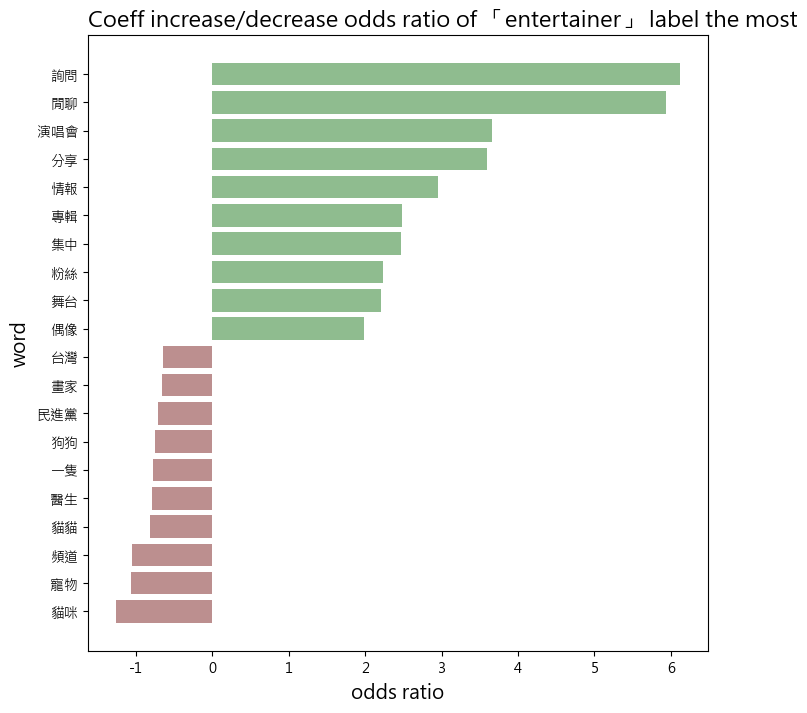

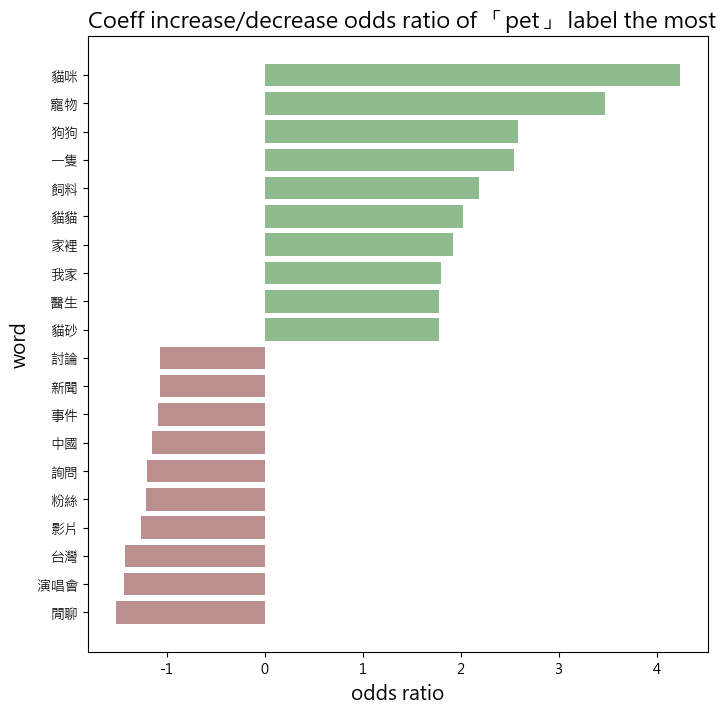

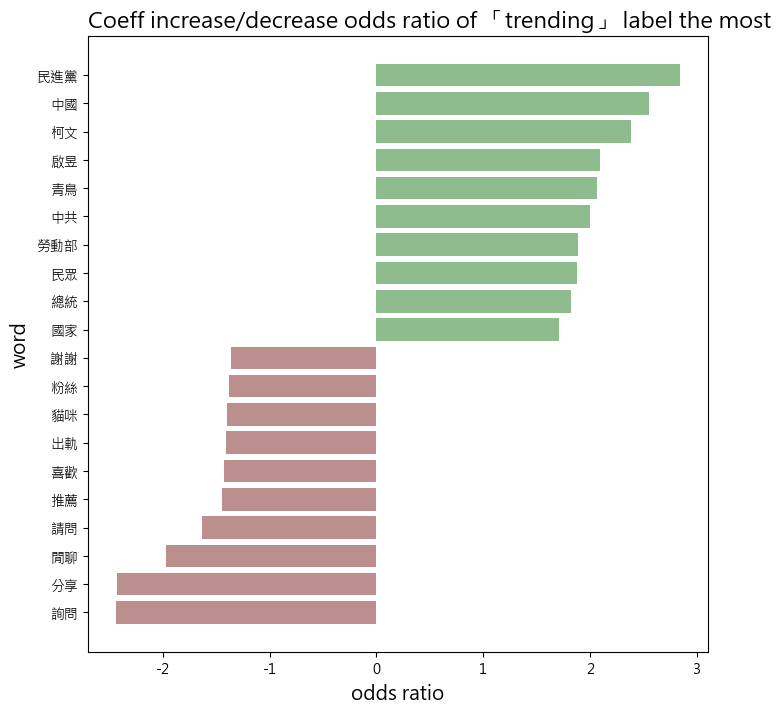

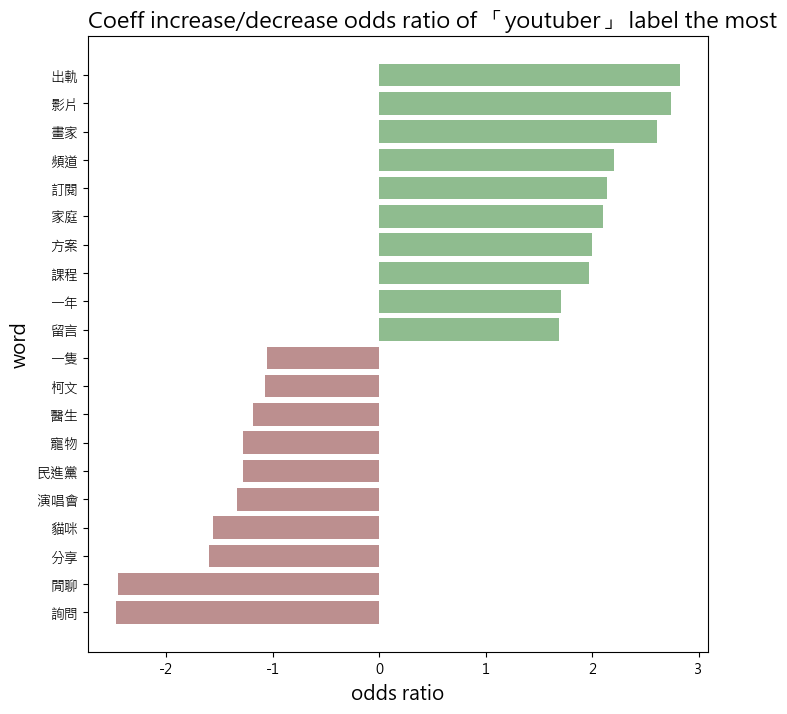

In [ ]:
plot_coef(logistic_reg_model=model_set['clf_logistic'], feature_names=vectorizer.get_feature_names_out(), top_n=10)

„Äåyoutuber„ÄçÈÄôÊÆµÊôÇÈñìÊúâÁï´ÂÆ∂Âá∫Ëªå‰∫ã‰ª∂ÁöÑÈóúÈçµÂ≠ó

## 6. Áî®Ë®ìÁ∑¥Â•ΩÁöÑÂàÜÈ°ûÂô®‰æÜÈ†êÊ∏¨ÂÖ∂‰ªñÂÆ∂ÁöÑÊñ∞ËÅûÈ°ûÂà•

ÊàëÂÄëÂâçÈù¢‰ΩøÁî®ËÅØÂêàÊñ∞ËÅûÁ∂≤ÁöÑË≥áÊñôË®ìÁ∑¥Â•Ω‰∫ÜÂàÜÈ°ûÂô®Ê®°ÂûãÔºåÊé•ËëóÁî®ÂÖ∂‰ªñÂÆ∂Êñ∞ËÅûÁ∂≤ÁöÑË≥áÊñôË©¶Ë©¶ÁúãÂàÜÈ°ûÁöÑÊïàÊûú„ÄÇ

- Ë≥áÊñô‰æÜÊ∫êÔºöDcard
- ÁâàÂà•ÔºöËøΩÊòü„ÄÅÂØµÁâ©„ÄÅÊôÇ‰∫ã„ÄÅYoutuber
- ÊôÇÈñìÁØÑÂúçÔºö2025/03/01 ~ 2025/03/15
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°

In [ ]:
ct = pd.read_csv("./raw_data/new_ËøΩÊòü_ÂØµÁâ©_ÊôÇ‰∫ã_Youtuber.csv")
ct.dropna(inplace=True)
ct

system_id dataSource                                          artUrl  \
0             1      Dcard  https://www.dcard.tw/f/entertainer/p/258136958   
1             2      Dcard  https://www.dcard.tw/f/entertainer/p/258136241   
3             4      Dcard  https://www.dcard.tw/f/entertainer/p/258135669   
4             5      Dcard  https://www.dcard.tw/f/entertainer/p/258138957   
5             6      Dcard  https://www.dcard.tw/f/entertainer/p/258166953   
...         ...        ...                                             ...   
2586        608      Dcard     https://www.dcard.tw/f/youtuber/p/258275206   
2587        609      Dcard     https://www.dcard.tw/f/youtuber/p/258264180   
2588        610      Dcard     https://www.dcard.tw/f/youtuber/p/258263604   
2592        614      Dcard     https://www.dcard.tw/f/youtuber/p/258268143   
2595        617      Dcard     https://www.dcard.tw/f/youtuber/p/258271264   

              artDate                     artTitle  \
0      2025/3/1 08:29               #Ë©¢Âïè K-Flow3ÊºîÂî±ÊúÉ   
1      2025/3/1 06:55  #ÂÖ¨Âëä #ÊèõÁ•® #kflow3 ÊêñÊªæÂçÄÊèõÈÄ£ËôüÂÖ©ÂºµÔºÅÔºÅÔºÅ   
3      2025/3/1 05:46                  #Êñ∞ËÅû ÊñπÂ§ßÂêåËµ∞‰∫ÜÔºüÔºÅ   
4      2025/3/1 12:44        #ÈõÜ‰∏≠Ë®éË´ñ 3/30Âè∞ÂåóÂ†¥Â∞èÂ•≥ÂèãÊºîÂî±ÊúÉÊèõÁ•®   
5      2025/3/4 09:47       #Ë©¢Âïè ‰∏ÄËµ∑ÂéªËÅΩLE SSERAFIMÊºîÂî±ÊúÉ   
...               ...                          ...   
2586  2025/3/15 16:16                  Ë¶ÅÊÄéÈ∫ºÂè™ÊâìÂºµÂÆ∂‰∏çÂÇ∑ÂÆ∂ÂØß   
2587  2025/3/14 12:25           ChatGPTÔºöÂÆ∂ÂØßÂõûÊáâÂøÉËôõÂ∫¶75ÂàÜ   
2588  2025/3/14 11:15    ÂÆ∂ÂØßÂÖ≠ÈªûËÅ≤ÊòéËß£Êûê \ ‰Ω†ÂÄëÊÄéÈ∫ºÁúãÈÄôÂÆ∂‰∫∫ÁöÑËÅ≤Êòé==Ôºü   
2592  2025/3/15 01:22                 ‰∫ãÂØ¶Ë≠âÊòéÊàëÁöÑÊñπÊ≥ïÊòØÊúâÁî®ÁöÑ   
2595  2025/3/15 08:47         ÊâÄ‰ª•AndyËÄÅÂ∏´Ë¥èÂæóÁöÑÁôæËê¨ÂêçËªäÊòØÂì™‰∏ÄÂè∞Ôºü   

                                             artContent  artCatagory  \
0                         ÈªÉ1B-1ÂçÄ5280_1Êéí-19Ëôü\n‰∏ÄÂÄã‰∫∫\nÊúâ‰∫∫Ë¶ÅÂóé!  entertainer   
1     „ÄîÊåÅÊúâ„Äï\nÁ•®ÂÉπ 6680\nÂºµÊï∏ 2\n‰ΩçÁΩÆ ÊêñÊªæC 7xx 9xx\n„ÄîÊÉ≥Êèõ„Äï\nÁ•®ÂÉπ ...  entertainer   
3            \n‰ªäÂ§©Êî∂Âà∞ÈÄôÂâáÈÄöÁü• ÁúüÁöÑÂöáÂà∞\n‰ªñ‰∏çÊòØÈÇÑÂæàÂπ¥ËºïÔºü\n‰∏çË´ñÁúüÂÅá ‰∫∫ÁúüÁöÑË¶ÅÊ¥ªÂú®Áï∂‰∏ãÂïäÔºÅ  entertainer   
4     Âõ†ÁÇ∫ÊéíÁè≠ÂéüÂõ†ÔºåÊàëÊúãÂèã3/30Âè∞ÂåóÂ†¥Â∞èÂ•≥ÂèãÊºîÂî±ÊúÉÊ≤íËæ¶Ê≥ïÂéªÔºåÊâÄ‰ª•ÊÉ≥Êèõ3/23Â†¥ÁöÑÁ•®ÔΩû\n3/30...  entertainer   
5     ÊúâÊ≤íÊúâ‰∫∫Ë¶Å‰∏ÄËµ∑ÂéªËÅΩLE SSERAFIM‰∏ñÂ∑°Âè∞ÂåóÂ†¥ Êú¨‰∫∫ÂæûÂéªÂπ¥Âπ¥Â∫ïÈñãÂßãËøΩÊòü ‰ΩÜÊ≤í‰ªÄÈ∫ºÊúâÂú®ËøΩÊòü...  entertainer   
...                                                 ...          ...   
2586  ÊòØË™™ ÊàëÁúãandyÊãçÁâá Ë™™Â∞çÂÆ∂ÂØßÁöÑÊÑõÊ≤í‰∏ü ÈÇÑÊúâ‰∏Ä‰∫õÁ∂≤Á¥ÖË™™ andyÁßÅÂ∫ï‰∏ã‰πüÊ≤íË™™ÂÆ∂ÂØßÂ£ûË©± Âú®Êãç...     youtuber   
2587  ÂêÑ‰Ωç‰∏çÁî®ÁúãÂõûÊáâ‰∫ÜÔºåÈÉΩÊòØÂ±ÅË©±ü§†\nÈÇÑË¢´GPTÂò¥Ôºö„ÄåÁµ¶‰∫∫‰∏ÄÁ®ÆË©¶ÂúñÊéßÂ†¥‰ΩÜÂ∫ïÊ∞£‰∏çË∂≥ÁöÑÊÑüË¶∫„Äç„ÄÇ\n\n...     youtuber   
2588  ‰∏Ä\nÂõ∫ÂÆöËñ™Ë≥á‰øùÈöúÁîüÊ¥ªÔºåÈÇ£ÊòØË¶ÅÊòØÈ†ªÈÅìÊî∂Áõä‰ΩéÈÅé‰∏ÄÂÄãÈ†êÊúü‰Ω†ÁöÑ‰øùÈöúÊâçÂè´‰øùÈöúÈòøÔºåË¶ÅÊòØÊî∂ÁõäÈ´òÈÅîÂçÉËê¨‰Ω†Áµ¶...     youtuber   
2592  https://www.dcard.tw/f/youtuber/p/258252252?ci...     youtuber   
2595                      Áî±ÊñºÁèæÂú®Â§ßÈÉ®ÂàÜÁöÑËªäÈÉΩÁ†¥Áôæ\nÂ•ΩÂ•áÂïèÂïèAndyË¥èÂæóÁöÑÊòØÂì™Âè∞Ôºü     youtuber   

      commentCount    department gender     school  
0                5    macy394831      F         È¥®„Ñó  
1                0   natalililie      F  nataliewu  
3                1        you222      F       ËçâËéìËõãÁ≥ï  
4                1        hanzos      F     hanzos  
5                2       lil_wff      M          ÂóÑ  
...            ...           ...    ...        ...  
2586            11       milking      M        ÁâõÂ•∂Âë≥  
2587             0        uone26      M         ÊöóËôü  
2588            19  anxietyapple      M         ÁôΩË≤ì  
2592             3        Ê©üÊ¢∞Â∑•Á®ãÂ≠∏Á≥ª      M     ÂúãÁ´ãËÅØÂêàÂ§ßÂ≠∏  
2595             2   rudymankuso      F         ÁõßËø™  

[1467 rows x 11 columns]

In [ ]:
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
ct["artContent"].str.replace("(http|https)://.*", "", regex=True)
ct["artTitle"].str.replace("(http|https)://.*", "", regex=True)
ct["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
ct["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)

# Áïô‰∏ã content
ct["content"] = ct["artTitle"] + ct["artContent"]
ct = ct.loc[:,["content", "artUrl", "artCatagory"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

ct["words"] = ct["content"].apply(getToken).map(" ".join)
ct.head()

content  \
0        #Ë©¢Âïè K-Flow3ÊºîÂî±ÊúÉÈªÉ1B-1ÂçÄ5280_1Êéí-19Ëôü\n‰∏ÄÂÄã‰∫∫\nÊúâ‰∫∫Ë¶ÅÂóé!   
1  #ÂÖ¨Âëä #ÊèõÁ•® #kflow3 ÊêñÊªæÂçÄÊèõÈÄ£ËôüÂÖ©ÂºµÔºÅÔºÅÔºÅ„ÄîÊåÅÊúâ„Äï\nÁ•®ÂÉπ 6680\nÂºµÊï∏ 2...   
3  #Êñ∞ËÅû ÊñπÂ§ßÂêåËµ∞‰∫ÜÔºüÔºÅ\n‰ªäÂ§©Êî∂Âà∞ÈÄôÂâáÈÄöÁü• ÁúüÁöÑÂöáÂà∞\n‰ªñ‰∏çÊòØÈÇÑÂæàÂπ¥ËºïÔºü\n‰∏çË´ñÁúüÂÅá ‰∫∫ÁúüÁöÑ...   
4  #ÈõÜ‰∏≠Ë®éË´ñ 3/30Âè∞ÂåóÂ†¥Â∞èÂ•≥ÂèãÊºîÂî±ÊúÉÊèõÁ•®Âõ†ÁÇ∫ÊéíÁè≠ÂéüÂõ†ÔºåÊàëÊúãÂèã3/30Âè∞ÂåóÂ†¥Â∞èÂ•≥ÂèãÊºîÂî±ÊúÉÊ≤íËæ¶...   
5  #Ë©¢Âïè ‰∏ÄËµ∑ÂéªËÅΩLE SSERAFIMÊºîÂî±ÊúÉÊúâÊ≤íÊúâ‰∫∫Ë¶Å‰∏ÄËµ∑ÂéªËÅΩLE SSERAFIM‰∏ñÂ∑°Âè∞Âåó...   

                                           artUrl  artCatagory  \
0  https://www.dcard.tw/f/entertainer/p/258136958  entertainer   
1  https://www.dcard.tw/f/entertainer/p/258136241  entertainer   
3  https://www.dcard.tw/f/entertainer/p/258135669  entertainer   
4  https://www.dcard.tw/f/entertainer/p/258138957  entertainer   
5  https://www.dcard.tw/f/entertainer/p/258166953  entertainer   

                                               words  
0                         Ë©¢Âïè Flow3 ÊºîÂî±ÊúÉ 1B 5280 19 Êúâ‰∫∫  
1  ÂÖ¨Âëä ÊèõÁ•® kflow3 ÊêñÊªæ ÂçÄÊèõ ÈÄ£Ëôü ÂÖ©Âºµ ÊåÅÊúâ Á•®ÂÉπ 6680 ÂºµÊï∏ ‰ΩçÁΩÆ ÊêñÊªæ 7...  
3                  Êñ∞ËÅû ÊñπÂ§ßÂêå ‰ªäÂ§© Êî∂Âà∞ ÈÄôÂâá ÈÄöÁü• ÁúüÁöÑ Âπ¥Ëºï ÁúüÂÅá ÁúüÁöÑ Ë¶ÅÊ¥ª  
4  ÈõÜ‰∏≠ Ë®éË´ñ 30 Âè∞Âåó Â†¥Â∞è Â•≥Âèã ÊºîÂî±ÊúÉ ÊèõÁ•® ÊéíÁè≠ ÂéüÂõ† ÊúãÂèã 30 Âè∞Âåó Â†¥Â∞è Â•≥Âèã ...  
5  Ë©¢Âïè ‰∏ÄËµ∑ LE SSERAFIM ÊºîÂî±ÊúÉ ÊúâÊ≤íÊúâ ‰∫∫Ë¶Å ‰∏ÄËµ∑ LE SSERAFIM ‰∏ñÂ∑°...

ËßÄÂØü‰∏Ä‰∏ãË≥áÊñôÈõÜÁöÑÂàÜ‰ΩàÁãÄÊ≥Å

In [ ]:
ct['artCatagory'].value_counts()

trending       542
pet            376
entertainer    284
youtuber       265
Name: artCatagory, dtype: int64

In [ ]:
X = ct['words']
y = ct['artCatagory']

y_pred = model_set[best_model_name].predict(vectorizer.transform(X).toarray())
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

 entertainer       0.94      0.89      0.91       284
         pet       0.92      0.89      0.91       376
    trending       0.82      0.95      0.88       542
    youtuber       0.82      0.66      0.73       265

    accuracy                           0.87      1467
   macro avg       0.88      0.85      0.86      1467
weighted avg       0.87      0.87      0.87      1467



youtuberÂàÜÈ°ûË°®Áèæ‰∏çÂ•Ω

Êé•ËëóÈÄ≤‰∏ÄÊ≠•Á†îÁ©∂ÂàÜÈ°ûÁöÑÁµêÊûúÔºåÂòóË©¶ÊâæÂá∫ÂïèÈ°åÁöÑÂéüÂõ†

In [ ]:
ct['pred'] = y_pred
ct.loc[:,['words', 'artCatagory',"pred"]]

words  artCatagory  \
0                            Ë©¢Âïè Flow3 ÊºîÂî±ÊúÉ 1B 5280 19 Êúâ‰∫∫  entertainer   
1     ÂÖ¨Âëä ÊèõÁ•® kflow3 ÊêñÊªæ ÂçÄÊèõ ÈÄ£Ëôü ÂÖ©Âºµ ÊåÅÊúâ Á•®ÂÉπ 6680 ÂºµÊï∏ ‰ΩçÁΩÆ ÊêñÊªæ 7...  entertainer   
3                     Êñ∞ËÅû ÊñπÂ§ßÂêå ‰ªäÂ§© Êî∂Âà∞ ÈÄôÂâá ÈÄöÁü• ÁúüÁöÑ Âπ¥Ëºï ÁúüÂÅá ÁúüÁöÑ Ë¶ÅÊ¥ª  entertainer   
4     ÈõÜ‰∏≠ Ë®éË´ñ 30 Âè∞Âåó Â†¥Â∞è Â•≥Âèã ÊºîÂî±ÊúÉ ÊèõÁ•® ÊéíÁè≠ ÂéüÂõ† ÊúãÂèã 30 Âè∞Âåó Â†¥Â∞è Â•≥Âèã ...  entertainer   
5     Ë©¢Âïè ‰∏ÄËµ∑ LE SSERAFIM ÊºîÂî±ÊúÉ ÊúâÊ≤íÊúâ ‰∫∫Ë¶Å ‰∏ÄËµ∑ LE SSERAFIM ‰∏ñÂ∑°...  entertainer   
...                                                 ...          ...   
2586  ÂºµÂÆ∂ ‰∏çÂÇ∑ ÂÆ∂ÂØß andy ÊãçÁâá Â∞çÂÆ∂ÂØß ÊÑõÊ≤í ‰∏Ä‰∫õ Á∂≤Á¥Ö andy ÁßÅÂ∫ï‰∏ã Ë™™ÂÆ∂ÂØß Â£ûË©± ...     youtuber   
2587  ChatGPT ÂÆ∂ÂØßÂõû ÊáâÂøÉ ËôõÂ∫¶ 75 ‰∏çÁî® ÂõûÊáâ Â±ÅË©± ÈÇÑË¢´ GPT Áµ¶‰∫∫ ‰∏ÄÁ®Æ Ë©¶Âúñ ...     youtuber   
2588  ÂÆ∂ÂØß ÂÖ≠Èªû ËÅ≤Êòé Ëß£Êûê ÈÄôÂÆ∂ ËÅ≤Êòé Âõ∫ÂÆö Ëñ™Ë≥á ‰øùÈöú ÁîüÊ¥ª È†ªÈÅì Êî∂Áõä ‰ΩéÈÅé È†êÊúü ‰øùÈöú ‰øù...     youtuber   
2592  ‰∫ãÂØ¶Ë≠âÊòé ÊñπÊ≥ï ÊúâÁî® https www dcard tw youtuber 2582522...     youtuber   
2595  Andy ËÄÅÂ∏´ Ë¥èÂæó ÁôæËê¨ ÂêçËªä ‰∏ÄÂè∞ ÁèæÂú® Â§ßÈÉ®ÂàÜ ËªäÈÉΩ Á†¥Áôæ Â•ΩÂ•á ÂïèÂïè Andy Ë¥èÂæó Âì™Âè∞     youtuber   

             pred  
0     entertainer  
1     entertainer  
3        trending  
4     entertainer  
5     entertainer  
...           ...  
2586     youtuber  
2587     youtuber  
2588     youtuber  
2592     trending  
2595     youtuber  

[1467 rows x 3 columns]

Â∞áÈåØË™§ÂàÜÈ°ûÁöÑÁµêÊûúÁØ©ÈÅ∏Âá∫‰æÜ

In [ ]:
false_pred = ct.query("artCatagory != pred").loc[:,['words', 'artCatagory',"pred"]]
false_pred

words  artCatagory  \
3                     Êñ∞ËÅû ÊñπÂ§ßÂêå ‰ªäÂ§© Êî∂Âà∞ ÈÄôÂâá ÈÄöÁü• ÁúüÁöÑ Âπ¥Ëºï ÁúüÂÅá ÁúüÁöÑ Ë¶ÅÊ¥ª  entertainer   
55    Êñ∞ËÅû ElonMusk SpaceX Launches Japanese Star Ado ...  entertainer   
62    ÂàÜ‰∫´ 228 ÂéªÂëä ÈªëÂøÉÊ£â 228 Á¥ÄÂøµÊó• Ë≠¶Â±Ä ÈªëÂøÉÊ£â Â∞èÊôÇ Â∞èÊôÇ Á≠âÂæÖ Â∞èÊôÇ Á≠ÜÈåÑ ÈªëÂøÉ...  entertainer   
123   Êñ∞ËÅû Â§ßÈô∏ Âá∫‰∫ã Ê©üÂ†¥ Êé•Ê©ü Â´åËªä Â§™Áàõ ‰∏ãÈáç ÊâãÊ∂â ÊÆ∫‰∫∫ Êú™ÈÅÇ ÁßªÈÄÅ Â§ßÈô∏ Êó•Ââç Êê≠Ê©ü Ëøî...  entertainer   
138   ÊÉÖÂ†± ÈÖçÈÄö Ë©êÈ®ô Ë≥£ÂÆ∂ ÂîÆÂá∫ ÂïÜÂìÅ ‰∏ÄÂÆö Ë≤®Âà∞‰ªòÊ¨æ ËΩâÂ∏≥ ÂåØÊ¨æ ÈªëË≤ì È†ÜË±ê ÈÖçÈÄö ÊúÄËøë Á∂≤Ë∑Ø...  entertainer   
...                                                 ...          ...   
2567  ÈÄÜÈ¢® ÂñúÊ≠° ‰∏ÄÂÑÑ Á™ÆÈ¨º ÁèæÂú® Á≤âÁµ≤ ÁßªÈÅéÂéª ÁÆóÊòØ ÊâãÊÆµ Ë≥áÁî¢ ËΩâÁßª Á∂≤Ë∑Ø ÊïèÊÑüÂ∫¶ ‰ºÅÂäÉ Á¢∫ÂØ¶...     youtuber   
2577  ÂÆ£Â∏É ÊîØÊåÅ andy Êî∂Èå¢ Á∂≤ËªçÊ≤íË¶Å Ë¨õÈÅìÁêÜ È¢®Âêë Â§öÊï∏ Ë™çÁÇ∫ andy ‰∫ãÂØ¶‰∏ä andy ...     youtuber   
2578  Á∂≤Ë∑Ø Èú∏Âáå ÈÅ∏ÊìáÊÄß ÈÅ∫Âøò ÊâÄÊúâ Ëá™‰ª• ÁêÜÊÄß ÊóÅËßÄËÄÖ ‰∏ÄÂ∞Å‰ø° ÈáèÁ¥ö Êñ∞ËÅû Ë®éË´ñ ÂîØ‰∏Ä ÂøÉÂæó Êâì...     youtuber   
2585           ‰∏ÄÈ¶ñ andy ËÄÅÂ∏´ ÊáâÊè¥ https youtu be deYzVXhCUWU     youtuber   
2592  ‰∫ãÂØ¶Ë≠âÊòé ÊñπÊ≥ï ÊúâÁî® https www dcard tw youtuber 2582522...     youtuber   

             pred  
3        trending  
55       trending  
62       trending  
123      trending  
138      trending  
...           ...  
2567     trending  
2577     trending  
2578     trending  
2585  entertainer  
2592     trending  

[193 rows x 3 columns]

ËßÄÂØüÁúãÁúãyoutuberÈ°ûÂà•ÁöÑÊñ∞ËÅûÔºåÊ®°ÂûãÁµ¶Âá∫ÁöÑÂàÜÈ°ûÁµêÊûúÊÄéÈ∫ºÊ®£

In [ ]:
false_pred.loc[false_pred['artCatagory']=='youtuber', :].head(20)

words artCatagory  \
1982  ‰∏≠Âúã ÊìÅÊúâ ‰æøÂÆú ÁâπÊñØÊãâ FSD Âè∞ÁÅ£ https youtu be xTlBgtUWd18...    youtuber   
1987  DD ÊùøÂá≥ ÁàÜÁ±≥Ëä± Ë≤∑Â•Ω ÁúãÁúã ÊúÄËøë ËúúÁìú Ê≠°Ëøé ËÅäÂ§©ÂÆ§ ÂàÜ‰∫´ https www yout...    youtuber   
1988  ÂãæÊÉ° Âπ´‰∏ª ÂãæÊÉ° Âπ´‰∏ª Ë¥è‰∫Ü Êñ∞ËÅû Â∑≤Á∂ì ‰øùÊØç ÂãæÊÉ° Âπ´‰∏ª Ê±ÇÂÑü 100 Ê≥ïÂÆò Âà§ÂãæÊÉ° Âπ´‰∏ª...    youtuber   
1990  Â∑ùÁ≤â ËßíÂ∫¶Áúã ÁæéÁÉè ÊúÉË´á ÁúãÂà∞ Ê©üËªä ÈÄô‰Ωç YouTuber ÂΩ±Áâá ÊèêÂèä Â∑ùÊôÆ Ë¶∫Âæó ËßÄÈªû ...    youtuber   
1991                  ÈÄôÂÆ∂ ÂèñÂñÆ ÁúüÈ¶ô https youtu be OS9UH2ZRk    youtuber   
1995  Â≠∏Ë°ì ÂïèÂç∑ Ê±ÇÂä© Â•ΩÂøÉ‰∫∫ Âπ´Âøô Â°´ÂØ´ Ë´ñÊñá ÂïèÂç∑ ÂïèÂç∑ ÁôæÂÖÉ Á¶ÆÂà∏ ‰∫íÂ°´ ÊäΩÁçé ÂúãÁ´ã ‰∏≠Â§ÆÂ§ß...    youtuber   
1997  Âü∫ÈöÜ Èõ®Ê∏Ø ‰∫å‰∫åÂÖ´ ÈêµÁµ≤ ÈõÜÈ´î ÊããÊµ∑ ‰∏≠ÊñáÂ≠óÂπï https www youtube com ...    youtuber   
1998  Á±≥ÂÖ∂Êûó ‰∏ÄÊòü Ê∏ØÈªû ÊúüÈñì ÈôêÂÆö Ê¥ªÂãï Â•ΩÈÅã ÂêÉÈÅé ÂπæÊ¨° ÁÆóÊòØ ‰∏çÈåØ Ê∏ØÈªû ÂîØ‰∏Ä Ë¶∫Âæó Áæé‰∏≠‰∏ç...    youtuber   
2000  ‰æùÊ∏üÊå∫ È®éÂ£´ ÁèæÂú® Áõ¥Êé• ËÆäÈÉΩ Âì°Â∑• ÁΩ∞Ê¨æ Âì°Â∑• 18 ÂäáÊÉÖ Á¨¨‰∏ÄÈõÜ ÈÇÑÊ∑ö ÊîØÊåÅ Á¨¨‰∫åÁ¥ö ÁΩ∞...    youtuber   
2005  Á∂≤Âèã Áî≥Ë´ã ÂÖ•Â≠∏ Ê∏ÖËèØ ÂæãÂ∏´ ÊûóÊô∫Áæ§ ÊôöÈñì ËáâÊõ∏ ÁôºÊñá Ë°®Á§∫ Á∂≤Âèã Áî≥Ë´ã ÂÖ•Â≠∏ Ê∏ÖËèØ Ë™çÂêå ...    youtuber   
2012  Èô≥Ê∞¥ÊâÅ Ë≥ÄÁìè https youtu be NyATQ1BoYpY si fPIXv9gms...    youtuber   
2014  ÈÄôË∑üËÅ∞ ËÅ∞Êòé Èóú‰øÇ ÈÄôÈ°û ÂΩ±Áâá ÂïèÈ°å ËÄÉÈ©ó Áü•Ë≠ò Ê†πÊú¨ Êô∫ÂïÜ Áõ¥Êé• Èóú‰øÇ Ê∞¥ÈõªÂ∑• ÈÜ´Áîü ÁÆ°Ë∑Ø...    youtuber   
2015  È§®Èï∑ SWAG https youtu be sS slcerw si w1AZVXaq2z...    youtuber   
2019  Ë®±ÂÆ∂ Êï¨ÊÑõ ÂâçËº© ‰∏Ä‰∏ã ÈÅáÂà∞ ‰∫ãÊÉÖ https youtu be abZ B0KUdVE s...    youtuber   
2020  YouTuber ÂøÖÁî® AI Êü•Ë≠â Â∑•ÂÖ∑ ÈÅøÂÖç Ë™™ÈåØ Ë≥áË®ä ‰ø°ÈåØ ÂÅáÊ•≠ÈÖç ‰ªäÂ§© ÂàÜ‰∫´ ÂÖ©ÂÄã ...    youtuber   
2021  Ë≥ÄÁìè Â§úÂ§ú ÂÖàÁü• ÊúÄÊñ∞ ‰∏ÄÊúü Â§úÂ§ú ÁµêÂ∞æ Ë≥ÄÁìè Ë™ûÂá∫È©ö‰∫∫ ‰ª•ÁÇ∫ ÊÆµÂ≠ê Ê≤íÊÉ≥Âà∞ ‰ªäÂ§© ÈÜí‰æÜ Ë≠∑...    youtuber   
2026  Âπ´Â°´ Â≠∏Ë°ì Ë´ñÊñá ÂïèÂç∑ È∫ªÁÖ© ÊúãÂèã ÂçîÂä© Â°´Á≠î ‰∏Ä‰∏ã ÂïèÂç∑ ‰ª•Âà© Ë´ñÊñá ÂÆåÊàê ÊÑüË¨ù Â°´Á≠î ÊôÇ...    youtuber   
2028  Ë≤∑Áãó Ë±™Âì• ÈÇÑÂú® gohttps megapx dcard tw v1 images 0e7...    youtuber   
2034  Âªñ‰∫∫ Âè∏Ê©ü Â§ßÈô∏ Áà∂Ë¶™ https youtu be A1oId2YqhEA si 4scG...    youtuber   
2036  Taption Êé®Âá∫ Âà™Èô§ ÊñáÂ≠ó Ëá™Âãï Ë™øÊï¥ ÊôÇÈñì ÂäüËÉΩ Â≠óÂπï Á∑®ËºØ Êõ¥Âø´ ÈùàÊ¥ª AI ÂΩ±Èü≥...    youtuber   

             pred  
1982     trending  
1987          pet  
1988     trending  
1990     trending  
1991     trending  
1995          pet  
1997     trending  
1998  entertainer  
2000     trending  
2005     trending  
2012     trending  
2014          pet  
2015     trending  
2019     trending  
2020     trending  
2021     trending  
2026          pet  
2028     trending  
2034     trending  
2036     trending

In [ ]:
pprint(false_pred['words'][2020])

('YouTuber ÂøÖÁî® AI Êü•Ë≠â Â∑•ÂÖ∑ ÈÅøÂÖç Ë™™ÈåØ Ë≥áË®ä ‰ø°ÈåØ ÂÅáÊ•≠ÈÖç ‰ªäÂ§© ÂàÜ‰∫´ ÂÖ©ÂÄã ÂØ¶Áî®Â∑•ÂÖ∑ YouTube Â™íÈ´î ÊúÄÊÄï ÁÑ°Èùû Á¨¨‰∏Ä Ë™™ÈåØ ËßÄÁúæ '
 'ÊîªÊìä ÂÖ¨‰ø°Âäõ ÂèóÊêç Á¨¨‰∫å ‰ø°ÈåØ Ê•≠ÈÖç ËÉå‰∏ä Ê≥ïÂæã È¢®Èö™ ÂÖ©ÂÄã ÁóõÈªû ÂàÜÈêò Âä™Âäõ ‰ªòË´∏ÊµÅÊ∞¥ Ë≥†Èå¢ ÂΩ±Èüø ‰∫ãÊ•≠ Ë™™ÈåØ È¢®Èö™ YouTuber ÁÜ±Èªû ÊΩÆÊµÅ '
 'ÊôÇ‰∫ã Êê∂Âø´ ÂæÄÂæÄ Âè™ÊúÉ Á∞°ÂñÆ Google ÂπæÁØá ÊñáÁ´† Ë™çÁÇ∫ Ê∂àÊÅØ ÁúüÁöÑ ÊãçÁâá ÁôºË°®ÊÑèË¶ã Ê∂àÊÅØ Êé®Áøª ÂΩ±Áâá ËÆäÊàê ÈåØË™§ Ë≥áË®ä ‰æÜÊ∫ê ËßÄÁúæ ‰ø°‰ªªÊÑü ‰∏ãÈôç '
 'Âö¥Èáç ËßÄÁúæ Êõ¥ÊúÉ ËàâÂ†± ÂêåË°å ÂÖ¨ÈñãÊâπË©ï ‰ø°Ë≠Ω Ë∞∑Â∫ï Èõ£‰ª• ÁøªË∫´ ‰ø°ÈåØ È¢®Èö™ YouTuber Êé•Ê•≠ÈÖç Ê©üÈóú ‰ºÅÊ•≠ Âêà‰Ωú Á¢∫ÂÆö Â∞çÊñπ ÂèØÈù† Âêà‰ΩúÊñπ Ë©êÈ®ô '
 'ÂïèÈ°å È†ªÈÅì Êãñ‰∏ãÊ∞¥ ÂΩ±Èüø Ê≥ïÂæãË≤¨‰ªª ÁúãÂà∞ Ê°à‰æã ÁêÜË≤° YouTuber ÊäïË≥á Âπ≥Âè∞ Ê•≠ÈÖç ÈÄôÂÆ∂ ÂÖ¨Âè∏ Ë≠âÂØ¶ ÈæêÊ∞è È®ôÂ±Ä ÈÄô‰Ωç YouTuber ËßÄÁúæ '
 'ÁóõÁΩµ Âπ´Âä© È®ôÂ≠ê Â∏∂Ë≤® ÊúÄÁµÇ ÂÖ¨Èñã ÈÅìÊ≠â Ë≠¶Êñπ ÂñùËå∂ È∫ªÁÖ©‰∫ã ‰∏ÄÁ±Æ YouTuber Áü•ÈÅì Ëá™‰øù ÈúÄË¶Å Êü•Ë≠â ÂïèÈ°å Á∂≤‰∏ä Ë≥áË®ä ÁúüÂÅá Ê∑∑Èõú ÊôÇÈñì ÊØîÂ∞ç '

## Á¨¨‰πùÈÄ±Ôºö‰∏ªÈ°åÊ®°ÂûãÔºà‰∏≠ÊñáÔºâ

## 1. Â•ó‰ª∂Ë™™Êòé
Êú¨Ê¨°ÂØ¶‰ΩúÈÅéÁ®ã‰∏≠‰ΩøÁî®Âà∞ÁöÑÁõ∏ÈóúÂ•ó‰ª∂ÔºåÂú®Ë™≤Â†Ç‰∏≠ÊàëÂÄëÂ∞áÊúÉÁ∞°ÂñÆÁöÑÂ±ïÁ§∫ÈÄô‰∫õÂ•ó‰ª∂ÁöÑ‰ΩøÁî®ÊñπÂºèÔºåÈóúÊñºÂêÑÂÄãÂ•ó‰ª∂ÁöÑÈÄ≤Èöé‰ΩøÁî®Ë´ãÂêåÂ≠∏ÂèÉÁÖßÂÖ∂ÂÆòÁ∂≤ÁöÑË™™Êòé„ÄÇ
+ gensim: ‰∏ªÈ°åÊ®°ÂûãÂáΩÂºèÂ∫´
+ pyLDAvis: ‰∫íÂãïÂºèLDAË¶ñË¶∫ÂåñÂ•ó‰ª∂

In [ ]:
import time 
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #‰ΩøÂúñ‰∏≠‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus'] = False #‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫

## 2. Ë≥áÊñôÂâçËôïÁêÜ

In [ ]:
udn = pd.read_csv("raw_data/ËøΩÊòü_ÂØµÁâ©_ÊôÇ‰∫ã_Youtuber.csv")  # ÂåØË≥áÊñô
udn.head(3)

system_id dataSource                                          artUrl  \
0          1      Dcard  https://www.dcard.tw/f/entertainer/p/257328269   
1          2      Dcard  https://www.dcard.tw/f/entertainer/p/257344585   
2          3      Dcard  https://www.dcard.tw/f/entertainer/p/257329787   

            artDate               artTitle  \
0  2024/11/25 04:51  #ÂàÜ‰∫´ Â§öÊ¨æÊµÆË™áÂ•ΩÊãçÁÖßÊãøÈ£ØÊííÊáâÊè¥ÊâáÂàÜ‰∫´‚ô°‚ô°   
1  2024/11/27 00:25   #ÂàÜ‰∫´ 2024MAMAÔºçYEONJUN   
2  2024/11/25 08:02          #ÈñíËÅä B.A.PÁ≤âÁµ≤Á§æÁæ§   

                                          artContent  artCatagory  \
0  ÁöÜ„Åï„Çì„ÄÅ„Åì„Çì„Å´„Å°„ÅØüíõ‰∫åÂÆÆÂ§™Â§™„Åß„Åô·ôèÃ§Ã´Õö ‚ô°„Çõ\n\nÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏!!\nÊúÄËøë...  entertainer   
1   https://youtu.be/hXPpqsFIGJw?si=dYUOE4gMoet8LG9d  entertainer   
2  BJYM BANG&JUNG&YOO&MOON‚ù§Ô∏è‚ù§Ô∏è\n\n\n\nÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•„ÄåÏö∞Î¶¨ ...  entertainer   

   commentCount   department gender school  
0             0        jmimi      F  ‰∫åÂÆÆÂ§™Â§™üíõ  
1             0    lin_10_72      F  ü©µÏïàÏã¨Ïö∞ü©∑  
2             0  cathy051289      F  Ê∑®Ê∑®ÂæàÂÆâÈùú

In [ ]:
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["artContent"] = udn["artContent"].str.replace("(http|https)://.*", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("(http|https)://.*", "", regex=True)
udn["artContent"] = udn["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn['artDate'] = pd.to_datetime(udn['artDate'])
udn['content'] = udn['artContent']


udn = udn.loc[:,["content", "artUrl", "artCatagory", 'artDate']]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê
udn.head(3)

content  \
0  ÁöÜ‰∫åÂÆÆÂ§™Â§™ÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏ÊúÄËøëÂõ†ÁÇ∫Êé•ÂñÆÂÅö‰∫ÜÂ•ΩÂπæÊääÊâáÂ≠êÂÅöÂÆåÁöÑÂøÉÂæóÊòØ‰πãÂâçÂÅöÁöÑ‰πüÂ§™ÈÜú‰∫ÜÂêß...   
1                                                      
2                                 ÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•Ë´ãÈªûÈÅ∏‰ª•‰∏ãÈÄ£ÁµêÂä†ÂÖ•Á§æÁæ§   

                                           artUrl  artCatagory  \
0  https://www.dcard.tw/f/entertainer/p/257328269  entertainer   
1  https://www.dcard.tw/f/entertainer/p/257344585  entertainer   
2  https://www.dcard.tw/f/entertainer/p/257329787  entertainer   

              artDate  
0 2024-11-25 04:51:00  
1 2024-11-27 00:25:00  
2 2024-11-25 08:02:00

In [ ]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# Êñ∞Â¢ûstopwords
# jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

# ÁØ©ÈÅ∏Êéâ content ÁÇ∫Á©∫ÂÄºÊàñÁ©∫ÁôΩÁöÑË≥áÊñô
udn = udn.dropna(subset=["content"])
udn["words"] = udn["content"].apply(getToken)
udn.head()

Building prefix dict from C:\Users\acer\OneDrive\Ê°åÈù¢\Á¢©Â£´Ë≥áÊñô\Á§æÁæ§Â™íÈ´îÂàÜÊûê\week09\dict\dict.txt.big ...
2025-04-16 17:08:08,847 : DEBUG : Building prefix dict from C:\Users\acer\OneDrive\Ê°åÈù¢\Á¢©Â£´Ë≥áÊñô\Á§æÁæ§Â™íÈ´îÂàÜÊûê\week09\dict\dict.txt.big ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.u7a7ff214be0bd343b4244b61b9336a3f.cache
2025-04-16 17:08:08,856 : DEBUG : Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.u7a7ff214be0bd343b4244b61b9336a3f.cache
Loading model cost 3.345 seconds.
2025-04-16 17:08:12,198 : DEBUG : Loading model cost 3.345 seconds.
Prefix dict has been built successfully.
2025-04-16 17:08:12,200 : DEBUG : Prefix dict has been built successfully.


content  \
0  ÁöÜ‰∫åÂÆÆÂ§™Â§™ÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏ÊúÄËøëÂõ†ÁÇ∫Êé•ÂñÆÂÅö‰∫ÜÂ•ΩÂπæÊääÊâáÂ≠êÂÅöÂÆåÁöÑÂøÉÂæóÊòØ‰πãÂâçÂÅöÁöÑ‰πüÂ§™ÈÜú‰∫ÜÂêß...   
1                                                      
2                                 ÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•Ë´ãÈªûÈÅ∏‰ª•‰∏ãÈÄ£ÁµêÂä†ÂÖ•Á§æÁæ§   
3                                                 ËàûÂè∞   
4  ÊÉ≥Áü•ÈÅìÈÄôË£°ÁöÑ‰∫∫ÊúâÁúãÈÅéÊºîÂî±ÊúÉÁöÑ‰∫∫Ë≤∑ÈªÉÁâõÁ•®ÁöÑÊØî‰æãÊàëËá™Â∑±ÊòØÊ≤íÊúâÈÉΩÈù†ÊúãÂèãÂà∑Á•®ÁúüÁöÑÊ≤íÊúâÁ•®ÁöÑË©±Â∞±Ë™çÂëΩ‰∏çÂéª...   

                                           artUrl  artCatagory  \
0  https://www.dcard.tw/f/entertainer/p/257328269  entertainer   
1  https://www.dcard.tw/f/entertainer/p/257344585  entertainer   
2  https://www.dcard.tw/f/entertainer/p/257329787  entertainer   
3  https://www.dcard.tw/f/entertainer/p/257330597  entertainer   
4  https://www.dcard.tw/f/entertainer/p/257334902  entertainer   

              artDate                                              words  
0 2024-11-25 04:51:00  [‰∫åÂÆÆ, Â§™Â§™, Èô£Â≠ê, ÂàÜ‰∫´, ÊáâÊè¥, ÊïôÂ≠∏, ÊúÄËøë, Êé•ÂñÆ, Â•ΩÂπæÊää, ÊâáÂ≠ê, ÂøÉÂæó, ...  
1 2024-11-27 00:25:00                                                 []  
2 2024-11-25 08:02:00                       [ÈÇÄË´ã, Âä†ÂÖ•, ÈªûÈÅ∏, ‰ª•‰∏ã, ÈÄ£Áµê, Âä†ÂÖ•, Á§æÁæ§]  
3 2024-11-25 09:37:00                                               [ËàûÂè∞]  
4 2024-11-25 17:46:00  [Áü•ÈÅì, ÈÄôË£°, ÁúãÈÅé, ÊºîÂî±ÊúÉ, ÈªÉÁâõÁ•®, ÊØî‰æã, ÊúãÂèã, Âà∑Á•®, ÁúüÁöÑ, Ë™çÂëΩ, ‰∏çÂéª,...

## 4. LDA ‰∏ªÈ°åÊ®°Âûã
Latent Dirichlet allocation Á∞°Á®± LDAÔºåÊòØ‰∏ÄÁ®Æ‰∏ªÈ°åÊ®°ÂûãÔºå‰ªñÂèØ‰ª•Â∞áË≥áÊñôÈõÜ‰∏≠ÊØèÁØáÊñáÊ™îÁöÑ‰∏ªÈ°åÊåâÁÖßÊ©üÁéáÂàÜ‰ΩàÔºå‰ªñÊòØÁÑ°Áõ£Áù£Â≠∏ÁøíÊ≥ïÔºåË®ìÁ∑¥ÊôÇ‰∏çÈúÄË¶ÅÊâãÂãïÊ®ôË®ªÔºåÂè™ÈúÄË¶ÅÁµ¶ÊñáÊ™îÈõÜ„ÄÅ‰∏ªÈ°åÊï∏Ôºå‰πüÂèØ‰ª•Ê†πÊìö‰∏Ä‰∫õÂèÉÊï∏(alpha„ÄÅBeta)‰æÜÊîπËÆäÊ®°ÂûãË®ìÁ∑¥ÁöÑÁµêÊûúÔºå‰ª•‰∏ã‰ΩøÁî® gensim Â•ó‰ª∂‰æÜÁ§∫ÁØÑÂ¶Ç‰ΩïË®ìÁ∑¥ LDA Ê®°Âûã„ÄÇ

Á∞°ÂñÆÁöÑÁØÑ‰æãË™™Êòé `gensim` bag of word ÁöÑÊñπÂºè

### **4.1 Ê≠£ÂºèËôïÁêÜË≥áÊñô**

Â∞áÊñ∑Ë©ûÂæåÁöÑ`doc['words']`ËΩâÊèõÊàêlist

In [ ]:
docs = udn['words'].to_list()
docs[0]

['‰∫åÂÆÆ',
 'Â§™Â§™',
 'Èô£Â≠ê',
 'ÂàÜ‰∫´',
 'ÊáâÊè¥',
 'ÊïôÂ≠∏',
 'ÊúÄËøë',
 'Êé•ÂñÆ',
 'Â•ΩÂπæÊää',
 'ÊâáÂ≠ê',
 'ÂøÉÂæó',
 '‰πãÂâç',
 'Â§™ÈÜú',
 'ÊØîËºÉ',
 'ÂøÉÂæó',
 'ÊâæÂà∞',
 '‰πãÂâç',
 'ÈÇÑË¶Å',
 'Âø´ÈÄü',
 'ÊñπÊ≥ï',
 'Êúâ‰∫∫',
 'ÂÜç‰æÜ',
 'ÂàÜ‰∫´',
 '‰ª•‰∏ã',
 'ÊáâÊè¥',
 'ÊäÑË•≤',
 'ÊòüÈáé',
 'ÊÑõÈÄôÊòØ',
 'Á¨¨‰∏ÄÊ¨°',
 'ÁÖßÁâá',
 'ÊâáÂ≠ê',
 'ÁÖßÁâá',
 'Â§ßÂ∞è',
 'ÁúüÁöÑ',
 'ÊàêÂäü',
 'ÈÄôÊää',
 '‰∏äÂâç',
 'ÂÖ©Âêç',
 'ÂñúÊ≠°',
 'È°èËâ≤',
 'Á≤âËâ≤',
 'Êê≠ÈÖç',
 'Â∞èÁÜä',
 'ÂñúÊ≠°',
 'Áî®Á≤â',
 'ÈÖçËâ≤',
 'ÊØõÁµ®',
 'Áé©ÂÅ∂',
 'Êê≠ÈÖç',
 'ÊØõÁµ®',
 'Â∞èÁÜä',
 'Â§ñÂúà',
 'ÁèçÁè†',
 'ÊôÇÈñì',
 'ÈªèÂÆå',
 'ÁèçÁè†',
 'Ê™¢Ë®é',
 'ÁèçÁè†',
 'ÂÉπÊ†º',
 'ÊÑõÂøÉ',
 'ÊØõÁµ®Áµ®',
 '‰∏äÈù¢',
 '‰∏Ä‰Ωç',
 'ÂÆ¢‰∫∫',
 'Â†¥ÂÖß',
 'Â∑¶Âè≥',
 '‰∏ÄËµ∑',
 '‰ΩøÁî®',
 'ÂΩàÂäõ',
 'ËïæÁµ≤',
 'Êï¥Êää',
 'Á∂†Ëâ≤',
 'ÈÖçËâ≤',
 '‰∏ÄÈªûÈªû',
 'ÁôΩËâ≤',
 'ÈªûÁ∂¥',
 'Èßø‰Ωë',
 'Â∞èÁãóÁãó',
 'Êï¥Êää',
 'Á≤âÁ¥ÖËâ≤',
 'ÈÖçËâ≤',
 'ÁãóÁãó',
 'ËÄ≥Êúµ',
 'Êê≠ÈÖç',
 'ÁãóÁãó',
 'Áé©ÂÅ∂',
 'Êê≠ÈÖç',
 '‰∏ã‰æÜ',
 'Ë∂ÖÁ¥ö',


Âª∫Á´ã‰∏¶ÈÅéÊøæË©ûÂΩôË°®ÔºàdictionaryÔºâÔºåÂè™‰øùÁïôÁâπÂÆöÊ¢ù‰ª∂ÁöÑË©ûÂΩô

In [ ]:
dictionary = Dictionary(docs)

dictionary.filter_extremes(no_below=5, no_above=0.99)
print(dictionary)

2025-04-16 17:08:42,106 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-04-16 17:08:42,854 : INFO : built Dictionary<46814 unique tokens: ['‰∏Ä‰∫õ', '‰∏Ä‰Ωç', '‰∏ÄËµ∑', '‰∏ÄÈªû', '‰∏ÄÈªûÈªû']...> from 4179 documents (total 305429 corpus positions)
2025-04-16 17:08:42,856 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<46814 unique tokens: ['‰∏Ä‰∫õ', '‰∏Ä‰Ωç', '‰∏ÄËµ∑', '‰∏ÄÈªû', '‰∏ÄÈªûÈªû']...> from 4179 documents (total 305429 corpus positions)", 'datetime': '2025-04-16T17:08:42.856112', 'gensim': '4.3.3', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-04-16 17:08:42,949 : INFO : discarding 39121 tokens: [('‰∏âÁßí', 2), ('‰∫åÂÆÆ', 1), ('‰∫ÆÈßø', 1), ('‰ª•Á∂†ÈªÉ', 1), ('ÂåóÊµ∑ÈÅì', 2), ('ÂèçÂÖâ', 3), ('Âè∞ÁÅ£Ââç', 1), ('ÂêçÁâå', 3), ('Âê∏ÂèñÁ∂ìÈ©ó', 1), ('ÂñÆË™ø', 3)]...
2025-04-16 17:08:42,951 : INFO : keeping 7693 tokens which were in no 

Dictionary<7693 unique tokens: ['‰∏Ä‰∫õ', '‰∏Ä‰Ωç', '‰∏ÄËµ∑', '‰∏ÄÈªû', '‰∏ÄÈªûÈªû']...>


ÂèÉÊï∏Ë™™ÊòéÔºö
- no_below=5	Âá∫ÁèæÂú®Â∞ëÊñº 5 ÁØáÊñáÁ´†‰∏≠ÁöÑË©ûÊúÉË¢´ÁßªÈô§
- no_above=0.99	Âá∫ÁèæÂú®Ë∂ÖÈÅé 99% Êñá‰ª∂‰∏≠ÁöÑË©ûÊúÉË¢´ÁßªÈô§

In [ ]:
for idx, (k, v) in enumerate(dictionary.token2id.items()):
    print(f"{k}: {v}")
    if idx > 10:
        break

‰∏Ä‰∫õ: 0
‰∏Ä‰Ωç: 1
‰∏ÄËµ∑: 2
‰∏ÄÈªû: 3
‰∏ÄÈªûÈªû: 4
‰∏äÂâç: 5
‰∏äÈù¢: 6
‰∏ã‰æÜ: 7
‰∏çÂèØ: 8
‰∏çÊé•: 9
‰∏ªË¶Å: 10
‰πãÂâç: 11


Â∞áÊñ∑Ë©ûÁµêÊûúÂª∫ÊßãË™ûÊñôÂ∫´(corpus)‰πãÂæåÔºåÂà©Áî®Ë™ûÊñôÂ∫´ÊääÊØèÁØáÊñáÁ´†Êï∏Â≠óÂåñ„ÄÇ<br>
ÊØèÂÄãË©ûÂΩôÈÉΩË¢´Ë≥¶‰∫à‰∏ÄÂÄã ID ÂèäÈ†ªÁéá(word_idÔºåword_frequency)„ÄÇ<br>

Ëàâ‰æã‰æÜË™™Ôºö<br>
Á¨¨‰∏ÄÁØáÊñáÁ´†Êï∏Â≠óÂåñÁµêÊûúÁÇ∫Ôºöcorpus[600]:[(2, 2), (6, 1), (20, 2), .... ]Ôºåelement ÁÇ∫ÊñáÁ´†‰∏≠ÊØèÂÄãË©ûÂΩôÁöÑ id ÂíåÈ†ªÁéá„ÄÇ<br>
‰ª£Ë°®Ôºö'‰∏ñÁïå'Âá∫Áèæ2Ê¨°„ÄÅ'‰πãÊà∞'Âá∫Áèæ‰∏ÄÊ¨°...‰ª•Ê≠§È°ûÊé®

In [ ]:
pprint(" ".join(udn['words'].iloc[600]))

('Á¢∫ÂÆö ÊúâÊ≤íÊúâ Ê¥ªÂãï Ê∞¥Ëàû Âª£Â†¥ ËàâËæ¶ Ê∞∏Ë±ê ÁôæÂπ¥ Â±ïË¶Ω Ê¥ªÂãï ÂÆâÊéí Ê≠åÊâã ÊºîÂá∫ ÂêçÂñÆ ÈÇÑÊªø ‰∫ÆÁúº ÂíñÂæê‰Ω≥Áë© ÈüãÁ¶ÆÂÆâ ËâæÊÄ°ËâØ ÂàÜÂà• Êìî‰ªª ‰∏âÂ§© Â£ìÂè∞ ÂâõÊîª '
 'ÂÆåÂ∞è Â∑®Ëõã ÊúÄËøë Ë°åÁ®ã ÊªøÊ™î ÂÖàÁîü ‰ªäÂπ¥ ÈáëÊõ≤ Ê≠åÂêé Â≠´ÁõõÂ∏å Ê£íÊ£íÁ≥ñ Â∞èÁÖúÊ¢Å ÊñáÈü≥ Êùé‰Ω≥Ê≠° ÊÑüË¶∫ Â•ΩÂÉè Â∑≤Á∂ì Âæà‰πÖÊ≤í ÁúãÂà∞ Â§öÂ§ß ÂêåÂè∞ ÊúâÊ≤íÊúâ ÊúÄÊÉ≥ '
 'Âì™Â†¥ ÊØèÂ†¥ ‰∏ÄÊ¨° Â•ΩËÅΩ ÂìàÂìàÂìà')


Á¨¨600ÁØáÊñáÁ´†ÁöÑÂâçÂçÅÂÄãË©ûÂΩôÁöÑË™ûÊñôÂ∫´IDÂíåÈ†ªÁéá

In [ ]:
dictionary.doc2bow(udn['words'].iloc[600])[:10]

[(47, 1),
 (76, 1),
 (186, 1),
 (209, 1),
 (236, 2),
 (254, 1),
 (343, 2),
 (368, 1),
 (492, 1),
 (522, 1)]

#### Â∞ádocsËΩâÊèõÊàêBOWÂΩ¢Âºè
- ÊääÊØèÁØáÊñá‰ª∂ÁöÑ token list ËΩâÊèõÊàê‰∏ÄÁµÑ (token_id, count) ÁöÑ list

In [ ]:
# Âª∫Á´ã Bag-of-words ‰ΩúÁÇ∫ÊñáÁ´†ÁöÑÁâπÂæµË°®Á§∫
# Áî® gensim ldamodel input ÈúÄË¶ÅÂ∞áÊñáÁ´†ËΩâÊèõÊàê bag of words 
corpus = [dictionary.doc2bow(doc) for doc in docs]

### **4.2 ÈñãÂßãË®ìÁ∑¥ LDA topic model**

+ ÂèÉÊï∏Ë™™ÊòéÔºö
    + corpus = ÊñáÊ™îË™ûÊñôÂ∫´
    + id2word = Ë©ûÂΩôÂ≠óÂÖ∏
    + num_topics = ÁîüÊàêÂπæÂÄã‰∏ªÈ°åÊï∏
    + random_state = Âõ∫ÂÆö‰∫ÇÊï∏ÂÄºÔºåÊØèÊ¨°ÁöÑÊ®°ÂûãÁµêÊûúÊúÉ‰∏ÄÊ®£
    + iteration = ÊØèÂÄãÊñáÁ´†Ë®ìÁ∑¥ÁöÑÊ¨°Êï∏ÔºåÂèØ‰ª•Ë®≠ÂÆöÈ´ò‰∏ÄÈªûËÆìÊ®°ÂûãÊî∂ÊñÇ
    + passes(epoch) = Êï¥ÂÄã corpus Ë®ìÁ∑¥Ê®°ÂûãÁöÑÊ¨°Êï∏
    + alpha = ÊñáÁ´†‰∏ªÈ°åÂàÜ‰Ωà
    + eta = ‰∏ªÈ°åÂ≠óÂàÜ‰Ωà

Ê®°ÂûãÂèÉÊï∏Ê≤íÊúâ‰∏ÄÂÄãÁµïÂ∞çÁöÑÁ≠îÊ°àÔºåÂêåÂ≠∏ÂÄëÊáâË©≤**‰ΩøÁî®Áõ∏ÂêåÁöÑË≥áÊñô**ÔºåÂòóË©¶ÂÅöÂèÉÊï∏‰∏äÁöÑË™øÊï¥ÔºåÈÄ≤ËÄåÊØîËºÉÂá∫ËºÉ‰Ω≥ÁöÑÊ®°ÂûãÁµêÊûú„ÄÇ

In [ ]:
ldamodel = LdaModel(
    corpus=corpus, 
    id2word=dictionary, # Â≠óÂÖ∏
    num_topics=10, # ÁîüÊàêÂπæÂÄã‰∏ªÈ°åÊï∏
    random_state=2024, # ‰∫ÇÊï∏
)

2025-04-16 17:08:43,504 : INFO : using symmetric alpha at 0.1
2025-04-16 17:08:43,507 : INFO : using symmetric eta at 0.1
2025-04-16 17:08:43,514 : INFO : using serial LDA version on this node
2025-04-16 17:08:43,537 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 4179 documents, updating model once every 2000 documents, evaluating perplexity every 4179 documents, iterating 50x with a convergence threshold of 0.001000
2025-04-16 17:08:43,539 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2025-04-16 17:08:43,541 : INFO : PROGRESS: pass 0, at document #2000/4179
2025-04-16 17:08:45,968 : INFO : merging changes from 2000 documents into a model of 4179 documents
2025-04-16 17:08:45,985 : INFO : topic #8 (0.100): 0.016*"Ë≤ìÂí™" + 0.012*"ÁúüÁöÑ" + 0.008*"Áü•ÈÅì" + 0.006*"ÁõÆÂâç" + 0.006*"Ë¶∫Âæó" + 0.005*"ÈÜ´Áîü" + 0.005*"ÊØîËºÉ" + 0.005*"ÁúãÂà∞" + 0.005*"Â

### **4.3 Êü•Áúã LDA ‰∏ªÈ°å‰ª£Ë°®Â≠ó** <br>

Áï∂ LDA Ê®°ÂûãË®ìÁ∑¥Â•Ω‰πãÂæåÔºåÊàëÂÄëÂèØ‰ª•Êü•ÁúãÊØèÂÄã‰∏ªÈ°åÁöÑÂñÆË©ûÂàÜ‰Ωà„ÄÇ<br>
num_words = ÈÅ∏ÊìáË¶ÅÊü•ÁúãÊØèÂÄã‰∏ªÈ°åÂâçÂπæÂÄãÂ≠ó„ÄÇ<br>

Ëàâ‰æã‰æÜË™™Ôºö<br>
`'0.020*"Á∂ìÂÖ∏Ë≥Ω" + 0.014*"‰∏≠ËèØÈöä" + 0.011*"‰ªäÂ§©" + 0.009*"ÊØîË≥Ω" + 0.009*"Êó•Êú¨" + 0.007*"Ê£íÁêÉ" + 0.007*"‰∏ñÁïå" + 0.007*"ÊäïÊâã" + 0.006*"ÂÖàÁôº" + 0.005*"ÁêÉÈöä"'`  

In [ ]:
ldamodel.print_topics()

2025-04-16 17:08:48,392 : INFO : topic #0 (0.100): 0.031*"Áï´ÂÆ∂" + 0.018*"ÂΩ±Áâá" + 0.013*"Áü•ÈÅì" + 0.013*"Ë¶∫Âæó" + 0.009*"ÁúüÁöÑ" + 0.008*"ÊÑüË¶∫" + 0.007*"Â∑≤Á∂ì" + 0.007*"ÁæéÂúã" + 0.007*"ÁèæÂú®" + 0.006*"ÁúãÂà∞"
2025-04-16 17:08:48,397 : INFO : topic #1 (0.100): 0.011*"Âá∫Ëªå" + 0.009*"ÁúüÁöÑ" + 0.008*"Ë¶∫Âæó" + 0.007*"‰∏≠ÂÖ±" + 0.007*"ÁèæÂú®" + 0.007*"Áü•ÈÅì" + 0.005*"Ë°®Á§∫" + 0.005*"Âè∞ÁÅ£" + 0.005*"ÊáâË©≤" + 0.005*"Ë™çÁÇ∫"
2025-04-16 17:08:48,403 : INFO : topic #2 (0.100): 0.015*"Â§´Â¶ª" + 0.010*"ÊñπÊ°à" + 0.010*"ÂÆ∂Â∫≠" + 0.009*"Â∞èÂ≠©" + 0.008*"ÁúãÂà∞" + 0.007*"ÁèæÂú®" + 0.007*"Ë´ãÂïè" + 0.007*"‰πãÂâç" + 0.006*"‰∏ÄÂπ¥" + 0.006*"ÂïèÈ°å"
2025-04-16 17:08:48,406 : INFO : topic #3 (0.100): 0.009*"ÈÅäÊà≤" + 0.007*"ÁúüÁöÑ" + 0.006*"Èü≥Ê®Ç" + 0.006*"Ë¶∫Âæó" + 0.006*"ÁúãÂà∞" + 0.005*"ÊáâË©≤" + 0.005*"Âè∞ÁÅ£" + 0.004*"Áõ¥Êí≠" + 0.004*"Â∏åÊúõ" + 0.004*"Áü•ÈÅì"
2025-04-16 17:08:48,412 : INFO : topic #4 (0.100): 0.015*"ËßÄÁúã" + 0.014*"Êõ¥Êñ∞" + 0.014*"ÊúÄÊñ∞" + 0.012*"ÂÆåÊï¥" + 0.012

[(0,
  '0.031*"Áï´ÂÆ∂" + 0.018*"ÂΩ±Áâá" + 0.013*"Áü•ÈÅì" + 0.013*"Ë¶∫Âæó" + 0.009*"ÁúüÁöÑ" + 0.008*"ÊÑüË¶∫" + 0.007*"Â∑≤Á∂ì" + 0.007*"ÁæéÂúã" + 0.007*"ÁèæÂú®" + 0.006*"ÁúãÂà∞"'),
 (1,
  '0.011*"Âá∫Ëªå" + 0.009*"ÁúüÁöÑ" + 0.008*"Ë¶∫Âæó" + 0.007*"‰∏≠ÂÖ±" + 0.007*"ÁèæÂú®" + 0.007*"Áü•ÈÅì" + 0.005*"Ë°®Á§∫" + 0.005*"Âè∞ÁÅ£" + 0.005*"ÊáâË©≤" + 0.005*"Ë™çÁÇ∫"'),
 (2,
  '0.015*"Â§´Â¶ª" + 0.010*"ÊñπÊ°à" + 0.010*"ÂÆ∂Â∫≠" + 0.009*"Â∞èÂ≠©" + 0.008*"ÁúãÂà∞" + 0.007*"ÁèæÂú®" + 0.007*"Ë´ãÂïè" + 0.007*"‰πãÂâç" + 0.006*"‰∏ÄÂπ¥" + 0.006*"ÂïèÈ°å"'),
 (3,
  '0.009*"ÈÅäÊà≤" + 0.007*"ÁúüÁöÑ" + 0.006*"Èü≥Ê®Ç" + 0.006*"Ë¶∫Âæó" + 0.006*"ÁúãÂà∞" + 0.005*"ÊáâË©≤" + 0.005*"Âè∞ÁÅ£" + 0.004*"Áõ¥Êí≠" + 0.004*"Â∏åÊúõ" + 0.004*"Áü•ÈÅì"'),
 (4,
  '0.015*"ËßÄÁúã" + 0.014*"Êõ¥Êñ∞" + 0.014*"ÊúÄÊñ∞" + 0.012*"ÂÆåÊï¥" + 0.012*"ÂÖßÂÆπ" + 0.011*"ÁâàÊú¨" + 0.010*"ËΩâË≤º" + 0.010*"ÊñáÁ´†" + 0.009*"ÁØáÊñáÁ´†" + 0.009*"Áü•ÈÅì"'),
 (5,
  '0.011*"‰∏≠Âúã" + 0.009*"Âè∞ÁÅ£" + 0.009*"ÂΩ±Áâá" + 0.006*"ÁúüÁöÑ" + 0.005*"ÁèæÂú®" + 0.005*"Ë¶

ÊàëÂÄëÂèØ‰ª•Ê†πÊìöÊØèÂÄã‰∏ªÈ°åÁöÑË©ûÂΩôÂàÜ‰Ωà‰æÜÁåúÊ∏¨ÔºåË©≤‰∏ªÈ°åÂèØËÉΩÊòØÊúâÈóú‰ªÄÈ∫ºÊ®£ÁöÑË≠∞È°åÔºö
+ ‰∏ªÈ°å‰∏ÄÔºöÁï´ÂÆ∂‰∫ã‰ª∂
+ ‰∏ªÈ°å‰∫åÔºöÂá∫ËªåÁõ∏Èóú
+ ‰∏ªÈ°å‰∏âÔºöÂÆ∂Â∫≠Áõ∏Èóú
+ ‰∏ªÈ°åÂõõÔºöÈÅäÊà≤Áõ¥Êí≠Áõ∏Èóú
+ ‰∏ªÈ°å‰∫îÔºöyoutuberÁõ∏Èóú
+ ...
+ ‰∏ªÈ°åÂçÅÔºöÊîøÊ≤ªÁõ∏Èóú

‰πüÂèØ‰ª•‰ΩøÁî® `get_document_topics()` ÂõûÂéªÁúãÊØèÁØáÊñáÁ´†ÁöÑ‰∏ªÈ°åÂàÜ‰Ωà (`theta`)

In [ ]:
ldamodel.get_document_topics(corpus[0])

[(2, 0.5612036), (3, 0.35204244), (7, 0.083485015)]

ÈÄôÈÇäÂèØ‰ª•ÁúãÂà∞corpus[0]ÈÄôÁØáÊñáÁ´†ÊòØÁî±Â§öÂÄã‰∏ªÈ°åÊ∑∑ÂêàÁµÑÊàêÔºåÊØèÂÄã‰∏ªÈ°åÈÉΩÊúâÂÖ∂Ê©üÁéáÔºàÊ¨äÈáçÔºâ
ÂÖ∂‰∏≠‰∏ªÈ°å4ÁöÑ‰ΩîÊØîÊúÄÈ´ò(0.77)

### **4.4 Êü•Áúã LDA Ê®°ÂûãÊåáÊ®ô**
+ **Pointwise Mutual Information (PMI)** : <br>
Ëá™ÁÑ∂Ë™ûË®ÄËôïÁêÜ‰∏≠ÔºåÊÉ≥Ë¶ÅÊé¢Ë®éÂÖ©ÂÄãÂ≠ó‰πãÈñìÊòØÂê¶Â≠òÂú®ÊüêÁ®ÆÈóú‰øÇ„ÄÇ<br>
‰æãÂ¶ÇÔºöÊüê‰∫õÂ≠óÊúÉ‰∏ÄËµ∑Âá∫ÁèæÔºåÂèØËÉΩÂ∏∂ÊúâÊüê‰∫õË®äÊÅØÔºåÂõ†Ê≠§ÈÄôÂÄãÂèØ‰ª•Áî® PMI ‰æÜË®àÁÆóÔºåÊï∏Â≠óË∂äÂ§ßË∂äÂ•Ω„ÄÇ
+ **perplexity** :<br>
perplexity ‰πüÊòØË©ï‰º∞ÁöÑÊåáÊ®ô‰πã‰∏ÄÔºåÂª£Ê≥õÁî®ÊñºË™ûË®ÄÊ®°ÂûãÁöÑË©ï‰º∞ÔºåÊÑèÊÄùÁÇ∫Ë§áÈõúÂ∫¶ÔºåÂõ†Ê≠§Êï∏Â≠óË¶ÅË∂äÂ∞èË∂äÂ•Ω„ÄÇ

In [ ]:
# perplexity
perplexity = ldamodel.log_perplexity(corpus)
perplexity

2025-04-16 17:08:54,398 : INFO : -9.061 per-word bound, 534.1 perplexity estimate based on a held-out corpus of 4179 documents with 234978 words


-9.060836434357002

Â∞á Â∞çÊï∏ perplexity ÂÄºËΩâÂõûÂéüÂßãÁöÑ perplexity ÂÄº

In [ ]:
np.exp2(-perplexity)

534.0520082740635

In [ ]:
# npmi
NPMI_model_lda = CoherenceModel(model=ldamodel, texts=docs, coherence='c_npmi')
NPMI_lda = NPMI_model_lda.get_coherence()
print('ÈÄôÂÄã‰∏ªÈ°åÊ®°ÂûãÁöÑ PMI score: ', NPMI_lda)

2025-04-16 17:08:54,466 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2025-04-16 17:09:16,365 : INFO : 1 batches submitted to accumulate stats from 64 documents (3421 virtual)
2025-04-16 17:09:16,369 : INFO : 2 batches submitted to accumulate stats from 128 documents (6785 virtual)
2025-04-16 17:09:16,373 : INFO : 3 batches submitted to accumulate stats from 192 documents (8551 virtual)
2025-04-16 17:09:16,376 : INFO : 4 batches submitted to accumulate stats from 256 documents (11573 virtual)
2025-04-16 17:09:16,380 : INFO : 5 batches submitted to accumulate stats from 320 documents (14015 virtual)
2025-04-16 17:09:16,386 : INFO : 6 batches submitted to accumulate stats from 384 documents (17859 virtual)
2025-04-16 17:09:16,391 : INFO : 7 batches submitted to accumulate stats from 448 documents (20850 virtual)
2025-04-16 17:09:16,395 : INFO : 8 batches submitted to accumulate stats from 512 documents (25392 v

ÈÄôÂÄã‰∏ªÈ°åÊ®°ÂûãÁöÑ PMI score:  -0.0428757735741789


‰πüÂèØ‰ª•ÂàóÂá∫‰∏ªÈ°åÊ®°Âûã‰∏≠ÔºåÊØèÂÄã‰∏ªÈ°åË©ûË™û‰πãÈñìÁöÑPMI score

In [ ]:
NPMI_model_lda.get_coherence_per_topic()

[-0.02146454930303988,
 -0.01723078188039244,
 -0.0788340802094655,
 -0.0107393922205623,
 -0.010609954214632159,
 -0.03853871521705809,
 -0.12458777534835742,
 -0.03782525876481078,
 0.004789351905660369,
 -0.09371658048913076]

`NPMI` ÁöÑÂÄºÂüüÊòØ[-1,1]Ôºå-1 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠óÊ≤í‰∏ÄËµ∑Âá∫ÁèæÈÅéÔºå0 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠ó‰πãÈñìÁç®Á´ãÔºå1 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠óÂÆåÂÖ®Áõ∏Èóú

### **4.5 ÈÄèÈÅéÊåáÊ®ôÊâæÂá∫ÊúÄ‰Ω≥‰∏ªÈ°åÊï∏**

ÈÄèÈÅéÂª∫Á´ã‰∏çÂêå‰∏ªÈ°åÊï∏ÁöÑÊ®°ÂûãÔºå‰∏¶‰ª•‰∏äËø∞ÊâÄË™™ÁöÑ**Âà§Êñ∑ÊåáÊ®ô**‰æÜÊâæÂá∫ÊúÄ‰Ω≥ÁöÑ‰∏ªÈ°åÊï∏„ÄÇ<br>
ÈÄôË£°ÊàëÂÄëÈÅ∏Êìá‰∏ªÈ°åÊï∏ 2~10 ‰æÜÂÅöÂàÜÊûê„ÄÇ

**ÂÜçÊ¨°Âº∑Ë™ø**Ôºö‰∏ªÈ°åÊï∏ÂèäÂèÉÊï∏Ê≤íÊúâ‰∏ÄÂÄãÁµïÂ∞çÊ≠£Á¢∫ÁöÑÁ≠îÊ°àÔºåÂêåÂ≠∏ÂÄëÊáâË©≤**‰ΩøÁî®Áõ∏ÂêåÁöÑË≥áÊñô**ÔºåÂòóË©¶ÂÅöÂèÉÊï∏‰∏äÁöÑË™øÊï¥„ÄÅ‰∏ªÈ°åÊï∏ÁöÑË™øÊï¥ÔºåÈÄ≤ËÄåÊØîËºÉÂá∫ËºÉ‰Ω≥ÁöÑÊ®°ÂûãÁµêÊûú„ÄÇ

In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5 # Ë®ìÁ∑¥Ê¨°Êï∏
        )
    
    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)
    
    # model_set[f'k_{topic_num}'] = model
    
    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)
    
print(f"Ëä±Ë≤ªÊôÇÈñì: {time.time() - t0} sec")


2025-04-16 17:09:19,683 : INFO : using symmetric alpha at 0.5
2025-04-16 17:09:19,686 : INFO : using symmetric eta at 0.5
2025-04-16 17:09:19,694 : INFO : using serial LDA version on this node
2025-04-16 17:09:19,701 : INFO : running online (multi-pass) LDA training, 2 topics, 5 passes over the supplied corpus of 4179 documents, updating model once every 2000 documents, evaluating perplexity every 4179 documents, iterating 50x with a convergence threshold of 0.001000
2025-04-16 17:09:19,703 : INFO : PROGRESS: pass 0, at document #2000/4179
2025-04-16 17:09:22,179 : INFO : merging changes from 2000 documents into a model of 4179 documents
2025-04-16 17:09:22,183 : INFO : topic #0 (0.500): 0.010*"ÁúüÁöÑ" + 0.009*"Ë≤ìÂí™" + 0.007*"Áü•ÈÅì" + 0.006*"ÁúãÂà∞" + 0.006*"Ë¶∫Âæó" + 0.005*"Â∏åÊúõ" + 0.004*"ÁõÆÂâç" + 0.004*"ÁèæÂú®" + 0.004*"‰∏ÄÁõ¥" + 0.004*"ÊÑüË¶∫"
2025-04-16 17:09:22,186 : INFO : topic #1 (0.500): 0.009*"ÁúüÁöÑ" + 0.006*"ÂñúÊ≠°" + 0.006*"ÂØµÁâ©" + 0.006*"Áü•ÈÅì" + 0.005*"Ë≤ìÂí™" +

Ëä±Ë≤ªÊôÇÈñì: 284.90100502967834 sec


Ë®ìÁ∑¥Ë¶ÅËä±‰∏ÄÈªûÊôÇÈñìÔºåÂêåÂ≠∏ÂèØ‰ª•Á†îÁ©∂ÁúãÁúãÂπ≥Ë°åÈÅãÁÆóÁöÑ `gensim.models.ldamulticore.LdaMulticore()` class ÊàñÊòØÂÖ∂‰ªñÊñπÊ≥ï

In [ ]:
result = pd.DataFrame(result)
result

topic_num   perplexity       pmi
0          2  3748.275029 -0.010346
1          3  3442.753759 -0.000012
2          4  3147.280239  0.004156
3          5  3187.884862  0.012905
4          6  3290.663138 -0.035365
5          7  3271.295469 -0.044512
6          8  3361.461021 -0.061431
7          9  3358.763324 -0.041885

<AxesSubplot:xlabel='topic_num'>

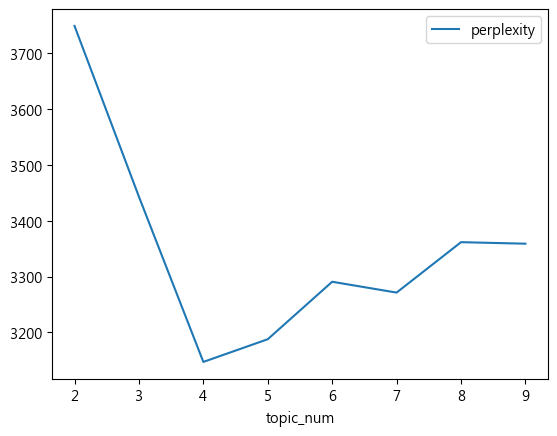

In [ ]:
result.plot.line(x='topic_num', y='perplexity')

<AxesSubplot:xlabel='topic_num'>

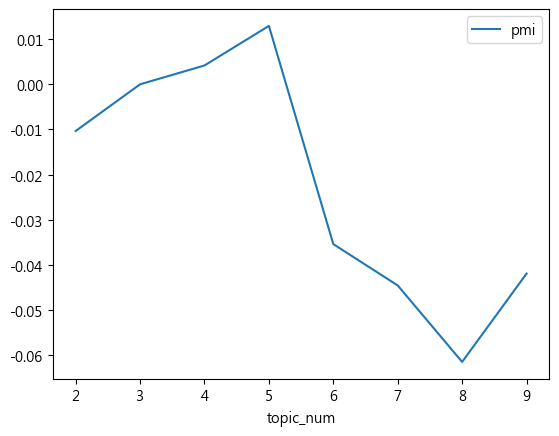

In [ ]:
result.plot.line(x='topic_num', y='pmi')

Â∞±Ë®ìÁ∑¥ÁµêÊûú‰æÜÁúãÔºåperplexity Âú® 5 ‰πãÂæåÈÉΩ‰∏çÈåØÔºåcoherence ÊúÄÈ´òÂâáÊòØ 8

## 5. Ë¶ñË¶∫ÂåñÂëàÁèæ

LDAvis ÊòØÊàëÂÄëÁ∂ìÂ∏∏ÊúÉ‰ΩøÁî®ÁöÑË¶ñË¶∫ÂåñÂ∑•ÂÖ∑ÔºåÁõÆÁöÑÁÇ∫Âπ´Âä©ÊàëÂÄëËß£Èáã‰∏ªÈ°åÊ®°Âûã‰∏≠ÔºåÂú®ÊàëÂÄëÂª∫ÊßãÂ•Ω‰∏ªÈ°åÊ®°ÂûãÂæóÂà∞ Œ∏(Êñá‰ª∂ÁöÑ‰∏ªÈ°åÂàÜ‰Ωà) Ë∑ü œÜ(‰∏ªÈ°åÁöÑÂ≠óÂàÜ‰Ωà)ÔºåÈÄèÈÅé pyLDAvis Â∞á‰∏ªÈ°åÈôçÁ∂≠Êàê‰∫åÁ∂≠Ôºå‰ª•Á∂≤È†ÅÁöÑÂΩ¢Âºè‰æõÊàëÂÄëÊü•Áúã„ÄÇ

+ ÂúìÂúàÊï∏Èáè‰ª£Ë°®‰∏ªÈ°åÊï∏ÈáèÔºåÊúâÂπæÂÄã‰∏ªÈ°åÂ∞±ÊúÉÊúâÂπæÂÄãÂúìÂúà
+ ÂúìË∂äÂ§ß‰ª£Ë°® document Ë∂äÂ§ß
+ Âè≥ÈÇäÂèØ‰ª•ÁúãÂà∞‰∏ªÈ°åÁöÑÂ≠óÂàÜ‰Ωà
+ Âè≥‰∏äÂπ´Êúâ‰∏ÄÂÄã bar Ë™øÊï¥ lambdaÔºöÁï∂ lambda=1 ‰πüÂ∞±ÊòØ‰ª£Ë°®Êú¨‰æÜÁöÑÂ≠óÂàÜ‰Ωà œÜÔºåÂ∞á lambda Á∏ÆË∂äÂ∞èÂèØ‰ª•ÁúãÂà∞Ë∂äÂîØ‰∏ÄÁöÑÂ≠óÔºåÂ•ΩÁöÑÂàÜ‰ΩàÊòØ œÜ È´ò‰∏îÂîØ‰∏ÄÔºåÂõ†Ê≠§ÊàëÂÄëË¶ÅÂú®ÈÄôÂÖ©ËÄÖÈñìÂèñÂπ≥Ë°°
+ ÂúìÂøÉË∂äÁõ∏ËøëÔºå‰ª£Ë°®‰∏ªÈ°åÊúÉË∂äÁõ∏‰ººÔºõÂèç‰πãÔºåÂúìÂøÉÂàÜË∂äÈñã‰ª£Ë°®‰∏ªÈ°åÊúâÂîØ‰∏ÄÊÄß<br>
  --> ÂÅáË®≠Ë©ûÂΩôÊú¨‰æÜÊúâ 100 Â≠óÔºåÁ∂≠Â∫¶ÊáâË©≤ÊòØ 100ÔºåÂÅáÂ¶ÇÊú¨‰æÜÁ∂≠Â∫¶Êé•Ëøë(Áõ∏Ëøë)ÁöÑË©±ÔºåÈôçÁ∂≠Âæå‰πüÊúÉÊé•Ëøë(Áõ∏Ëøë)

‰ª•‰∏ãÁî®‰∏ªÈ°åÊï∏ 8 ‰æÜÂÅö LDAvis ÁöÑÁµêÊûúÁØÑ‰æã

In [ ]:
best_model = LdaModel(
    corpus = corpus,
    num_topics = 5,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # Ë®ìÁ∑¥Ê¨°Êï∏
    )

2025-04-16 17:14:04,981 : INFO : using symmetric alpha at 0.2
2025-04-16 17:14:04,982 : INFO : using symmetric eta at 0.2
2025-04-16 17:14:04,984 : INFO : using serial LDA version on this node
2025-04-16 17:14:04,991 : INFO : running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 4179 documents, updating model once every 2000 documents, evaluating perplexity every 4179 documents, iterating 50x with a convergence threshold of 0.001000
2025-04-16 17:14:04,992 : INFO : PROGRESS: pass 0, at document #2000/4179
2025-04-16 17:14:06,349 : INFO : merging changes from 2000 documents into a model of 4179 documents
2025-04-16 17:14:06,353 : INFO : topic #0 (0.200): 0.009*"ÁúüÁöÑ" + 0.009*"Ë≤ìÂí™" + 0.006*"Ë¶∫Âæó" + 0.006*"ÁúãÂà∞" + 0.004*"ÁõÆÂâç" + 0.004*"È£ºÊñô" + 0.004*"ÁèæÂú®" + 0.004*"Â∞èË≤ì" + 0.004*"Áü•ÈÅì" + 0.004*"Â∏åÊúõ"
2025-04-16 17:14:06,354 : INFO : topic #1 (0.200): 0.008*"ÁúüÁöÑ" + 0.006*"Á≤âÁµ≤" + 0.006*"ÂØµÁâ©" + 0.006*"Ë¶∫Âæó" + 0.005*"Â∏åÊúõ" +

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.149392 -0.166313       1        1  34.150005
0     -0.275202 -0.030752       2        1  23.539378
2      0.012477  0.119102       3        1  17.366889
3      0.115337  0.128283       4        1  14.293649
1     -0.002005 -0.050320       5        1  10.650079, topic_info=     Term         Freq        Total Category  logprob  loglift
6308   ‰∏≠ÂÖ±   942.000000   942.000000  Default  30.0000  30.0000
727    ‰∏≠Âúã   943.000000   943.000000  Default  29.0000  29.0000
807    Âè∞ÁÅ£  1229.000000  1229.000000  Default  28.0000  28.0000
784    ÁæéÂúã   873.000000   873.000000  Default  27.0000  27.0000
4804   Áï´ÂÆ∂   593.000000   593.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
76     ÊúÄËøë    89.177624   545.206183   Topic5  -5.6370   0.4291
25     ÂàÜ‰∫´    84.677462   470.727888   Topic5  -5.6888   0.5242
884    Ê≠°Ëøé    75.495603   296.471355   Topic5  -5.8036   0.8717
139    ‰∏Ä‰∏ã    87.589654   668.039044   Topic5  -5.6550   0.2079
657    Â∏≥Ëôü    72.483414   249.703744   Topic5  -5.8443   1.0027

[395 rows x 6 columns], token_table=      Topic      Freq Term
term                      
139       1  0.589786   ‰∏Ä‰∏ã
139       2  0.002994   ‰∏Ä‰∏ã
139       3  0.085324   ‰∏Ä‰∏ã
139       4  0.188612   ‰∏Ä‰∏ã
139       5  0.131729   ‰∏Ä‰∏ã
...     ...       ...  ...
858       1  0.025673   È´îÊÑü
858       3  0.885716   È´îÊÑü
858       4  0.038509   È´îÊÑü
858       5  0.051346   È´îÊÑü
5366      5  0.981312   È¨£Ëú•

[887 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

ÂèØ‰ª•ÁúãÂà∞(7,8)„ÄÅ(3,6)Âíå(2,5)ÂæàÁõ∏ËøëÔºåË©¶Ë©¶ÁúãË∑ë5ÂÄã‰∏ªÈ°å

In [ ]:
model_5 = LdaModel(
    corpus = corpus,
    num_topics = 4,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # Ë®ìÁ∑¥Ê¨°Êï∏
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_5, corpus, dictionary)
p

2025-04-16 17:14:25,515 : INFO : using symmetric alpha at 0.25
2025-04-16 17:14:25,516 : INFO : using symmetric eta at 0.25
2025-04-16 17:14:25,519 : INFO : using serial LDA version on this node
2025-04-16 17:14:25,528 : INFO : running online (multi-pass) LDA training, 4 topics, 5 passes over the supplied corpus of 4179 documents, updating model once every 2000 documents, evaluating perplexity every 4179 documents, iterating 50x with a convergence threshold of 0.001000
2025-04-16 17:14:25,530 : INFO : PROGRESS: pass 0, at document #2000/4179
2025-04-16 17:14:27,930 : INFO : merging changes from 2000 documents into a model of 4179 documents
2025-04-16 17:14:27,936 : INFO : topic #0 (0.250): 0.015*"Ë≤ìÂí™" + 0.010*"ÁúüÁöÑ" + 0.006*"Ë¶∫Âæó" + 0.005*"ÁúãÂà∞" + 0.005*"Â∏åÊúõ" + 0.005*"ÁõÆÂâç" + 0.004*"ÁèæÂú®" + 0.004*"È£ºÊñô" + 0.004*"Áü•ÈÅì" + 0.004*"ÊÑüË¶∫"
2025-04-16 17:14:27,939 : INFO : topic #1 (0.250): 0.009*"ÁúüÁöÑ" + 0.007*"Ë≤ìÂí™" + 0.006*"Á≤âÁµ≤" + 0.006*"ÂñúÊ≠°" + 0.006*"Â∏åÊúõ"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.176035 -0.090919       1        1  33.386776
0      0.196694 -0.098736       2        1  31.174082
2     -0.053307  0.032296       3        1  18.414903
3      0.032648  0.157360       4        1  17.024240, topic_info=     Term         Freq        Total Category  logprob  loglift
6308   ‰∏≠ÂÖ±   820.000000   820.000000  Default  30.0000  30.0000
469    ÂΩ±Áâá  1082.000000  1082.000000  Default  29.0000  29.0000
727    ‰∏≠Âúã   863.000000   863.000000  Default  28.0000  28.0000
3156   Ë≤ìÂí™   648.000000   648.000000  Default  27.0000  27.0000
106    Ë¶∫Âæó  1257.000000  1257.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
305    ÈÄôÊòØ   128.760193   401.218253   Topic4  -5.7388   0.6340
11     ‰πãÂâç   130.707745   462.206019   Topic4  -5.7238   0.5075
209    ÊÑüË¶∫   131.445635   556.043706   Topic4  -5.7181   0.3283
83     ÊØîËºÉ   130.225821   521.796596   Topic4  -5.7274   0.3825
807    Âè∞ÁÅ£   130.561422  1265.357275   Topic4  -5.7249  -0.5007

[307 rows x 6 columns], token_table=      Topic      Freq Term
term                      
139       1  0.151609   ‰∏Ä‰∏ã
139       2  0.464608   ‰∏Ä‰∏ã
139       3  0.055427   ‰∏Ä‰∏ã
139       4  0.327671   ‰∏Ä‰∏ã
1757      1  0.023832   ‰∏ÄÊñπ
...     ...       ...  ...
4900      2  0.984786   È©ÖËü≤
858       1  0.948973   È´îÊÑü
858       2  0.047847   È´îÊÑü
5366      1  0.992684   È¨£Ëú•
5366      2  0.013236   È¨£Ëú•

[758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

ÊõøÊèõ‰∏ªÈ°åÊï∏Ë∑ëÁúãÁúãÔºåÂèØ‰ª•ÁúãÂá∫ÊúÄ‰Ω≥ÂèÉÊï∏ÁöÑÊï∏Â≠óÂíå‰∫∫È°ûÂà§Êñ∑ÁöÑ‰∏ç‰∏ÄÂÆöÊúÉÁõ∏Á¨¶ÔºåÊâÄ‰ª•ÁÇ∫‰∫ÜÊõ¥Â•ΩÁöÑËßÄÂØüÊñáÊú¨‰∏≠ÁöÑË≥áË®äÔºåÈÄêÊ≠•„ÄÅÂæ™Áí∞ÁöÑË™øÊï¥ÊòØÂæàÈáçË¶ÅÁöÑ

lambda ÁöÑÊÑèÁæ©: <https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf>

In [ ]:
pyLDAvis.save_html(p, "lda_zh.html")

## 7. ‰∏ªÈ°åÂàÜ‰ΩàÁöÑÊáâÁî®ÔºåÊê≠ÈÖçÂÖ∂‰ªñÊñáÁ´†Ë≥áË®ä

Ë®ìÁ∑¥ÂÆåLDAÊ®°ÂûãÂæåÔºåÊàëÂÄëÂèØ‰ª•ÂòóË©¶Â∞áË®ìÁ∑¥Â•ΩÁöÑÊ®°ÂûãÊáâÁî®ÊñºË≥áÊñôÈõÜ‰∏äÔºåËßÄÂØüÊØèÂ§©‰∏ªÈ°åÊñáÁ´†ÁöÑ‰ΩîÊØîËÆäÂåñ

In [ ]:
# ÂèñÂæóÊØèÊ¢ùÊñ∞ËÅûÁöÑ‰∏ªÈ°åÂàÜ‰Ωà
topics_doc = best_model.get_document_topics(corpus)

In [ ]:
topics_doc[100]

[(0, 0.029327301), (1, 0.054027703), (4, 0.90922225)]

#### Â∞á LDA Ê®°ÂûãÊé®Ë´ñÂæåÁöÑÊØèÁØáÊñá‰ª∂ÁöÑ ‰∏ªÈ°åÂàÜÂ∏ÉÔºà‰πüÂ∞±ÊòØ ùúÉÔºâËΩâÊèõÊàê‰∏ÄÂÄã NumPy Áü©Èô£ÔºàarrayÔºâ

In [ ]:
# Êää gensim ÁöÑÁ®ÄÁñèË°®Á§∫Ê≥ïËΩâÊàêÁ®ÄÁñèÁü©Èô£
m_theta = corpus2csc(topics_doc).T.toarray() # ÂÄíÁΩÆËÆìshapeËÆäÁÇ∫(num_docs, num_topics)
m_theta

array([[0.        , 0.        , 0.        , 0.07974453, 0.91738731],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.02532293, 0.89849603, 0.02519342, 0.0253865 , 0.0256011 ],
       ...,
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.02010206, 0.14207645, 0.02041301, 0.02043417, 0.79697436],
       [0.02011052, 0.91890574, 0.02016164, 0.02045772, 0.02036432]])

In [ ]:
# Â∞á‰∏ªÈ°åÁöÑÊ©üÁéáÂàÜÂ∏ÉËΩâÊèõÊàê‰∏ªÈ°åÊ®ôÁ±§
udn['topic_label'] = m_theta.argmax(axis=1) + 1

#### Áµ±Ë®à‰∏Ä‰∏ãÂêÑÂÄã‰∏ªÈ°åÁöÑÊï∏Èáè

In [ ]:
udn['topic_label'].value_counts()

topic_label
5    1859
1     770
3     644
4     474
2     432
Name: count, dtype: int64

In [ ]:
udn.head()

content  \
0  ÁöÜ‰∫åÂÆÆÂ§™Â§™ÂâçÈô£Â≠êÂàÜ‰∫´‰∫ÜÊàëÁöÑÊáâÊè¥ÊâáÊïôÂ≠∏ÊúÄËøëÂõ†ÁÇ∫Êé•ÂñÆÂÅö‰∫ÜÂ•ΩÂπæÊääÊâáÂ≠êÂÅöÂÆåÁöÑÂøÉÂæóÊòØ‰πãÂâçÂÅöÁöÑ‰πüÂ§™ÈÜú‰∫ÜÂêß...   
1                                                      
2                                 ÊÇ®Â∑≤Ë¢´ÈÇÄË´ãÂä†ÂÖ•Ë´ãÈªûÈÅ∏‰ª•‰∏ãÈÄ£ÁµêÂä†ÂÖ•Á§æÁæ§   
3                                                 ËàûÂè∞   
4  ÊÉ≥Áü•ÈÅìÈÄôË£°ÁöÑ‰∫∫ÊúâÁúãÈÅéÊºîÂî±ÊúÉÁöÑ‰∫∫Ë≤∑ÈªÉÁâõÁ•®ÁöÑÊØî‰æãÊàëËá™Â∑±ÊòØÊ≤íÊúâÈÉΩÈù†ÊúãÂèãÂà∑Á•®ÁúüÁöÑÊ≤íÊúâÁ•®ÁöÑË©±Â∞±Ë™çÂëΩ‰∏çÂéª...   

                                           artUrl  artCatagory  \
0  https://www.dcard.tw/f/entertainer/p/257328269  entertainer   
1  https://www.dcard.tw/f/entertainer/p/257344585  entertainer   
2  https://www.dcard.tw/f/entertainer/p/257329787  entertainer   
3  https://www.dcard.tw/f/entertainer/p/257330597  entertainer   
4  https://www.dcard.tw/f/entertainer/p/257334902  entertainer   

              artDate                                              words  \
0 2024-11-25 04:51:00  [‰∫åÂÆÆ, Â§™Â§™, Èô£Â≠ê, ÂàÜ‰∫´, ÊáâÊè¥, ÊïôÂ≠∏, ÊúÄËøë, Êé•ÂñÆ, Â•ΩÂπæÊää, ÊâáÂ≠ê, ÂøÉÂæó, ...   
1 2024-11-27 00:25:00                                                 []   
2 2024-11-25 08:02:00                       [ÈÇÄË´ã, Âä†ÂÖ•, ÈªûÈÅ∏, ‰ª•‰∏ã, ÈÄ£Áµê, Âä†ÂÖ•, Á§æÁæ§]   
3 2024-11-25 09:37:00                                               [ËàûÂè∞]   
4 2024-11-25 17:46:00  [Áü•ÈÅì, ÈÄôË£°, ÁúãÈÅé, ÊºîÂî±ÊúÉ, ÈªÉÁâõÁ•®, ÊØî‰æã, ÊúãÂèã, Âà∑Á•®, ÁúüÁöÑ, Ë™çÂëΩ, ‰∏çÂéª,...   

   topic_label  
0            5  
1            1  
2            2  
3            5  
4            5

#### Êü•ÁúãÊØèÂ§©ÊØèÂÄã‰∏ªÈ°åÁöÑÊñáÁ´†Áõ∏Â∞çÊØî‰æãÔºàÂç†ÊØîÔºâ

In [ ]:
udn.groupby(udn['artDate'].dt.date)['topic_label'].value_counts(normalize=True)

artDate     topic_label
2024-11-01  5              0.490196
            3              0.209150
            1              0.137255
            4              0.084967
            2              0.078431
                             ...   
2024-11-30  5              0.465649
            1              0.259542
            3              0.122137
            2              0.106870
            4              0.045802
Name: proportion, Length: 150, dtype: float64

In [ ]:
date_topic = udn.groupby(udn['artDate'].dt.date)['topic_label'].value_counts(normalize=True).unstack()
date_topic.head()

topic_label         1         2         3         4         5
artDate                                                      
2024-11-01   0.137255  0.078431  0.209150  0.084967  0.490196
2024-11-02   0.194245  0.115108  0.165468  0.093525  0.431655
2024-11-03   0.176871  0.081633  0.170068  0.054422  0.517007
2024-11-04   0.183206  0.106870  0.152672  0.061069  0.496183
2024-11-05   0.268456  0.114094  0.134228  0.067114  0.416107

#### Ë¶ñË¶∫ÂåñÂëàÁèæ‰∏ªÈ°åÊñáÁ´†Ë∂®Âã¢ËÆäÂåñ

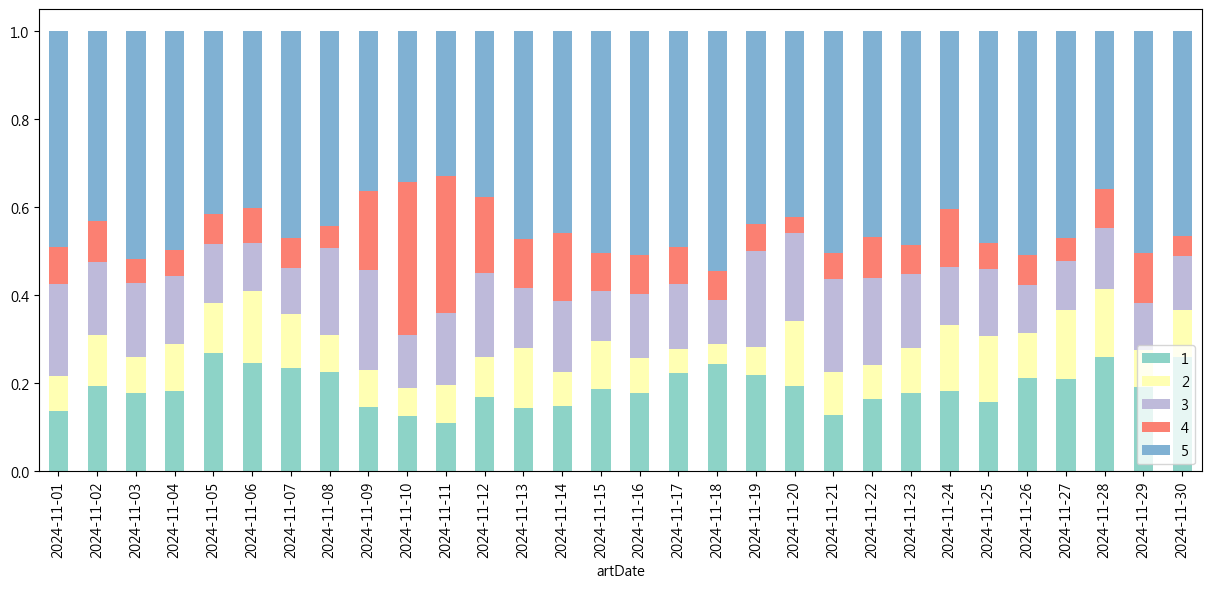

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
date_topic.plot.bar(ax=ax, stacked=True, color = plt.cm.Set3.colors)
ax.legend(loc='lower right')

ÂèØ‰ª•ÁúãÂà∞‰∏ªÈ°å4ÔºàÊôÇ‰∫ãÔºâÂú® 11/10„ÄÅ11/11 Ë¢´Ë®éË´ñÁöÑÊØî‰æãÂæàÈ´òÔºåÂèØ‰ª•‰ΩúÁÇ∫ÂæåÁ∫åÊé¢Á¥¢ÁöÑÁõÆÊ®ôÔºå<br>
Â§ßÂÆ∂ÂèØ‰ª•ÂÉèÈÄôÊ®£ÔºåÈÄèÈÅéÊê≠ÈÖçÊñáÁ´†ÁöÑË≥áË®äÔºà‰æãÂ¶ÇÊó•ÊúüÁ≠âÔºâÔºåËÆì‰∏ªÈ°åÊ®°ÂûãÁöÑÁµêÊûúÂÅöÂá∫Êõ¥Â§öÁöÑÂàÜÊûêÊáâÁî®„ÄÇ

In [ ]:
# Á¢∫‰øù artDate ÊòØ datetime Ê†ºÂºè
udn["artDate"] = pd.to_datetime(udn["artDate"])

# ÁØ©ÈÅ∏‰∏ªÈ°å„ÄÅÊó•ÊúüÁöÑË≥áÊñô
filtered = udn[(udn["artDate"].dt.date == pd.to_datetime("2024-11-10").date()) & (udn["topic_label"] == 4)]

filtered['content'].head(20) # È°ØÁ§∫ÂâçÂπæÁ≠ÜË≥áÊñô

358     Áôº‰∏ÄÂÄãÈô∞ÈôΩÊÄ™Ê∞£ÁöÑÊñáÁ´†‰æÜÂóÜÊàë‰Ω†Ë¨õË™™ÊºîÂî±ÊúÉ‰ªÄÈ∫ºÂò¥ÂΩ¢Ê≤íÂ∞ç‰∏äÁúü‰∏çÁü•ÈÅìËá™Â∑±ÂÆ∂ÁöÑ‰πüÊòØÂ∞çÂò¥ËÄåÂ∑≤Âóé‰ΩÜÁÇ∫Âï•Ëá™Â∑±...
392     ‰πãÂâçË¶∫Âæó‰∏≠Á≤âÂú®Ë¶ñË®äÁ∞ΩÂîÆË¶ÅÊ±ÇÁöÑÊéêËÑñËàûÂ•ΩÂôÅÂéü‰æÜÊàëË®éÂé≠ÁöÑ‰∏çÊòØÊéêËÑñËàûËÄåÊòØÂúüÂë≥Èü≥Ê®ÇÂíåÊ≤íÊúâÁæéÊÑüÁöÑËàûËπàÈÇÑÊúâ...
398     ÊÉ≥‰∏çÂà∞Ê¨∏Ë≥¥ËÄÄÁøîÁöÑÁ•®Êï∏Êñ∑Â±§‰∏äÂçáÊääÂ∏ùÁøÅÊì†Âá∫Âéª‰∫Ü‰πüÁÆóÊòØÁöáÂ§©‰∏çË≤†Ëã¶ÂøÉ‰∫∫ÂêßÁ≠âÂæÖ‰∫ÜÈÄôÈ∫º‰πÖÊáâË©≤ÊòØÈõ¢Âá∫ÈÅìÊúÄËøë...
542     ÂâõÂâõÁúãÂà∞‰∏ÄÂÄãÁïôË®ÄÊÉ≥ÂèçÈßÅ‰ΩÜÊòØ‰πü‰∏çÁü•ÈÅìË¶ÅÂèçÈßÅ‰ªÄÈ∫ºÂéüÊú¨ÂΩ±ÁâáÊòØÊúâÂá∫ÁèæÁ¶èÂØåÊúàÁõ¥ÊãçÂ∫ï‰∏ãÁïôË®ÄÂ∞±ÊúâÁïôË®ÄÂà∞‰∏ÄÂÄã...
2420        Â§öÊÖßÂÜçÂ∫¶Áôª‰∏äÊñ∞ËÅûÁâàÈù¢ÈÇ£ÁúãÁúãÂ§öÊÖßÂÆ≥ÊÄïÁöÑÁ•ûÊÉÖÂà∞Â∫ïÊòØÂì™ÊîØÂì•Â∏ÉÊûóË∑üËπ§ÂÅ∑ÊãçÂï¶ÈÇÑÊòØÂ•≥Âì•Â∏ÉÊûóÂøåÂ¶íÊ¥æ‰∫∫ÂéªÁöÑ
2478    ÁúãÂà∞‰∏ÄÂ†ÜÊ∞ëÈÄ≤Èª®ÊîØÊåÅËÄÖÊàñÊòØÂÖ∂‰ªñ‰∫∫‰∏ÄÁõ¥Ë¨õÊï¢Ë∑ü‰∏≠ÂÖ±Êâì‰ªóÈÇÑÁ¨ëÂà•‰∫∫ÊäïÈôç‰∏ªÁæ©‰ΩÜÂè´‰ªñÊï¢Èú≤ËáâÊãçÂΩ±ÁâáÂππ‰∏≠ÂÖ±ÂóéÂ∞±...
2489    Â¶ÇÈ°åÊúÄËøëÂÅ∂ÁÑ∂Âú®ÈöîÂ£ÅÁâàÁúãÂà∞ÈÄôÁØáÊòØÂê¶Ë©≤ÂÖ®Èù¢Á¶ÅÊ≠¢ÊîØË™ûÊäñÈü≥Â∞èÁ¥ÖÊõ∏ÈõñÁÑ∂ËÄÅÁ

ÁôºÁèæÈÄôÂÖ©Â§©Êúâ‰∫õÁ∂≤Á¥Ö„ÄÅÁï´ÂÆ∂ÁöÑÂá∫Ëªå‰∫ã‰ª∂ÔºåÊâÄ‰ª•Ë®éË´ñÁöÑÊñáÁ´†ËÆäÂ§ö

ÈÄôÁØáÁôºÂú®youtuebrÁâàÁöÑÊñáÁ´†ÔºåÂèØËÉΩÊúâ‰∏Ä‰∫õÊñ∞ËÅû„ÄÅÂ™íÈ´î„ÄÅÊ≥ïÂæã„ÄÅÂêàÁ¥Ñ„ÄÅÈÅìÊ≠âÁöÑÈóúÈçµÂ≠óÔºåÊâÄ‰ª•Ë¢´ÂàÜÂú®ÊôÇ‰∫ãÁâà

* accuracyÂèØËÉΩÊúÉÂõ†ÁÇ∫Ë≥áÊñôÂàÜÂ∏É‰∏çÂêåËÄåÊúâÊâÄÂÅèÂ∑ÆÔºåÊâÄ‰ª•Ë©ï‰º∞Ê®°ÂûãÁöÑÊôÇÂÄôÔºåÂèØ‰ª•Âä†ÂÖ•‰∏ÄËµ∑ F1-score, recall, precision, AUC Á≠âÂ∏∏Ë¶ãÂàÜÈ°û‰ªªÂãôÊåáÊ®ô‰æÜË©ï‰º∞„ÄÇ